<strong><b><font size="5">Time Series Characterisation</font></b></strong>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Time-Series" data-toc-modified-id="Time-Series-1"><span class="toc-item-num">
1&nbsp;&nbsp;</span>Time Series</a></span></li><li><span><a href="#Importing-Libraries-for-time-series-forecasting" data-toc-modified-id="Importing-Libraries-for-time-series-forecasting-3"><span class="toc-item-num">
2&nbsp;&nbsp;</span>Importing Libraries for time series forecasting</a></span></li><li><span><a href="#Importing-data" data-toc-modified-id="Importing-data-4"><span class="toc-item-num">
3&nbsp;&nbsp;</span>Importing data</a></span></li><li><span><a href="#Data-Preprocessing-and-Visualization" data-toc-modified-id="Data-Preprocessing-and-Visualization-5"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preprocessing and Visualization</a></span><ul class="toc-item"><li><span><a href="#Stationarity" data-toc-modified-id="Stationarity-4.1"><span class="toc-item-num">
4.1&nbsp;&nbsp;</span>Stationarity</a></span><ul class="toc-item"><li><span><a href="#ACF-and-PACF-plots" data-toc-modified-id="ACF-and-PACF-plots-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>ACF and PACF plots</a></span></li><li><span><a href="#Plotting-Rolling-Statistics" data-toc-modified-id="Plotting-Rolling-Statistics-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Plotting Rolling Statistics</a></span></li><li><span><a href="#Augmented-Dickey-Fuller-Test" data-toc-modified-id="Augmented-Dickey-Fuller-Test-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Augmented Dickey-Fuller Test</a></span></li></ul></li><li><span><a href="#Making-Time-Series-Stationary" data-toc-modified-id="Making-Time-Series-Stationary-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Making Time Series Stationary</a></span><ul class="toc-item"><li><span><a href="#Transformations" data-toc-modified-id="Transformations-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Transformations</a></span><ul class="toc-item"><li><span><a href="#Log-Scale-Transformation" data-toc-modified-id="Log-Scale-Transformation-4.2.1.1"><span class="toc-item-num">4.2.1.1&nbsp;&nbsp;</span>Log Scale Transformation</a></span></li><li><span><a href="#Other-possible-transformations:" data-toc-modified-id="Other-possible-transformations:-4.2.1.2"><span class="toc-item-num">4.2.1.2&nbsp;&nbsp;</span>Other possible transformations:</a></span></li></ul></li><li><span><a href="#Techniques-to-remove-Trend---Smoothing" data-toc-modified-id="Techniques-to-remove-Trend---Smoothing-5.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Techniques to remove Trend - Smoothing</a></span><ul class="toc-item"><li><span><a href="#Moving-Average" data-toc-modified-id="Moving-Average-4.2.2.1"><span class="toc-item-num">4.2.2.1&nbsp;&nbsp;</span>Moving Average</a></span></li><li><span><a href="#Exponentially-weighted-moving-average:" data-toc-modified-id="Exponentially-weighted-moving-average:-4.2.2.2"><span class="toc-item-num">4.2.2.2&nbsp;&nbsp;</span>Exponentially weighted moving average:</a></span></li></ul></li><li><span><a href="#Further-Techniques-to-remove-Seasonality-and-Trend" data-toc-modified-id="Further-Techniques-to-remove-Seasonality-and-Trend-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Further Techniques to remove Seasonality and Trend</a></span><ul class="toc-item"><li><span><a href="#Differencing" data-toc-modified-id="Differencing-4.2.3.1"><span class="toc-item-num">4.2.3.1&nbsp;&nbsp;</span>Differencing</a></span></li><li><span><a href="#Decomposition" data-toc-modified-id="Decomposition-4.2.3.2"><span class="toc-item-num">4.2.3.2&nbsp;&nbsp;</span>Decomposition</a>

<div class="alert alert-block alert-info">
<b>DATA SOURCES</b>
    
This project makes use of is a time series of export data from __[The Observatory of Economic Complexity(OEC)](https://atlas.media.mit.edu/static/db/raw/year_origin_sitc_rev2.tsv.bz2)__ based on the  SITC (Standard International Trade Classification)** from 1962 - 2000, with data from __[The Center for International Data](http://cid.econ.ucdavis.edu/)__ from Robert Feenstra. The more recent data 2001 - 2017, is sourced from __[UN COMTRADE](http://comtrade.un.org/)__.

Full **OEC** trade datasets are also available from a data dump on __[SITC Product 4 Digit](https://intl-atlas-downloads.s3.amazonaws.com/country_sitcproduct4digit_year.zip)__
</div>

# Importing Libraries for time series forecasting

In [1]:
#Run this for quick setup
#!pip install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import statsmodels.robust
import statsmodels.tsa.stattools as tsa

from statsmodels import api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pylab import rcParams

from math import sqrt

import matplotlib
import matplotlib.pyplot as plt
matplotlib.colors
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns

from random import random

import warnings; import os
warnings.filterwarnings("ignore")
plt.style.available
plt.style.use('bmh')
import os

# Importing data
- Dataset: Trade data:
    - location_id: /- product_id: SITC 4 digit code system
    - year: from 1963 to 2017  - export_value: / - import_value: - / - export_rca:
    - is_new: / - cog: / - distance: / - normalized_distance: / - normalized_cog:
    - normalized_pci: /- export_rpop: / - sitc_eci: / - sitc_coi: / - pci: /- location_code: /- location_name_short_en:
    - sitc_product_code: / - sitc_product_name_short_en: /- Unit: arbitrary

In [3]:
product = 'engine_parts' # Create a dictionary to store product code and sitc code
code = 7132
experiment = 'rca_values'

def load_data(csv_name,trade_form,target_value, code_system,sitc_code,ts_type):
    '''
    Ingests SITC multi-time series trade data in csv format, filters for one product code, removes zero values for 
    target value, screens target values and renames target columns & creates dataframe for the target columns
    
    Parameters:
    -----------
    csv:
    trade_form:
    target_value:
    code_system:
    sitc_code:
    ts_type:
    '''
    data = pd.read_csv(csv_name)#,header=None
    # TO DO: Create for loop to read sitc code from dictionary
    dframe = data.loc[data[code_system]==sitc_code]
    dframe.rename(columns={'location_name_short_en': 'exporter','export_rca': 'rca'}, inplace=True)
    dframe = dframe[[ts_type,trade_form,target_value]]
    dframe = dframe[dframe[trade_form] != 'Undeclared Countries']
    dframe[target_value].replace('',0, inplace=True)
    dframe = dframe[dframe[target_value] != 0]
    dframe = dframe[dframe[target_value] >= 0.09]
    dframe = dframe[dframe[target_value] <= 20]
    return dframe

In [4]:
xdf = load_data('sitc4digit_year.csv','exporter','rca','sitc_product_code',code,'year')

In [5]:
exporters = xdf['exporter'].nunique()
time = xdf['year'].nunique()
unknown = xdf['exporter'].loc[xdf['exporter']=='Undeclared Countries'].count()
ctotal = xdf.exporter.count()
zerorca = xdf['rca'][xdf['rca']==0].count()
nulls = xdf['rca'].isnull().sum().sum()

In [6]:
print(f'Shape of the dataframe: {xdf.shape}')
print(f'The data covers {time} years from {xdf.year.min()} to {xdf.year.max()} for {exporters} countries')
print(f'The rca values range from {xdf.rca.min()} to {xdf.rca.max()}')
print(f'Countries not declared are {unknown} out of {ctotal}')
print(f'Zero export values: {zerorca}')
print(f'Null export values: {nulls}')

Shape of the dataframe: (1939, 3)
The data covers 56 years from 1962 to 2017 for 188 countries
The rca values range from 0.09004033 to 17.575996
Countries not declared are 0 out of 1939
Zero export values: 0
Null export values: 0


# Data Preprocessing and Visualization

__Converting to datetime format:__

In [7]:
xdf['year'] = pd.to_datetime(xdf['year'], format='%Y')

In [8]:
xdf.describe()

rca
count  1939.000000
mean      1.193243
std       2.062163
min       0.090040
25%       0.175712
50%       0.513809
75%       1.408146
max      17.575996

In [9]:
def save_images(ts_groups,analysis,exporter=None):
    '''
    analysis: can be from these options ['summary',box plots','decompose',acf_pacf','adf_test','rolling_stats']
    '''
    if exporter is not None:
        country = ts_groups[exporter].name
    else:
        country = ''
    try:
        save_to = os.path.join(path,analysis,country)
        print(f'Images stored in {save_to}')
    except:
        save_to = os.path.join(path,analysis)
        print(f'Images stored in {save_to}')
    return save_to

In [10]:
# Adapted from https://stackoverflow.com/questions/30942755/plotting-multiple-time-series-after-a-groupby-in-pandas
# Modified from https://www.programcreek.com/python/example/98021/matplotlib.dates.YearLocator
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

def plot_multi_ts(dframe, ts_label, grp_label, values_label, product,experiment,figsize=(30,15),title=None):
    '''
    Plots multiple time series on one chart by first grouping time series based on series names from column in dataframe
    Parameters:
    ----------
    dframe : timeseries Pandas dataframe
    ts_label : string
        The name of the df column that has the datetime timestamp x-axis values.
    grp_label : string
        The column name in dframe for groupby method.
    values_label : string
        The column name in dframe for the y-axis.
    figsize : tuple of two integers
        Figure size of the resulting plot, e.g. (20, 7)
    title : string
        Optional title
    '''
    xtick_locator = YearLocator()
    xtick_dateformatter = DateFormatter('%Y')
    fig, ax = plt.subplots(figsize=figsize)
    for key, grp in dframe.groupby([grp_label]):
        ax = grp.plot(ax=ax, kind='line', x=ts_label, y=values_label, label=key, marker='o')
    ax.xaxis.set_major_locator(xtick_locator)
    ax.xaxis.set_major_formatter(xtick_dateformatter)
    ax.autoscale_view()
    ax.legend(ncol=5, loc='upper left')
    plot = f'Line_plots_{product}_{code}.png'
    #_ = plt.xticks(rotation=0, )
    _ = plt.grid()
    _ = plt.xlabel('year')
    _ = plt.ylabel('Export rca value')
    _ = plt.ylim(0, dframe[values_label].max() * 1.25)
    if title is not None:
        _ = plt.title(title)
    analysis = 'summary'
    file = save_images(dframe,analysis)
    plt.savefig(file+plot)
    _ = plt.show()

**Image storage**

In [12]:
path = os.path.join(os.getcwd(),f'images/{product}/{experiment}')

**Target folder to store individual images**

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/summary/


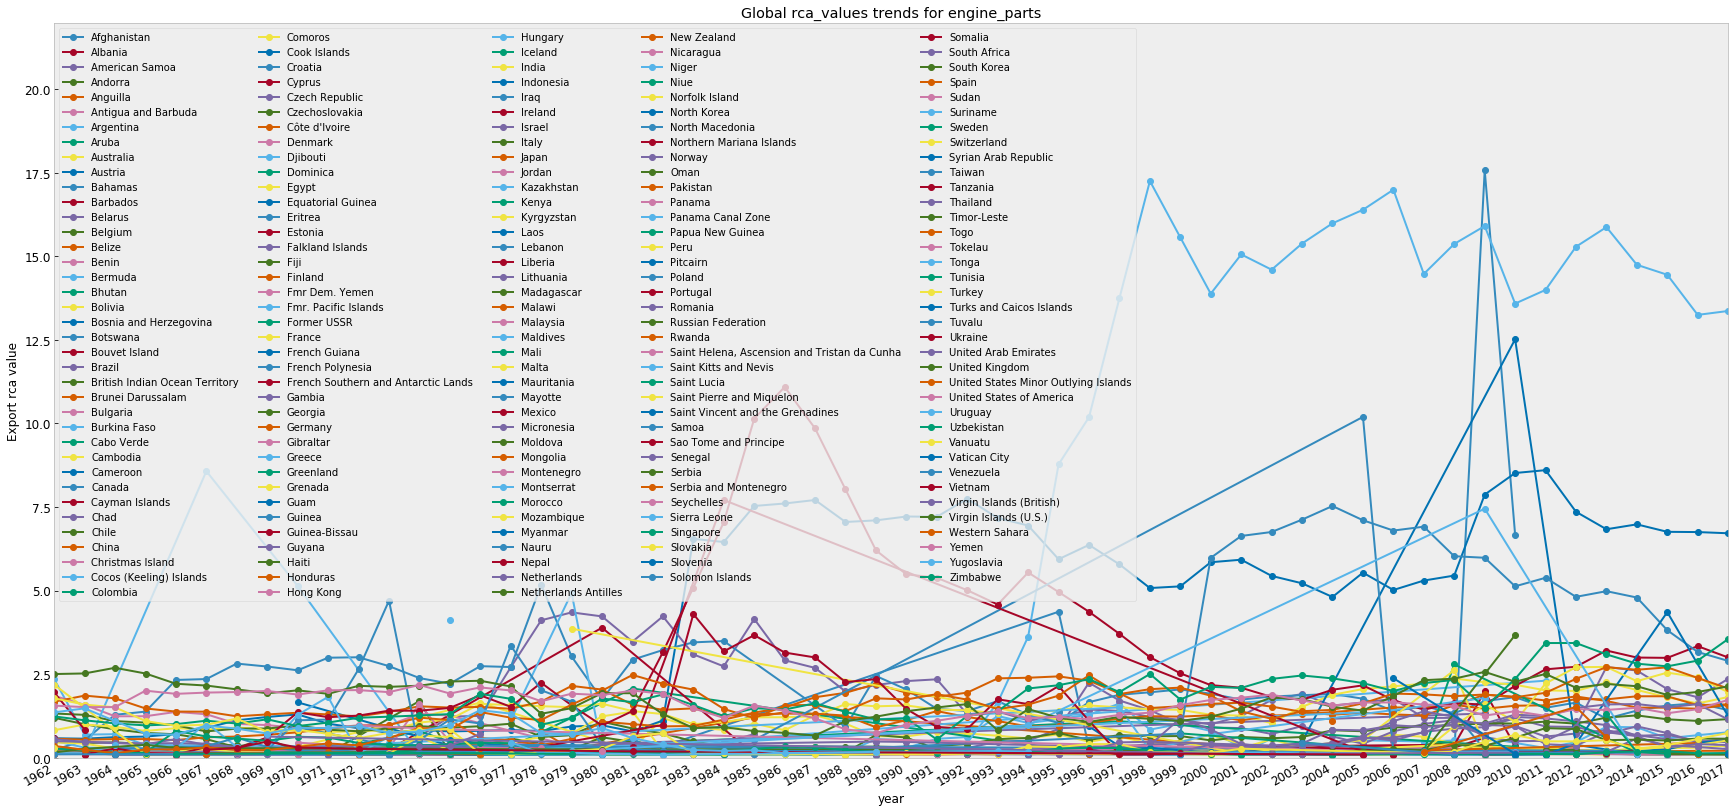

In [13]:
plot_multi_ts(xdf, 'year', 'exporter', 'rca', 'engine_parts',experiment,title=f'Global {experiment} trends for {product}')

A majority of countries have rca values below the mean value of *0.636*. A few countries have once-off or intermittently  high values preceeded by long periods with zero. These countries were excluded from the dataset and treated as outliers by limiting rca values to below 20, which was observed as the value most countries fall under. An example is Norfolk Islands shown below

In [14]:
rdf = xdf.set_index('year')
#Norfolk = pd.DataFrame(rdf['rca'].loc[rdf['exporter']=='Norfolk Island'])
#Norfolk.to_csv('norfolk.csv')
norfolk = pd.read_csv('norfolk.csv')
norfolk.head()

year         rca
0  1990-01-01  114.697680
1  2001-01-01    0.125032
2  2005-01-01    0.526648
3  2008-01-01    2.614124
4  2009-01-01    0.350387

In [15]:
def topx(df,threshold):
    grp = df.set_index('year')
    grp = df.groupby([df.year.name, df.exporter.name]).mean().unstack()
    grp.columns = grp.columns.droplevel()
    thresh = int(len(grp) * threshold)
    grp.dropna(thresh = thresh, axis = 1, inplace = True)
    grp = grp.apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')
    return grp

Some countries have changed names since 1962, and these names had to be updated along with the data.

In [16]:
# combine = ['Former USSR','Russian Federation','Fmr Dem. Yemen','Yemen']
# for c in combine: 
df_grps = topx(xdf,0)
df_grps.apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')
df_grps = df_grps.rename(columns={'Fmr. Pacific Islands': 'Pacific Islands'})
df_grps['Russia'] = df_grps['Former USSR']+df_grps['Russian Federation']
df_grps['Yemen'] = df_grps['Fmr Dem. Yemen']+df_grps['Yemen']
df_grps = df_grps.drop(['Fmr Dem. Yemen','Norfolk Island','Former USSR','Russian Federation','Virgin Islands (U.S.)','Virgin Islands (British)'],axis=1)

__Setting index as the datetime column for easier manipulations:__

<div class="alert alert-block alert-info">

__Box and Whisker Plots will be used to check:__ 

 - what time series have similar median values across different years
 - whether there is a steady increase in the spread, or middle 50% of the data (boxes) over time
 - best model if considering seasonality
</div>

In [18]:
def plot_groups(df, group):
    fig1, ax1 = plt.subplots(figsize=(30,15))
    #https://matplotlib.org/3.1.0/gallery/color/named_colors.html
    colors = ["gray","brown","darkviolet","bisque","b","g","r","c","gold","darkolivegreen","m","teal","rosybrown","y","orange","k","fuchsia","lavender","maroon","lime",
              "olive","salmon","peru","aqua"]
    label=f'Global trends in {experiment} for {product}'
    df.plot(ax=ax1,label=label,color=colors)
    ax1.set_ylabel(f'Export {experiment}')
    fig1.suptitle(f'Global exports for {product} using {experiment} for {group}')
    plt.legend(ncol=8,loc='best')
    name1 = f'Trend for {group}'
    savefile = str(save_images(df,'histograms')+name1)
    plt.savefig(savefile)
    
    fig2, ax2 = plt.subplots(figsize=(40,25))
    fig2.suptitle(f'Box plots for {product} using {experiment} for {group}')
    ax2 = sns.boxplot(x='exporter', y="value", data=pd.melt(df))
    name2 = f'Box_plots for {group}'
    savefile = str(save_images(df,'box_plots')+name2)
    plt.savefig(savefile)
    plt.show()    

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/histograms/
Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/box_plots/


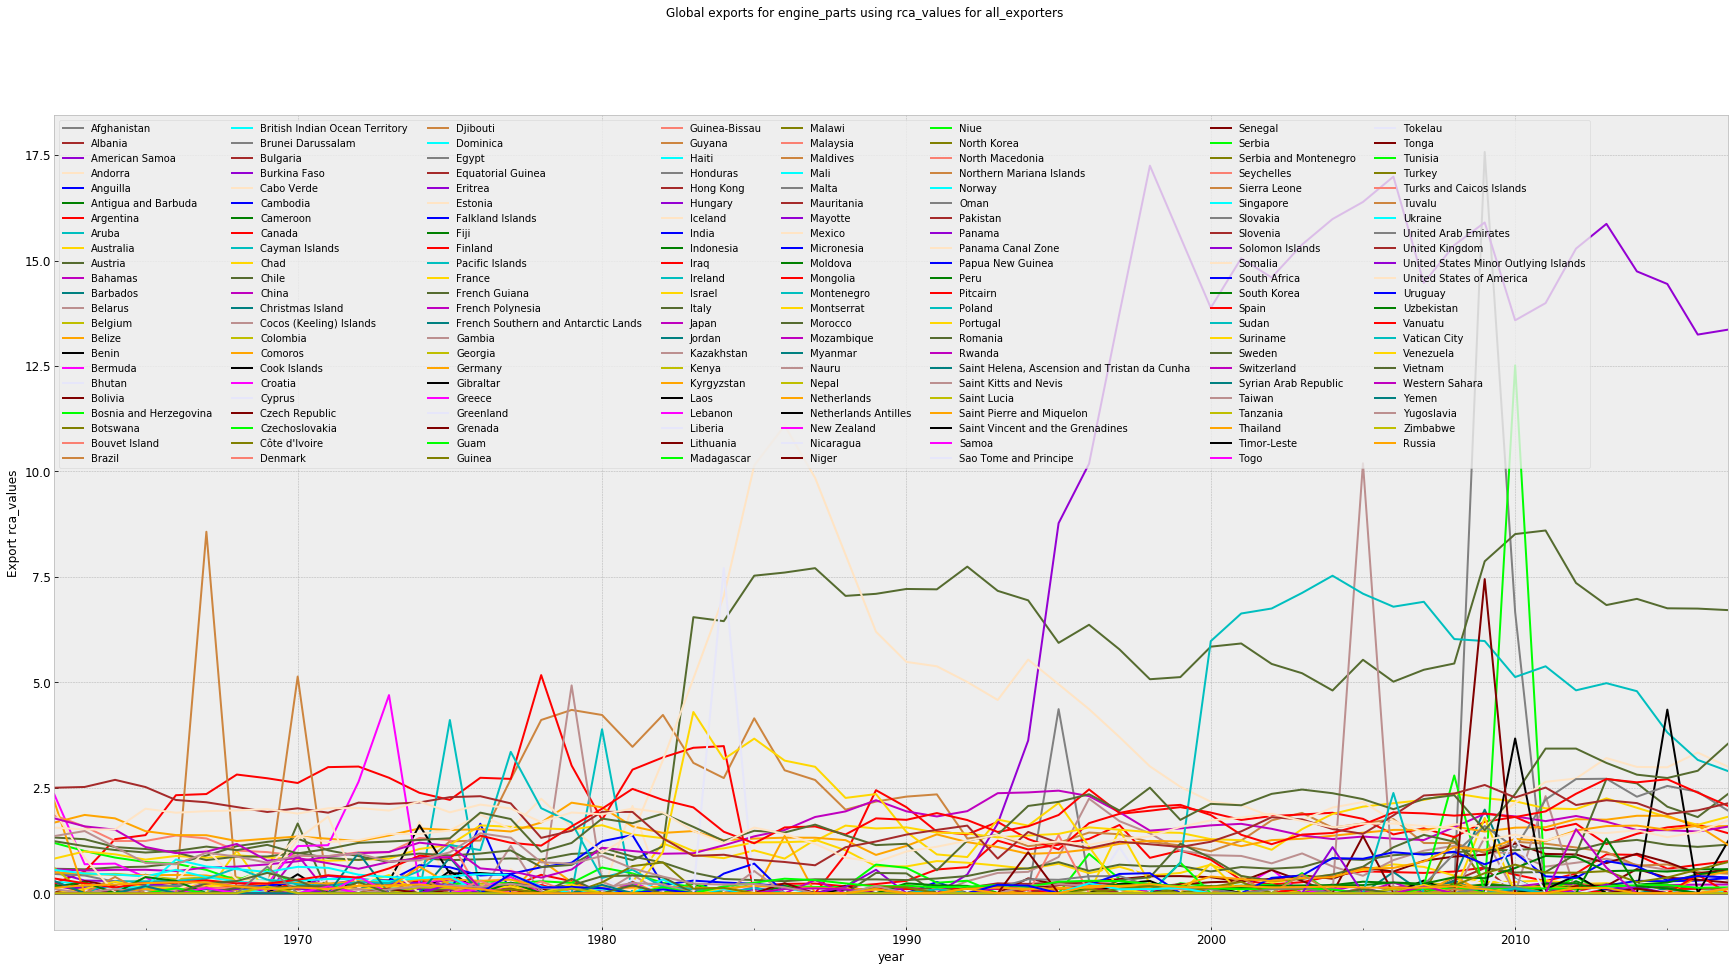

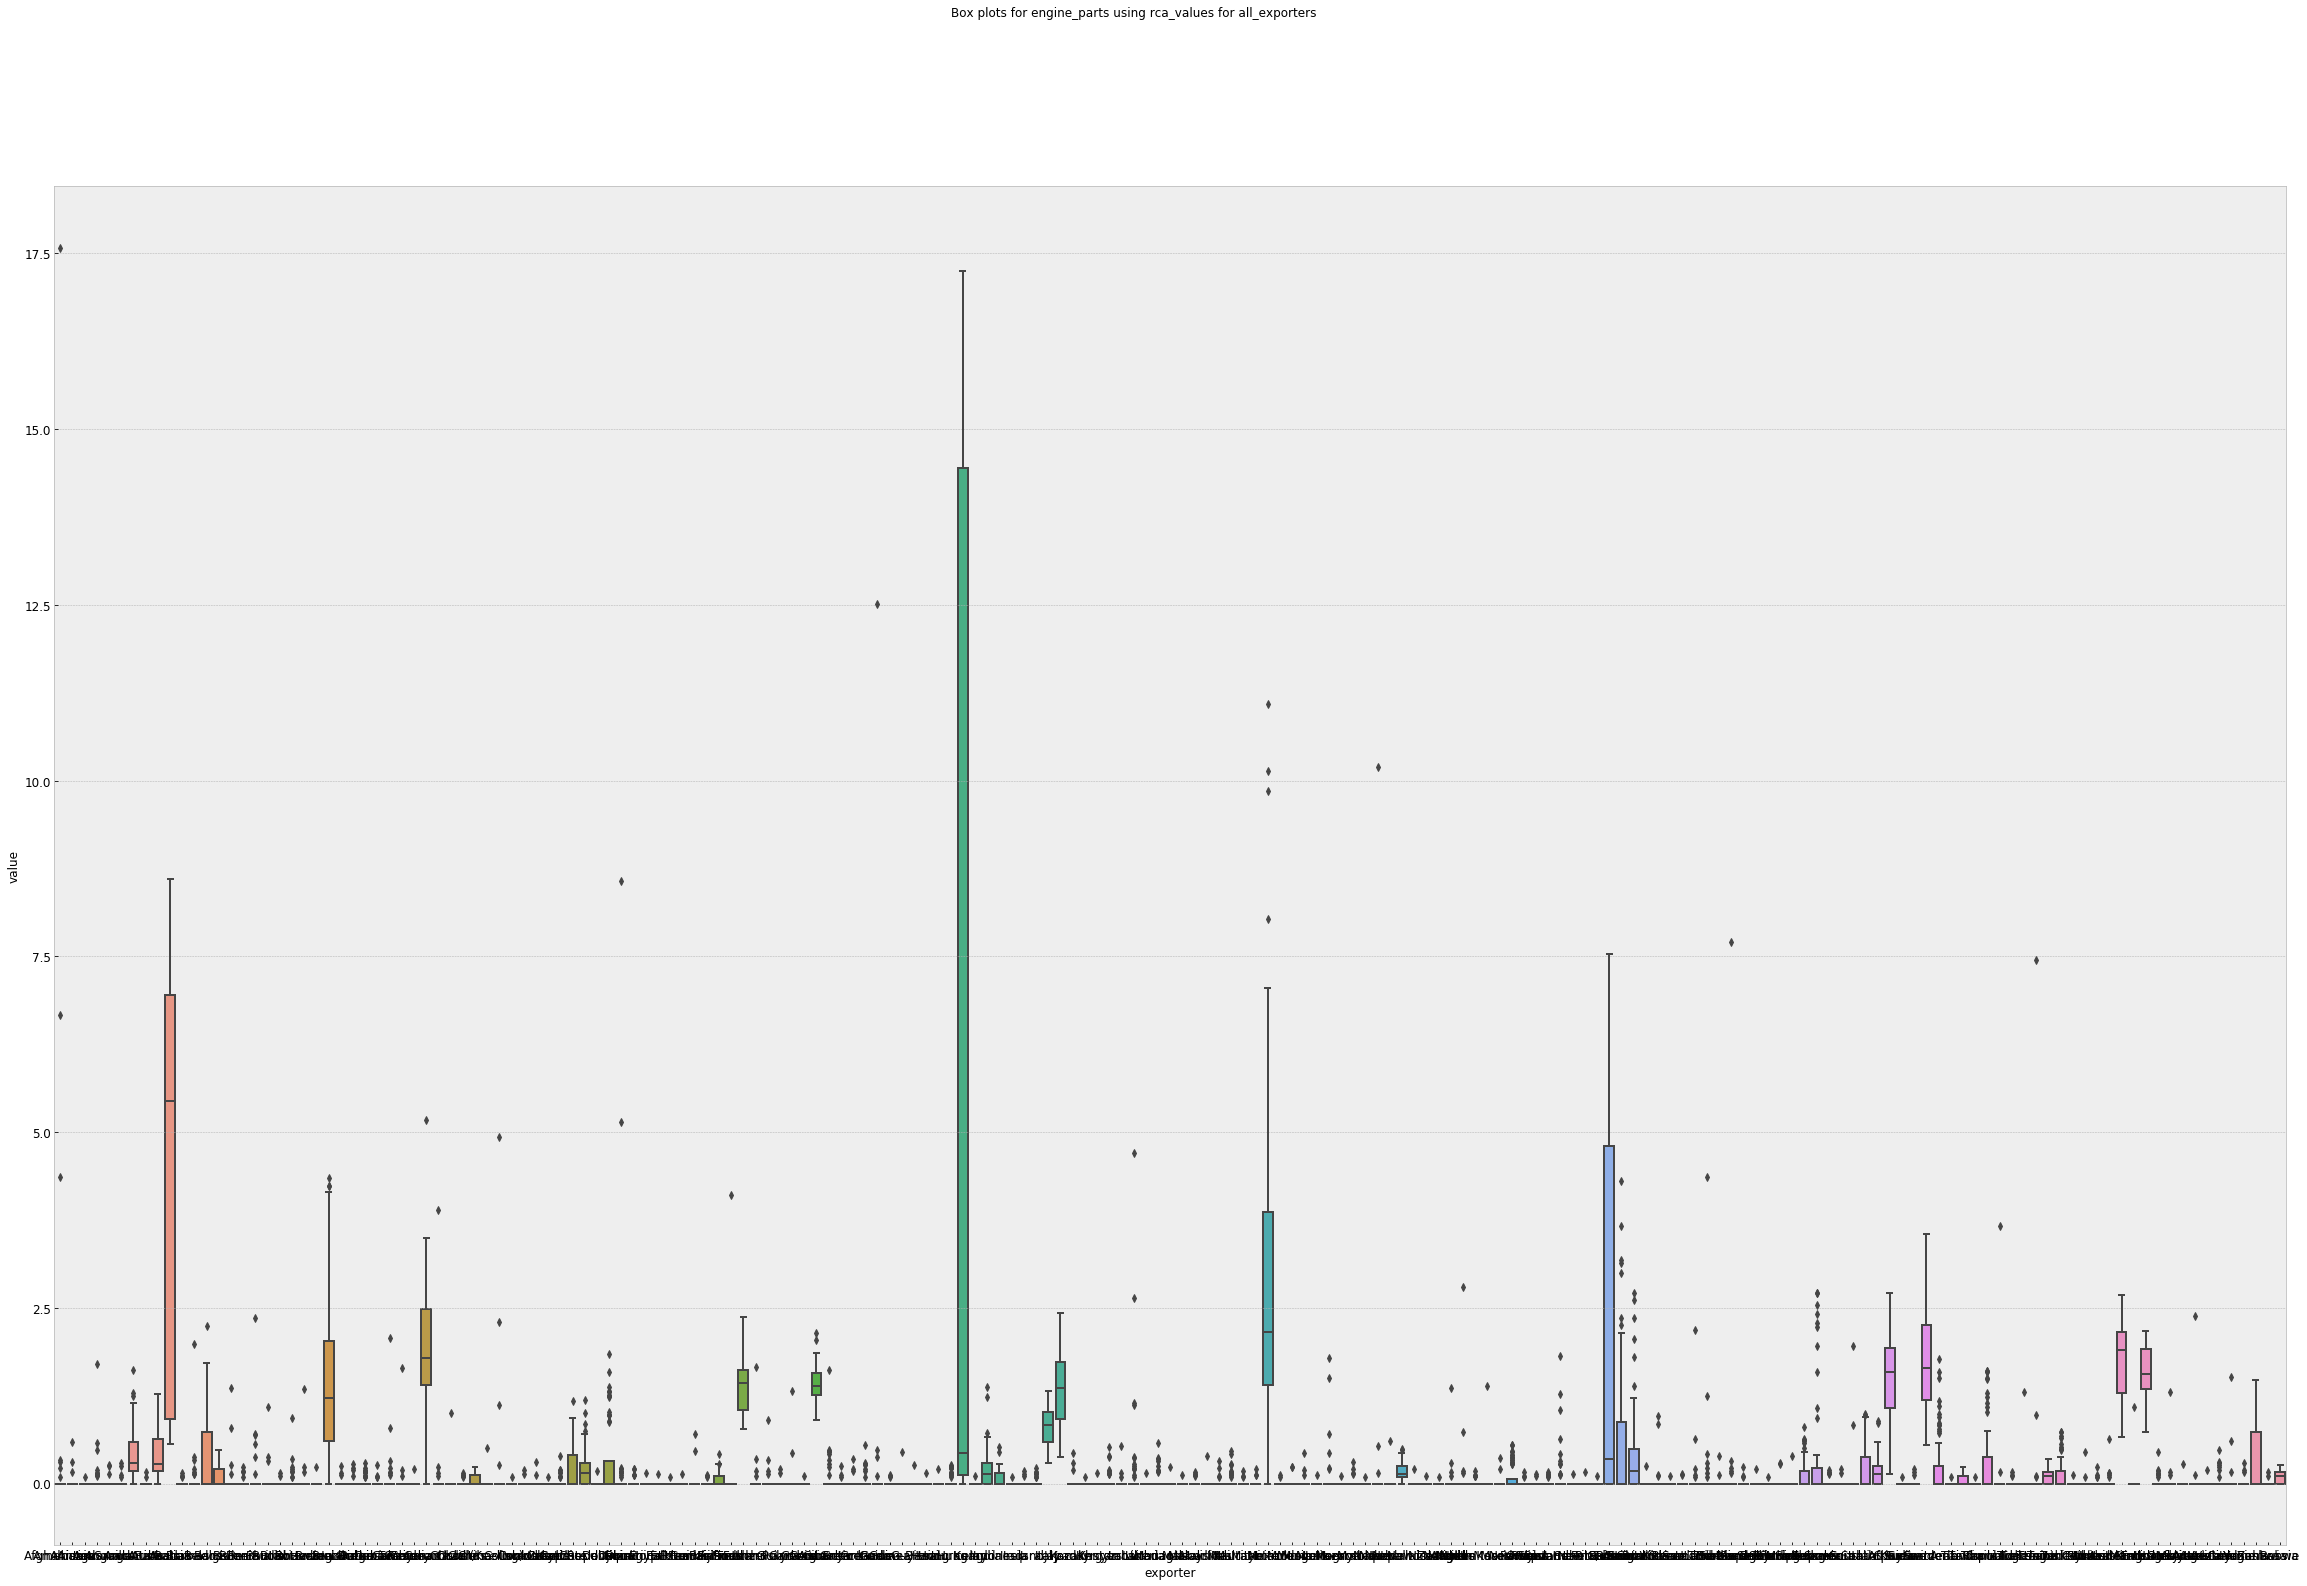

In [19]:
plot_groups(df_grps, 'all_exporters')

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/histograms/
Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/box_plots/


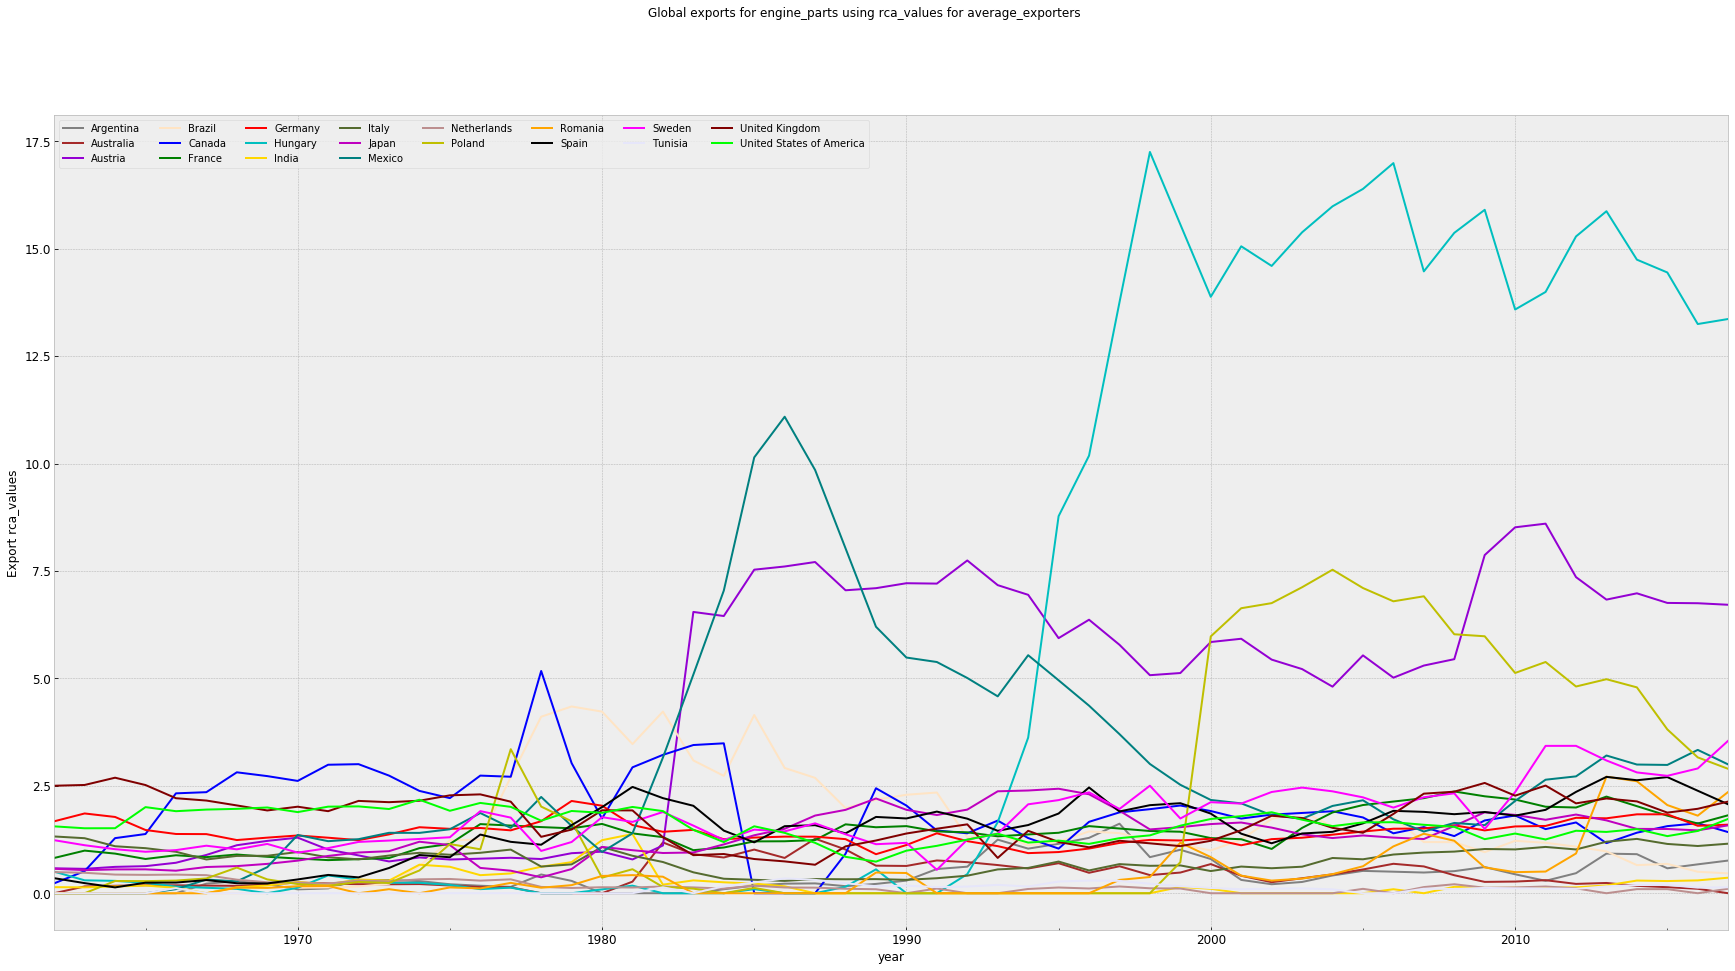

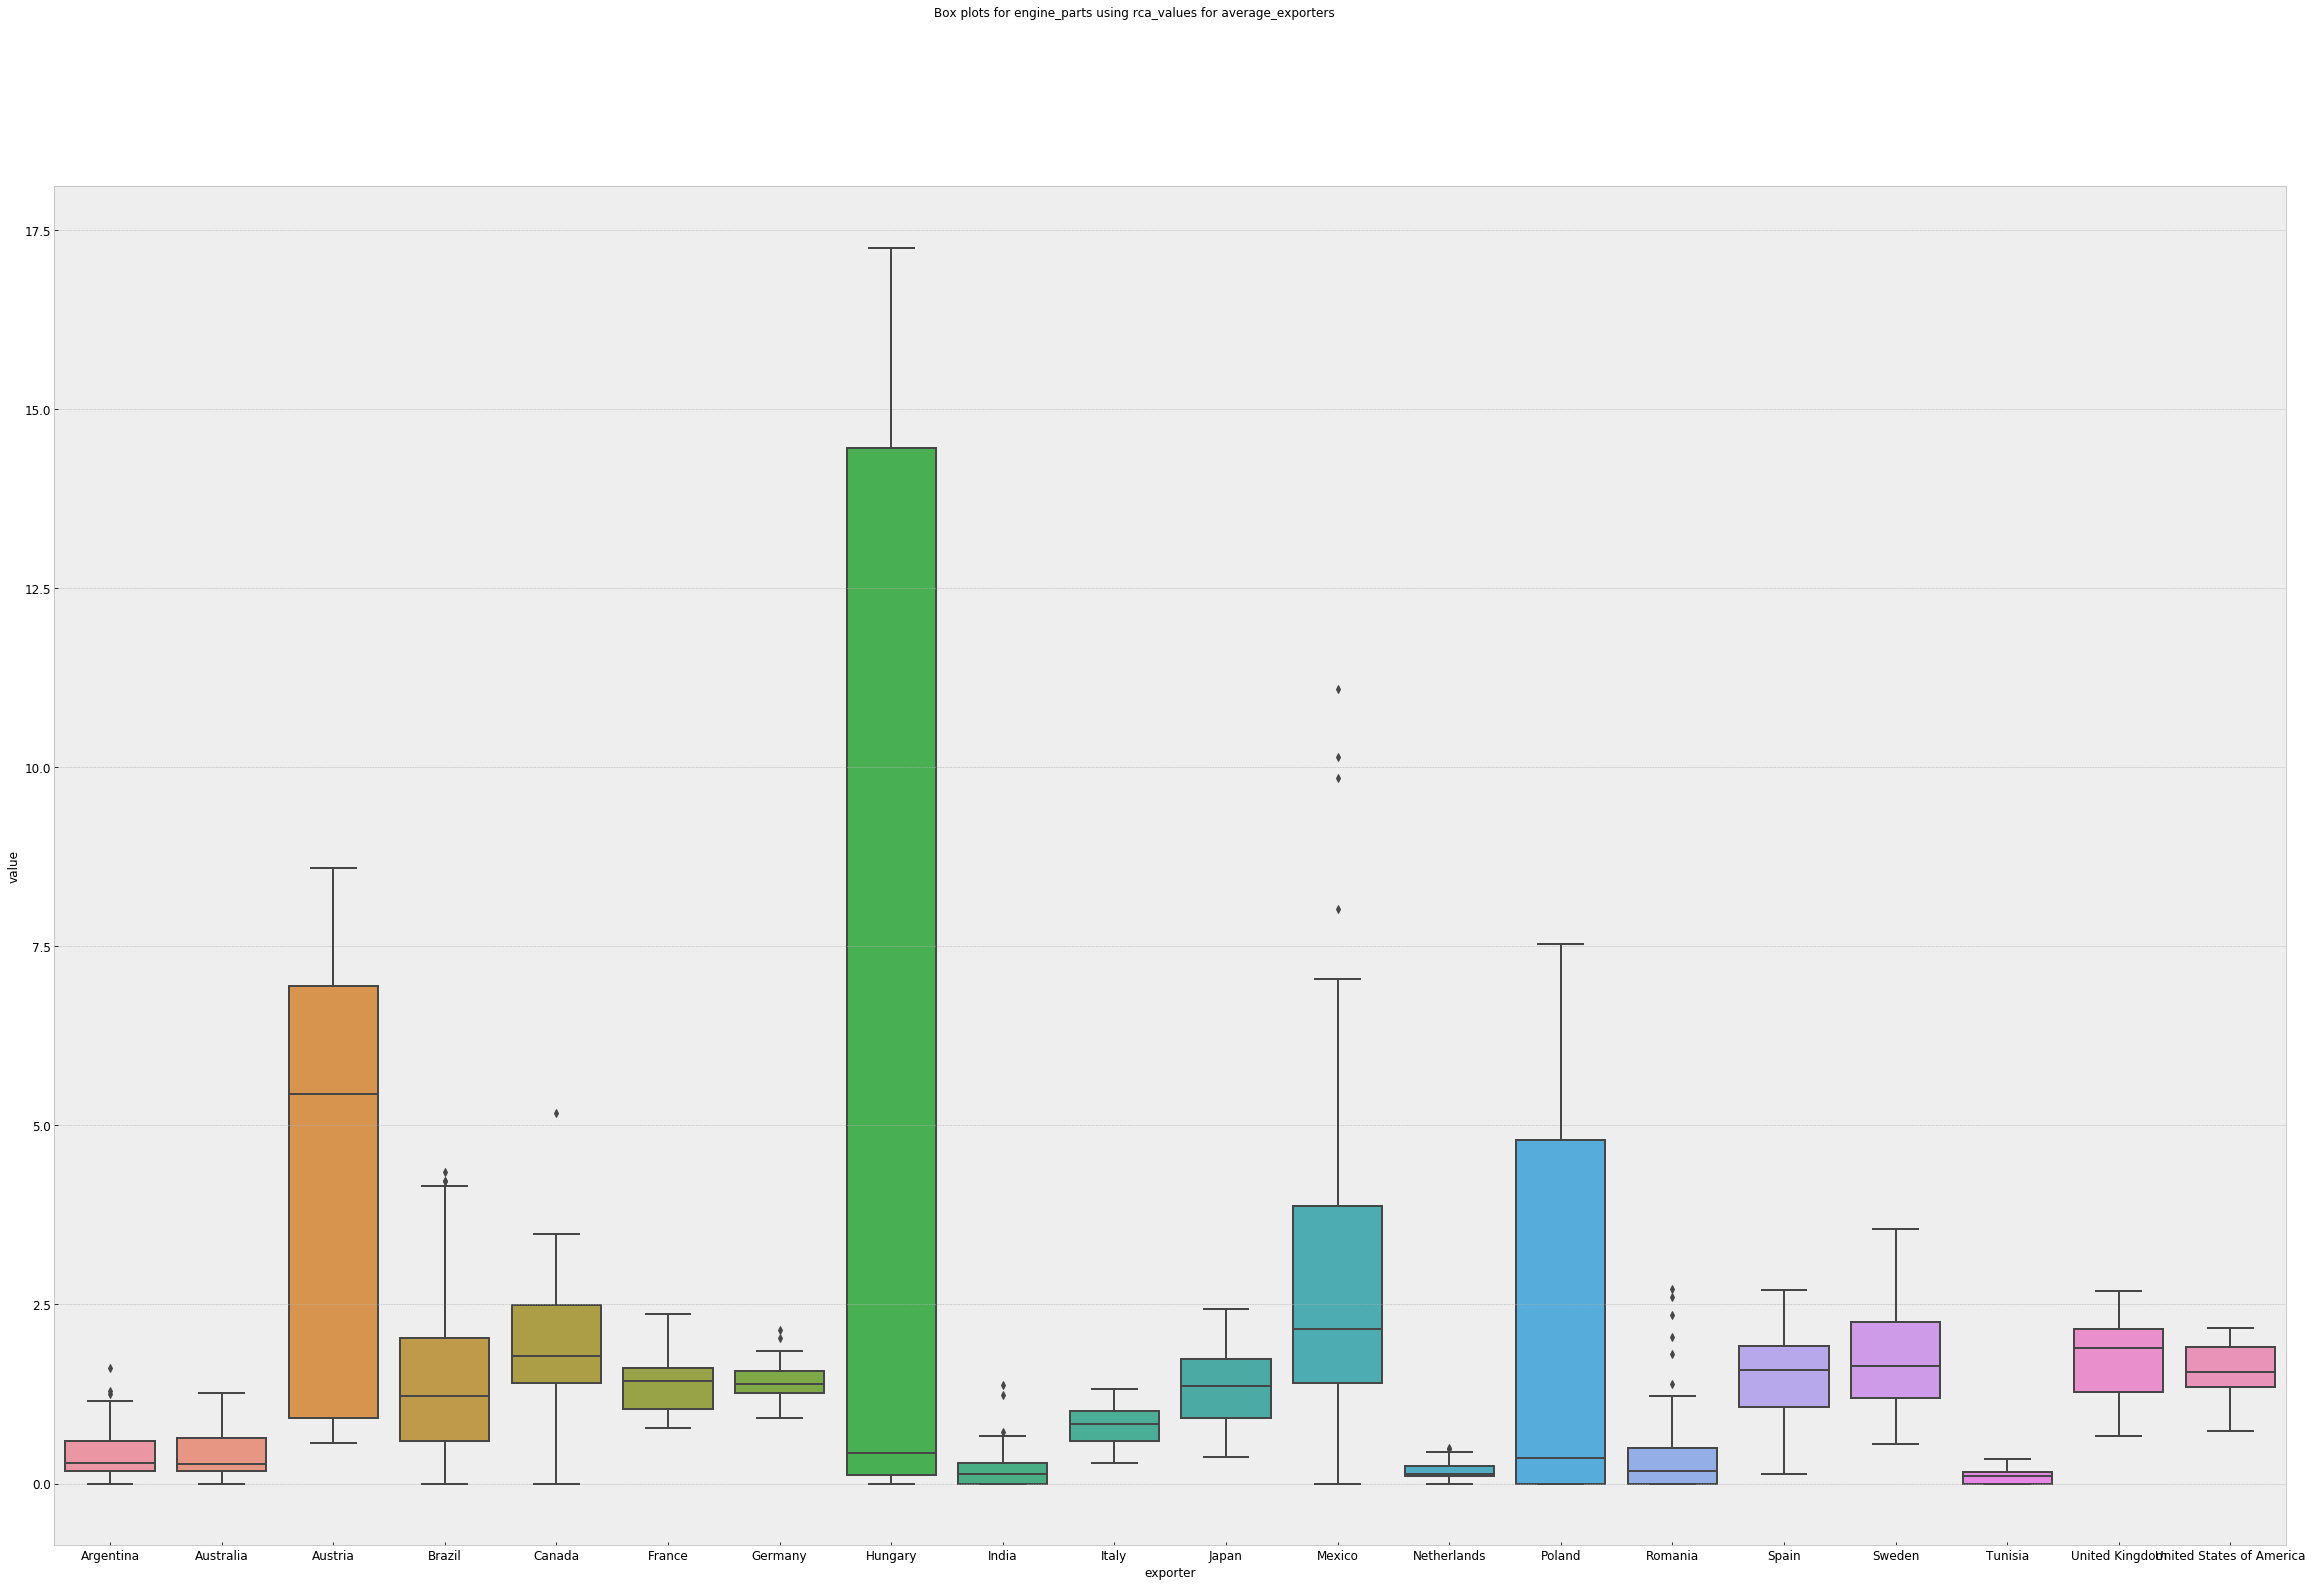

In [20]:
avg_exp = topx(xdf,0.6)
plot_groups(avg_exp,'average_exporters')

Setting a threshold for the percentage years in which no exports were reported based on empty data points for rca values eliminates outlier countries with erratic exports. This suggests that the engine parts might have been imported and possibly re-engineered for re-export in some of these years.

In [21]:
print(f'Excluding countries with no reported exports for 60% of the time period makes exporters dropped from {len(df_grps.columns)} to {len(avg_exp.columns)}')

Excluding countries with no reported exports for 60% of the time period makes exporters dropped from 183 to 20


Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/histograms/
Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/box_plots/


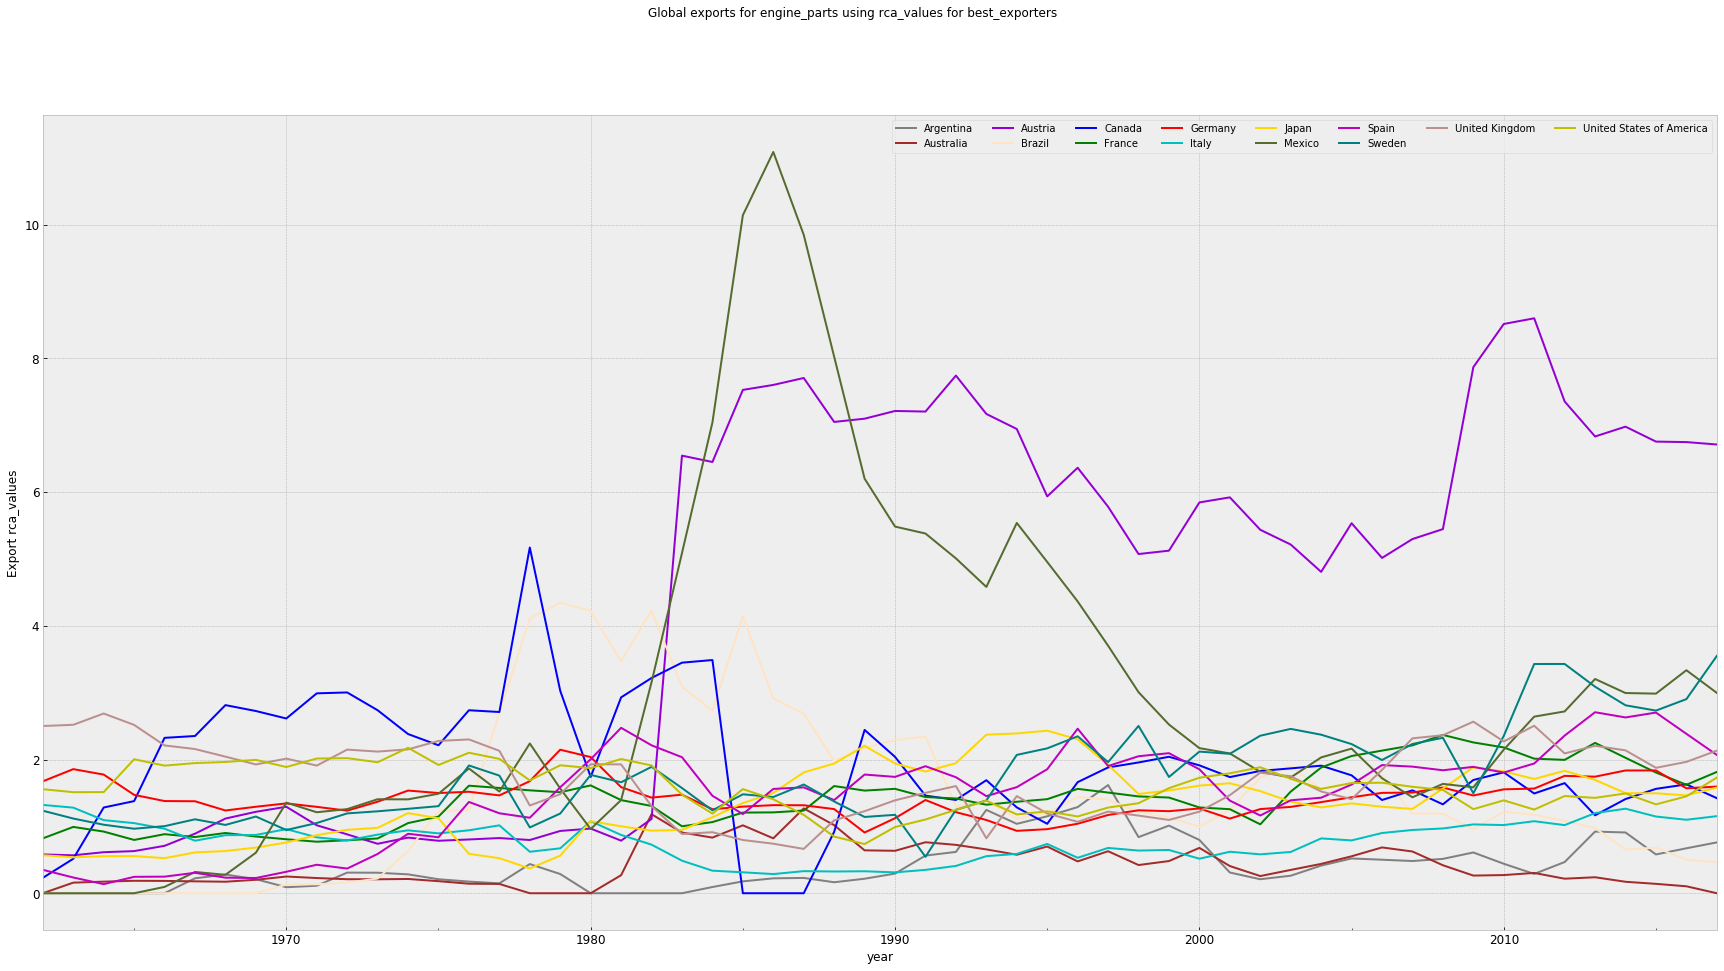

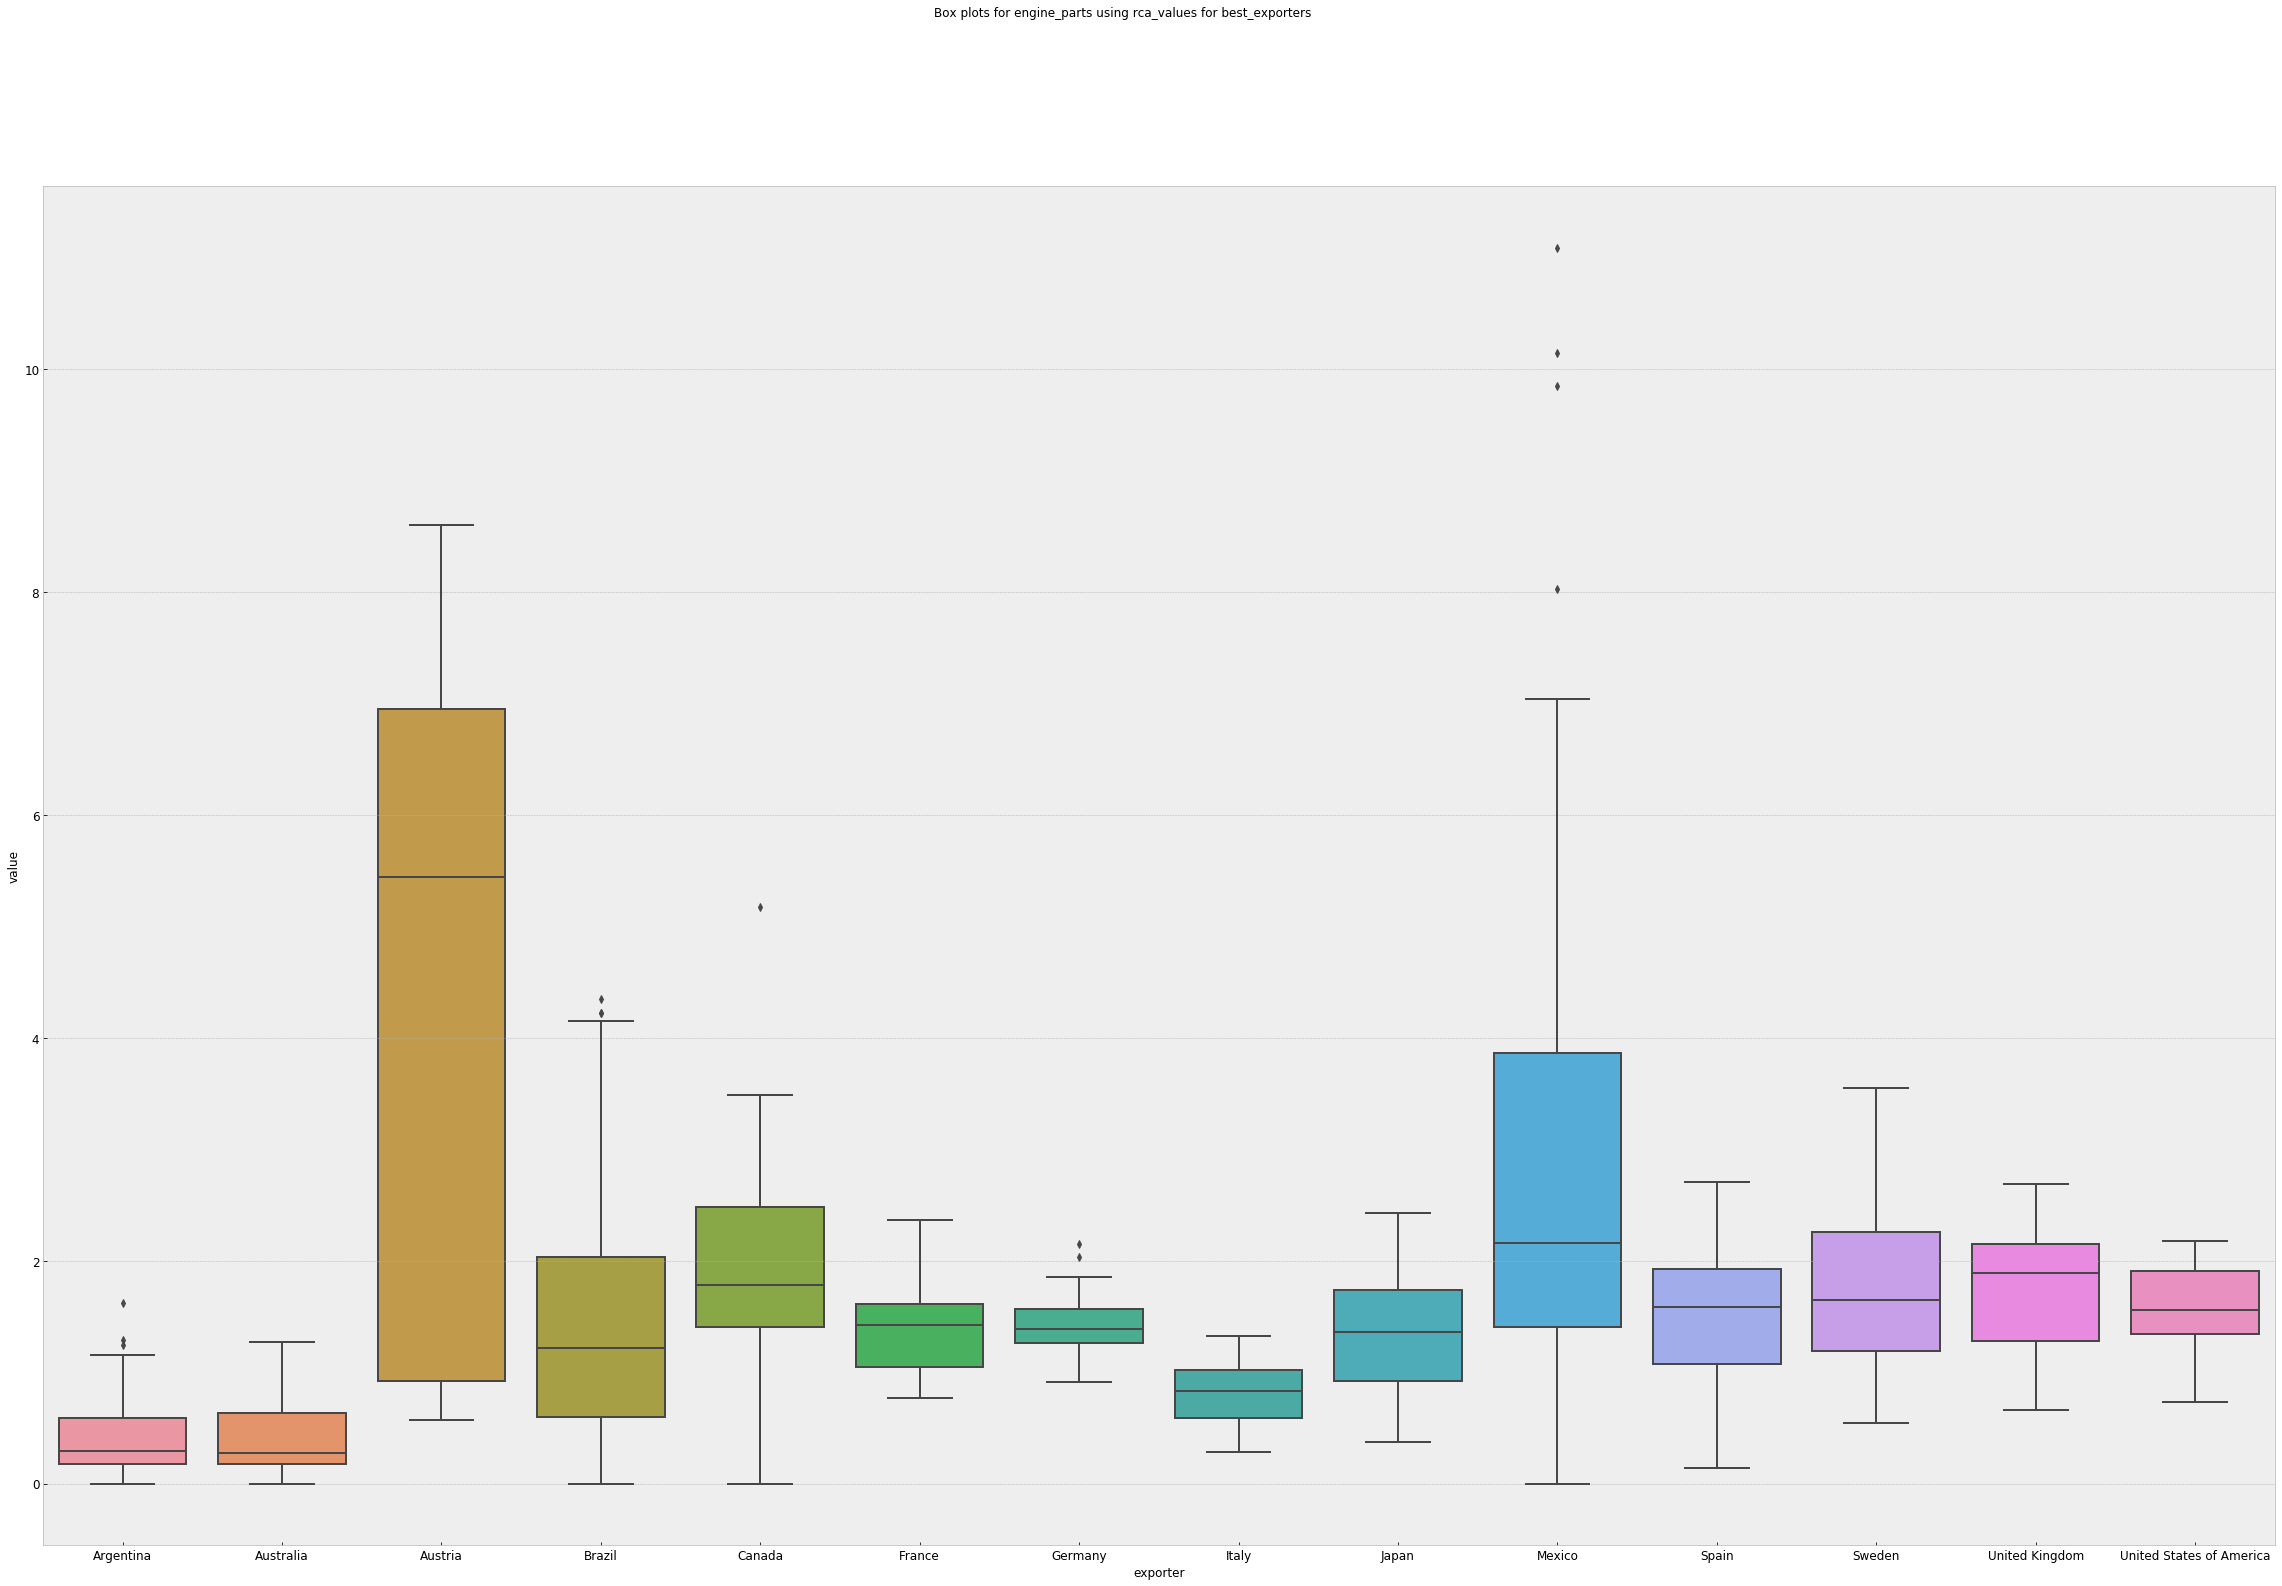

In [22]:
best_exp = topx(xdf,0.85)
plot_groups(best_exp,'best_exporters')

In [23]:
print(f'Excluding countries with no reported exports for 85% of the time period makes exporters dropped from {len(avg_exp.columns)} to {len(best_exp.columns)}')

Excluding countries with no reported exports for 85% of the time period makes exporters dropped from 20 to 14


**Decomposition**

- statsmodels was used to perform a decomposition of the time series. 
- Decomposition deconstructs a time series into several components, each representing one of the underlying categories of patterns. 
- Statsmodels reveals the trend, seasonality, and residual components of our data.

__Reviewing plots of the density of observations will provide further insight into the structure of the data:__
- Is the distribution perfectly Gaussian (normal distribution)?
- Skewness: which direction is the distribution?
- If not Gaussian and skew, transformations will be necessary prior to modelling

__Plot of histograms, kernel density estimation (KDE) and to show skewness in data for each country__

In [24]:
# List of countries in the dataset
exporters = avg_exp.columns

Index(['Argentina', 'Australia', 'Austria', 'Brazil', 'Canada', 'France', 'Germany', 'Hungary', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'Poland', 'Romania', 'Spain', 'Sweden', 'Tunisia', 'United Kingdom', 'United States of America'], dtype='object', name='exporter')
Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/decomposition/


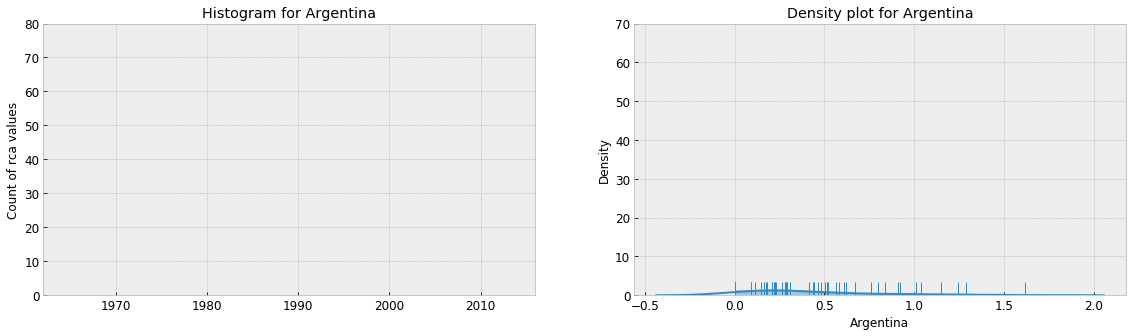

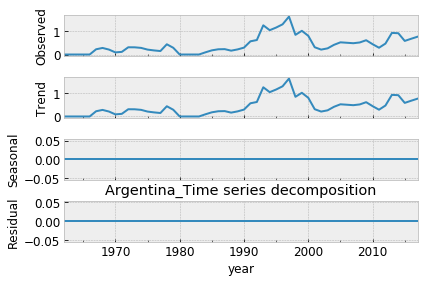

Index(['Argentina', 'Australia', 'Austria', 'Brazil', 'Canada', 'France', 'Germany', 'Hungary', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'Poland', 'Romania', 'Spain', 'Sweden', 'Tunisia', 'United Kingdom', 'United States of America'], dtype='object', name='exporter')
Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/decomposition/


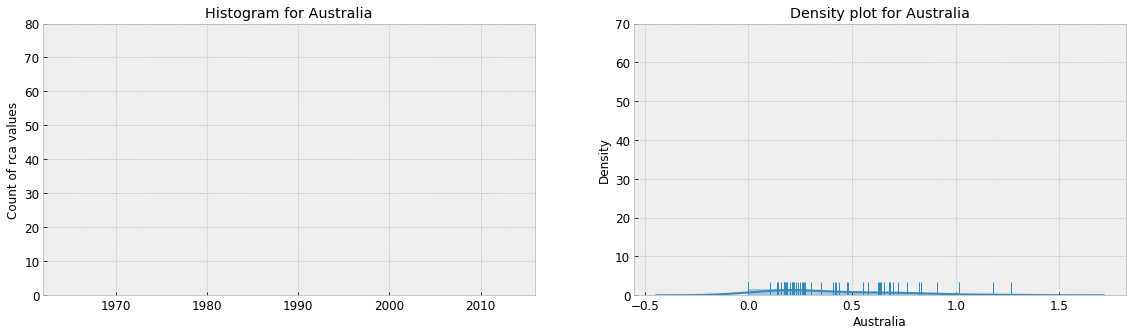

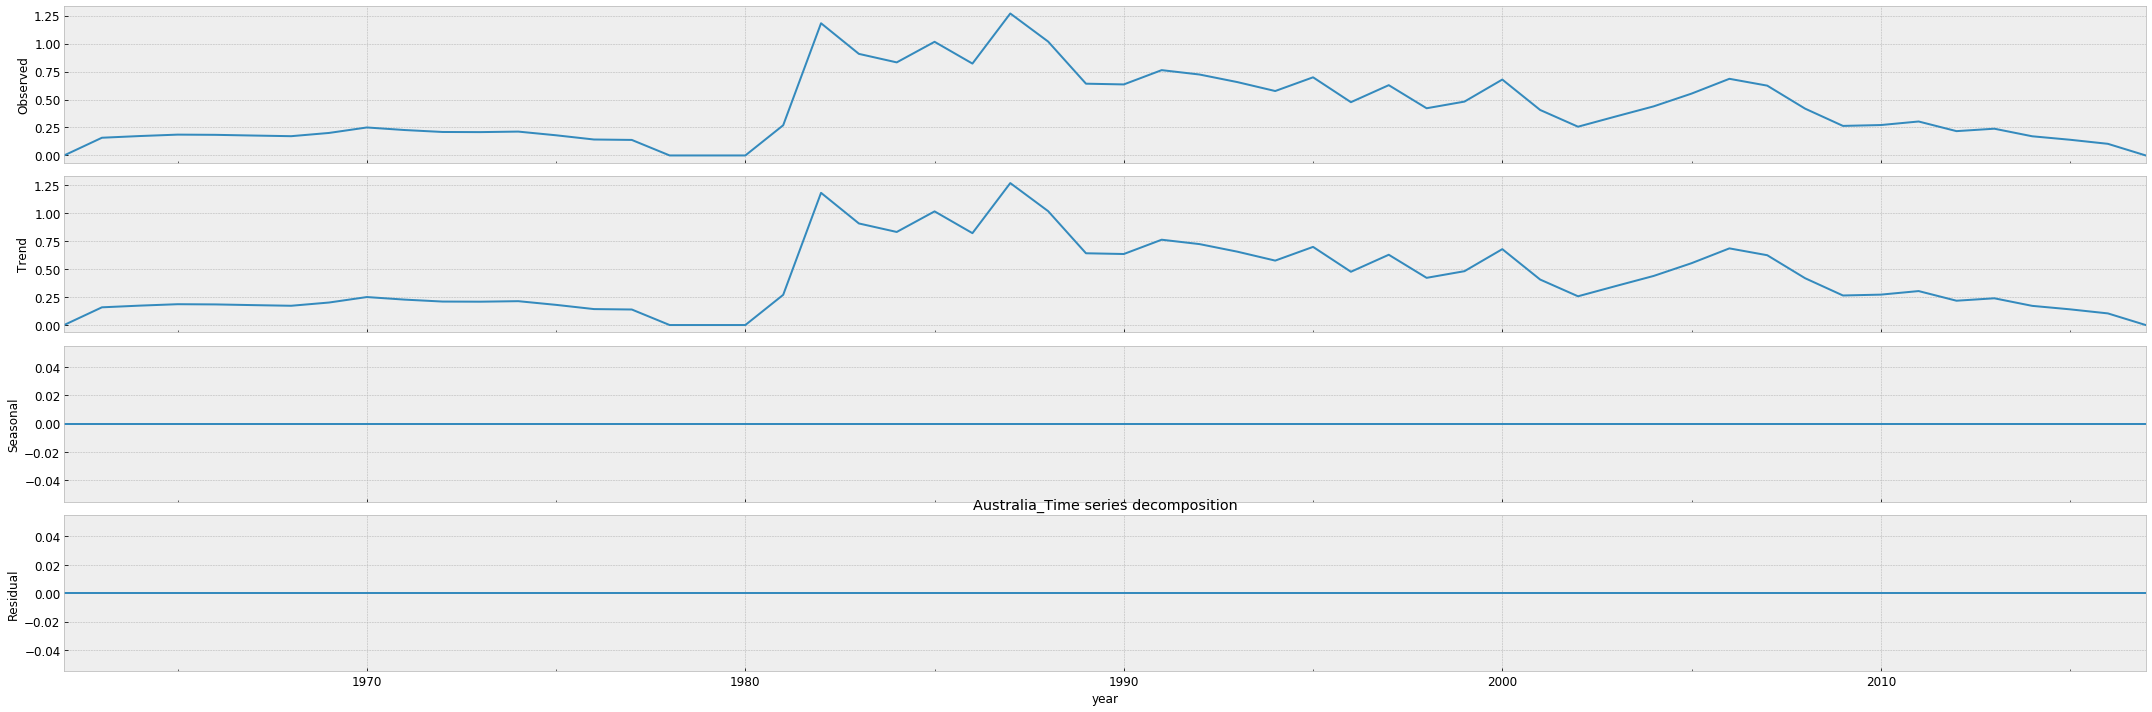

Index(['Argentina', 'Australia', 'Austria', 'Brazil', 'Canada', 'France', 'Germany', 'Hungary', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'Poland', 'Romania', 'Spain', 'Sweden', 'Tunisia', 'United Kingdom', 'United States of America'], dtype='object', name='exporter')
Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/decomposition/


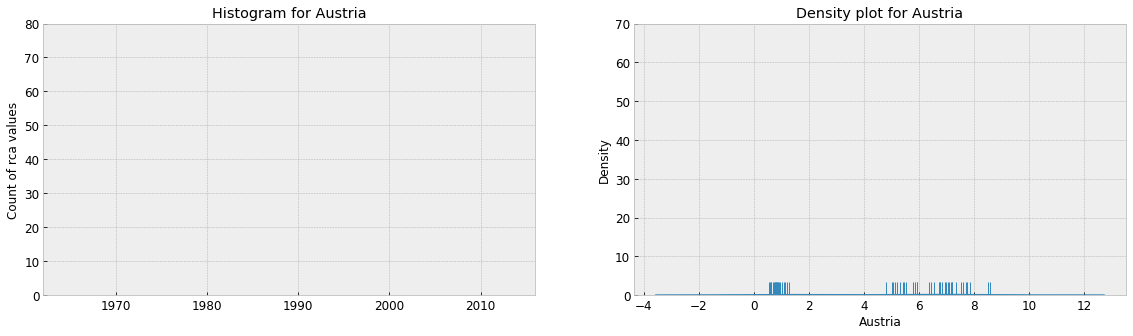

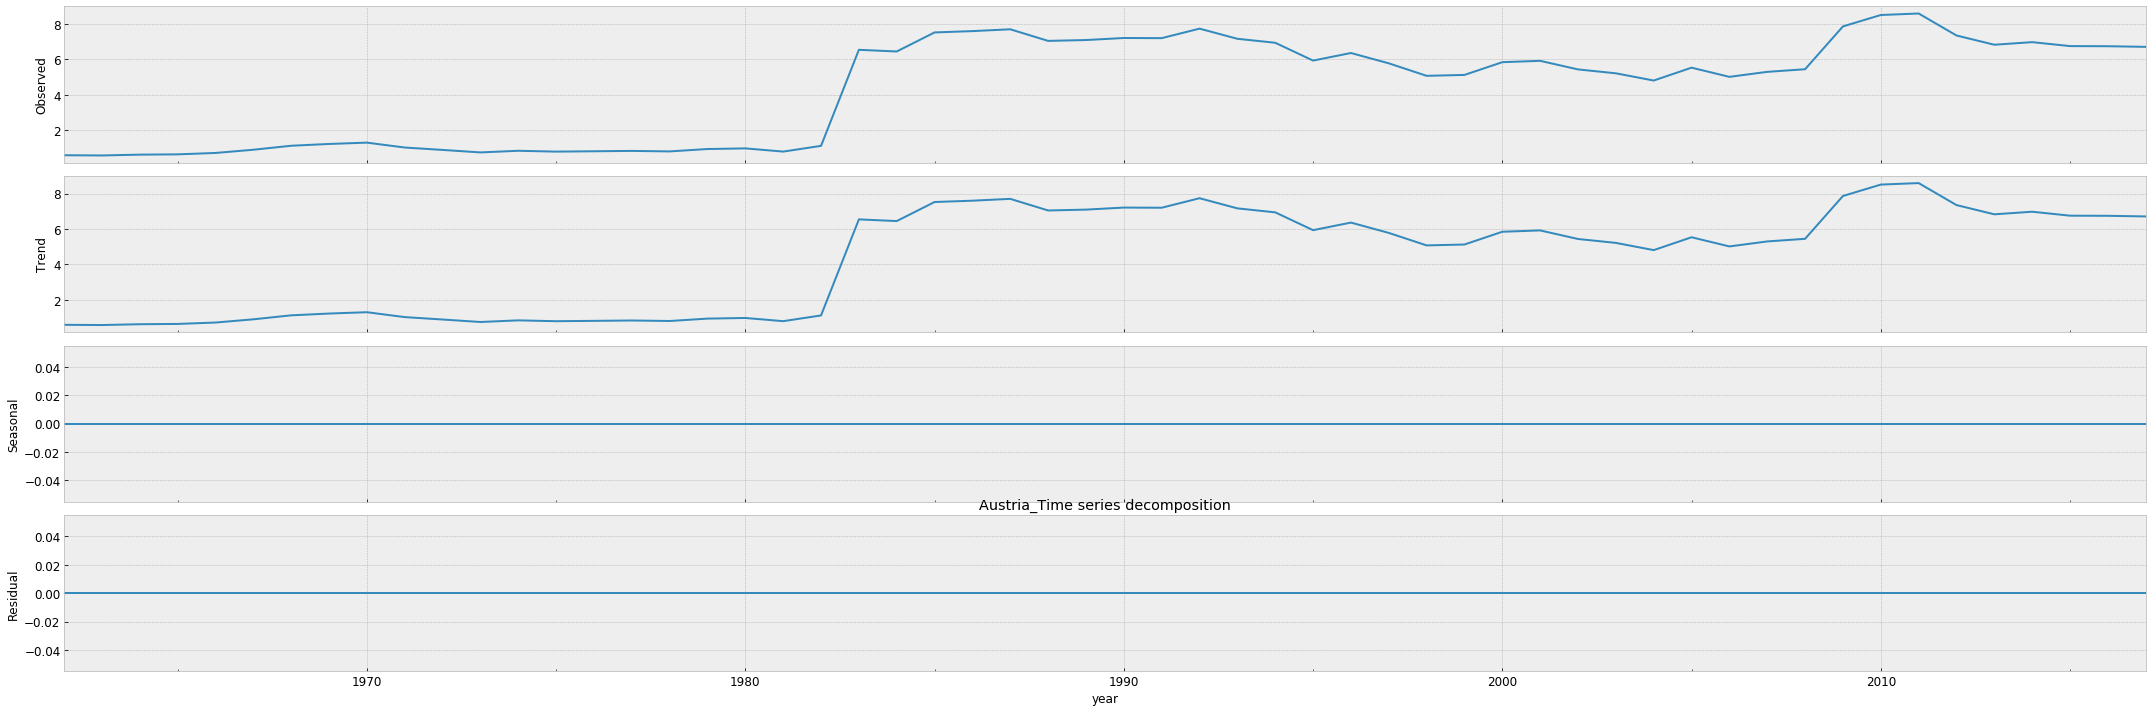

Index(['Argentina', 'Australia', 'Austria', 'Brazil', 'Canada', 'France', 'Germany', 'Hungary', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'Poland', 'Romania', 'Spain', 'Sweden', 'Tunisia', 'United Kingdom', 'United States of America'], dtype='object', name='exporter')
Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/decomposition/


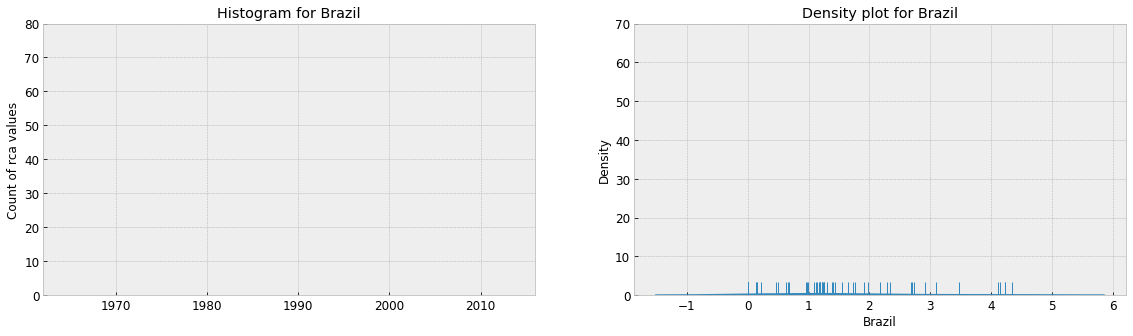

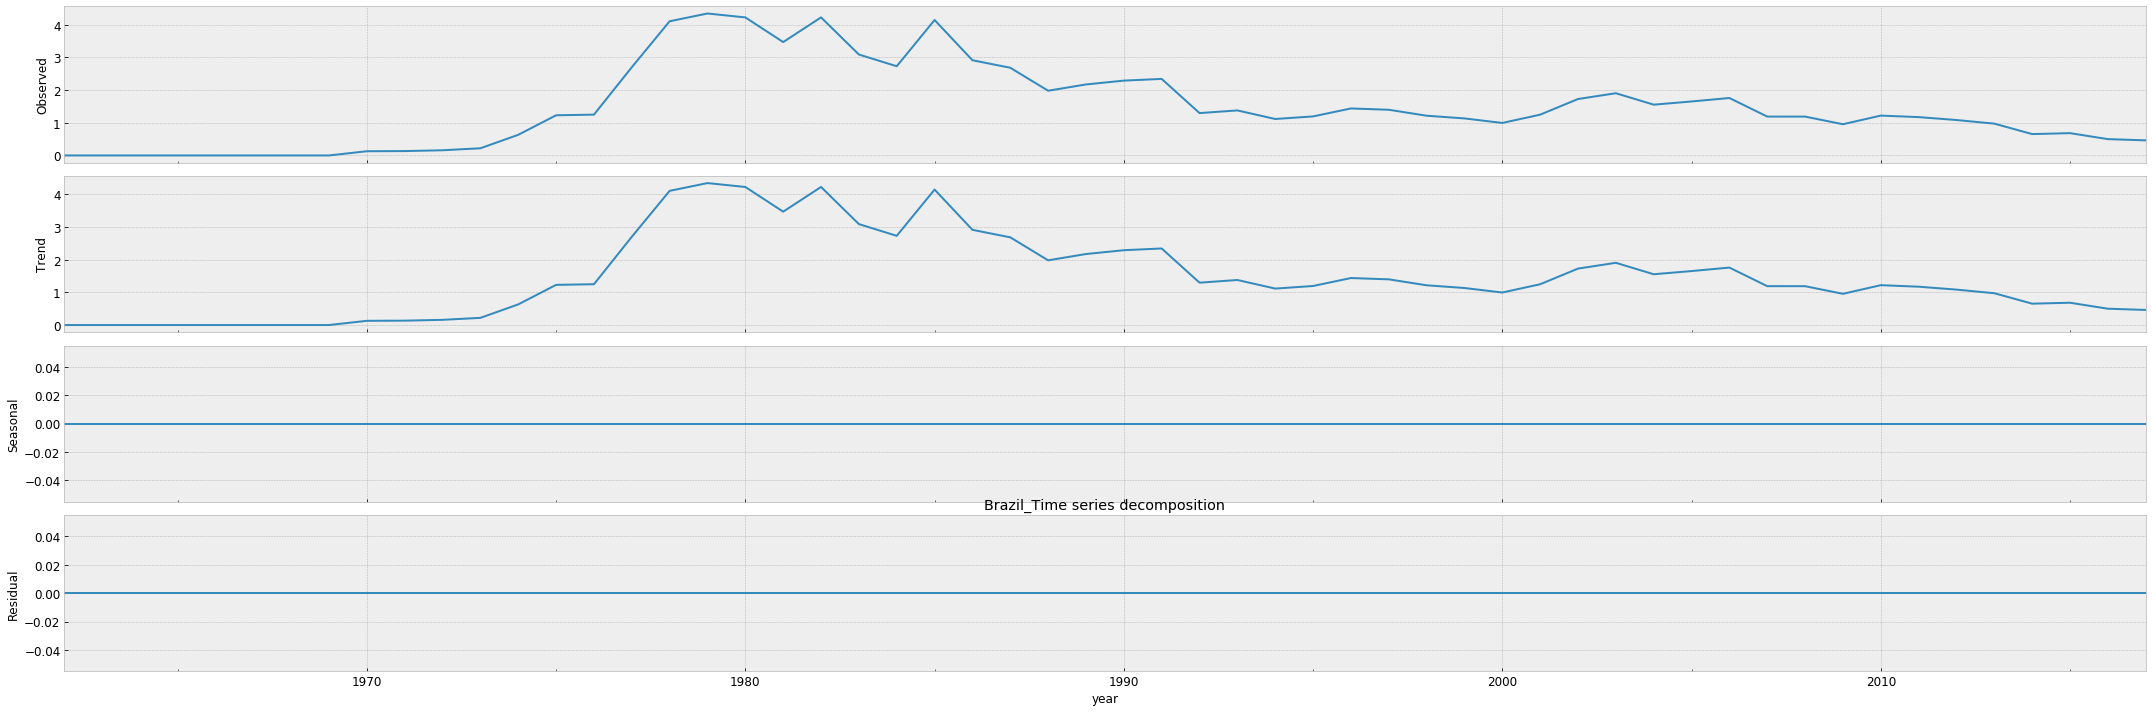

Index(['Argentina', 'Australia', 'Austria', 'Brazil', 'Canada', 'France', 'Germany', 'Hungary', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'Poland', 'Romania', 'Spain', 'Sweden', 'Tunisia', 'United Kingdom', 'United States of America'], dtype='object', name='exporter')
Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/decomposition/


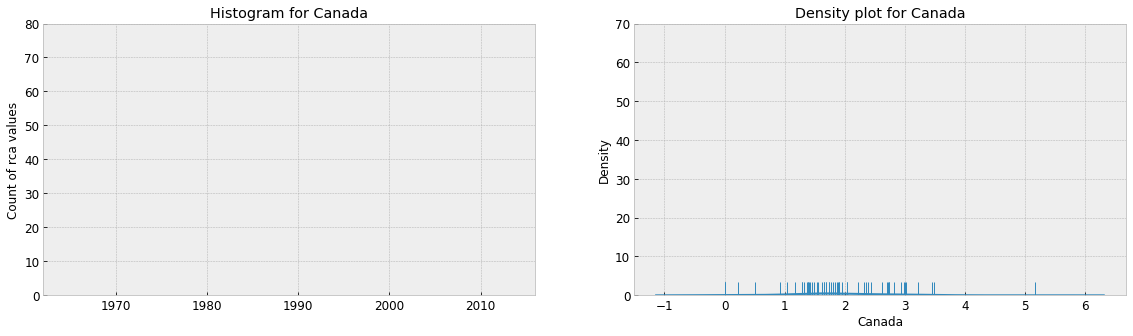

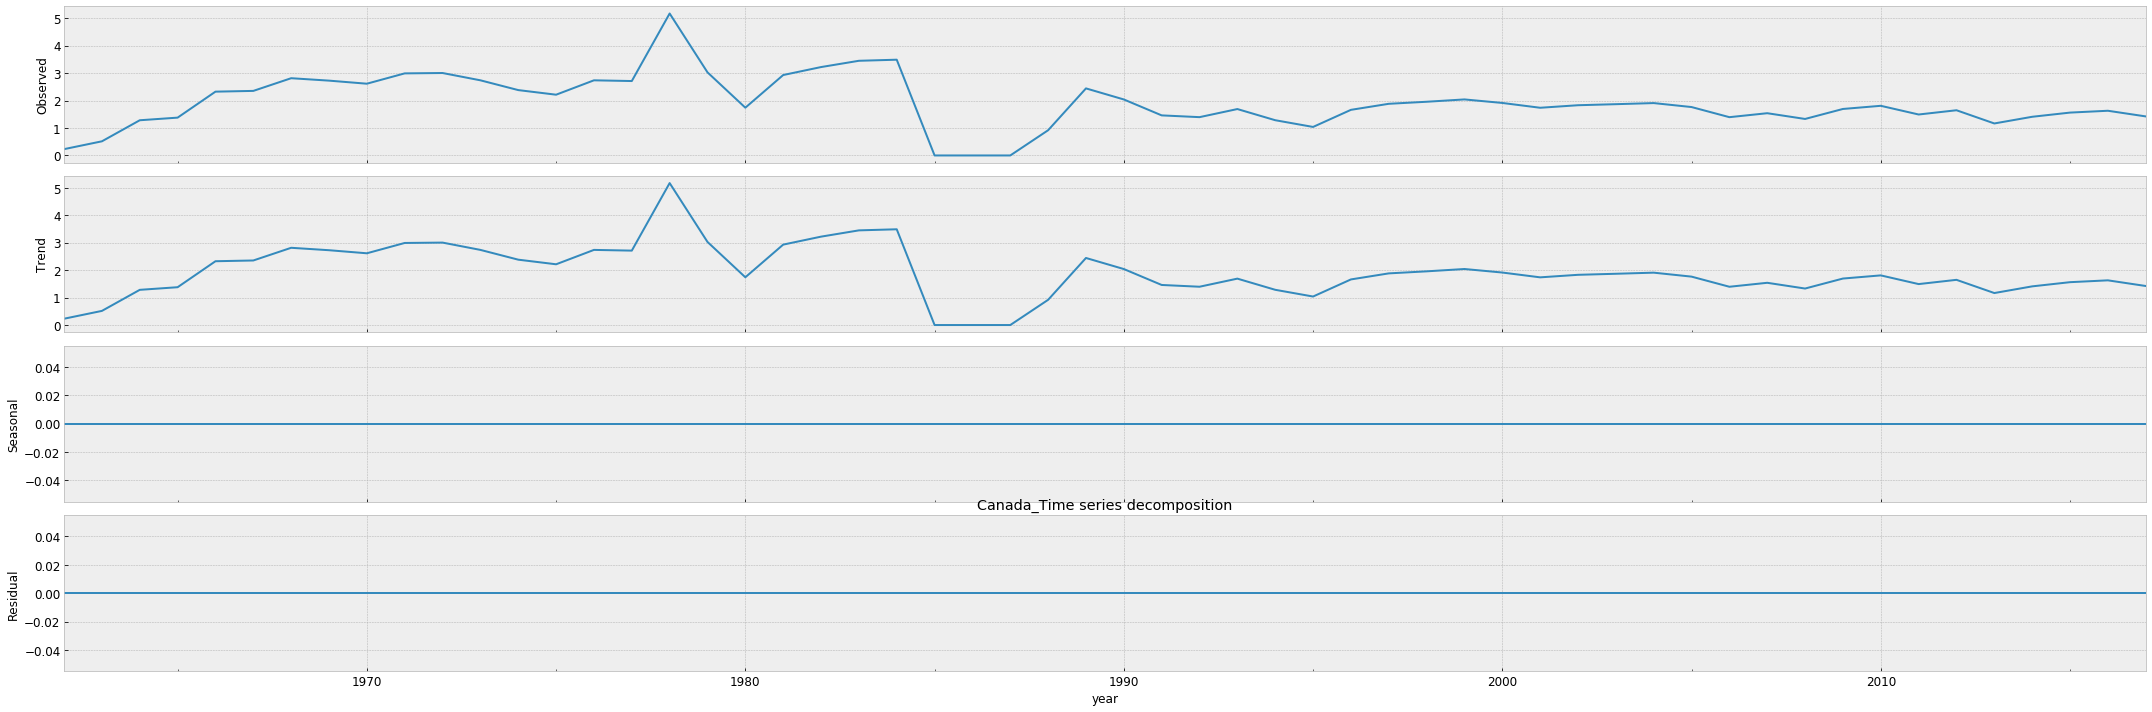

Index(['Argentina', 'Australia', 'Austria', 'Brazil', 'Canada', 'France', 'Germany', 'Hungary', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'Poland', 'Romania', 'Spain', 'Sweden', 'Tunisia', 'United Kingdom', 'United States of America'], dtype='object', name='exporter')
Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/decomposition/


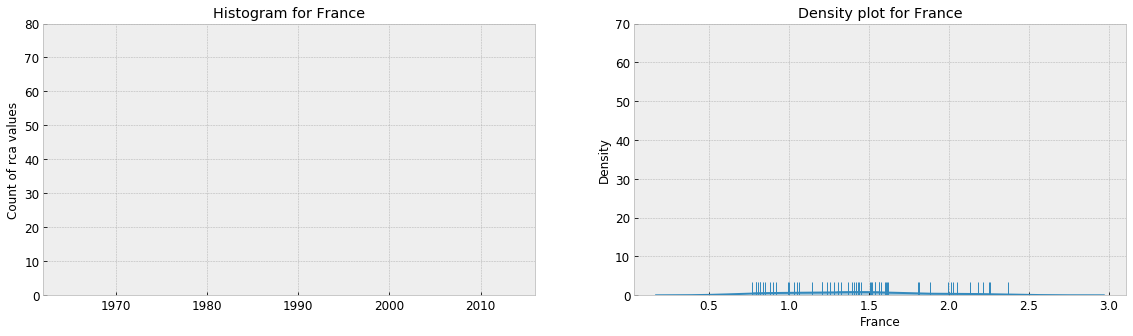

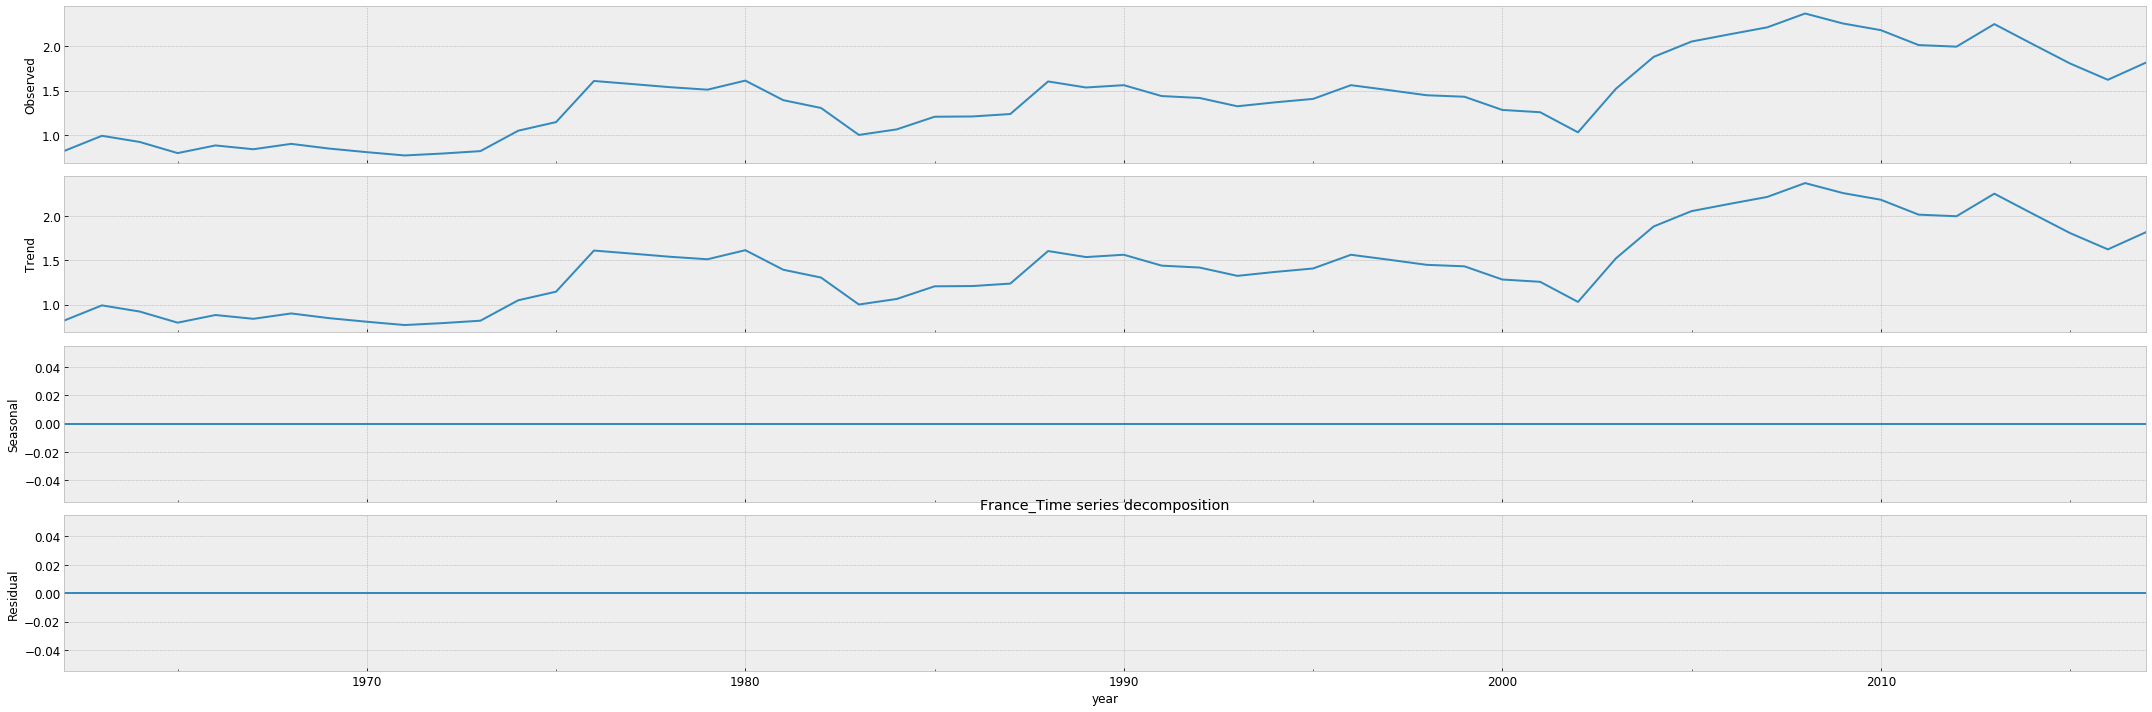

Index(['Argentina', 'Australia', 'Austria', 'Brazil', 'Canada', 'France', 'Germany', 'Hungary', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'Poland', 'Romania', 'Spain', 'Sweden', 'Tunisia', 'United Kingdom', 'United States of America'], dtype='object', name='exporter')
Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/decomposition/


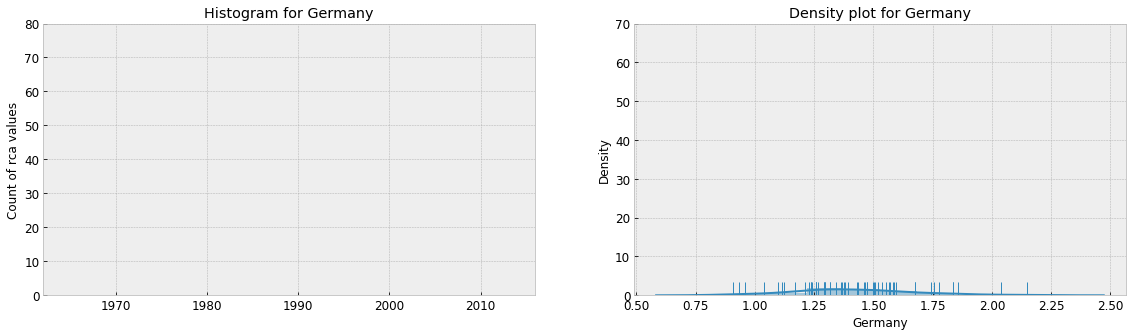

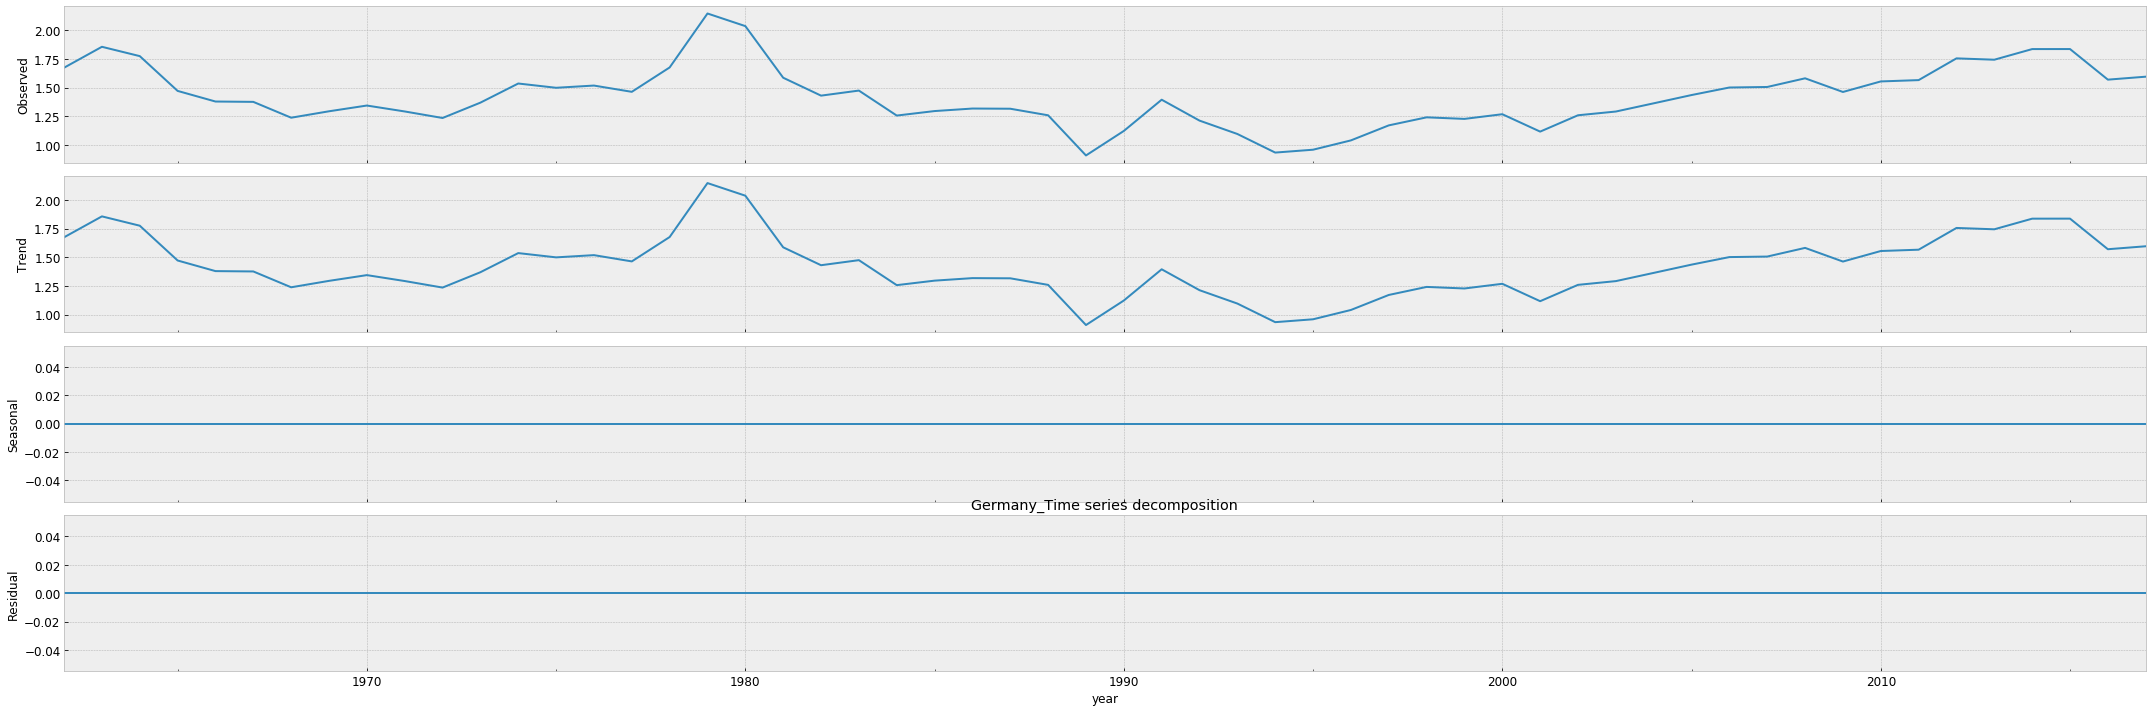

Index(['Argentina', 'Australia', 'Austria', 'Brazil', 'Canada', 'France', 'Germany', 'Hungary', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'Poland', 'Romania', 'Spain', 'Sweden', 'Tunisia', 'United Kingdom', 'United States of America'], dtype='object', name='exporter')
Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/decomposition/


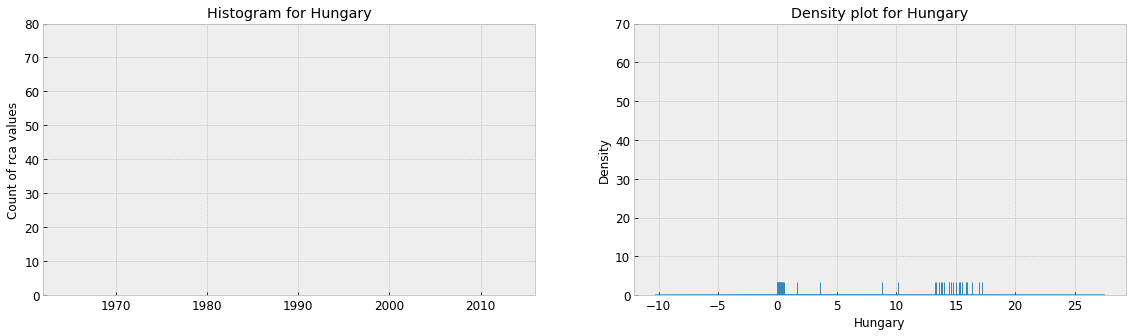

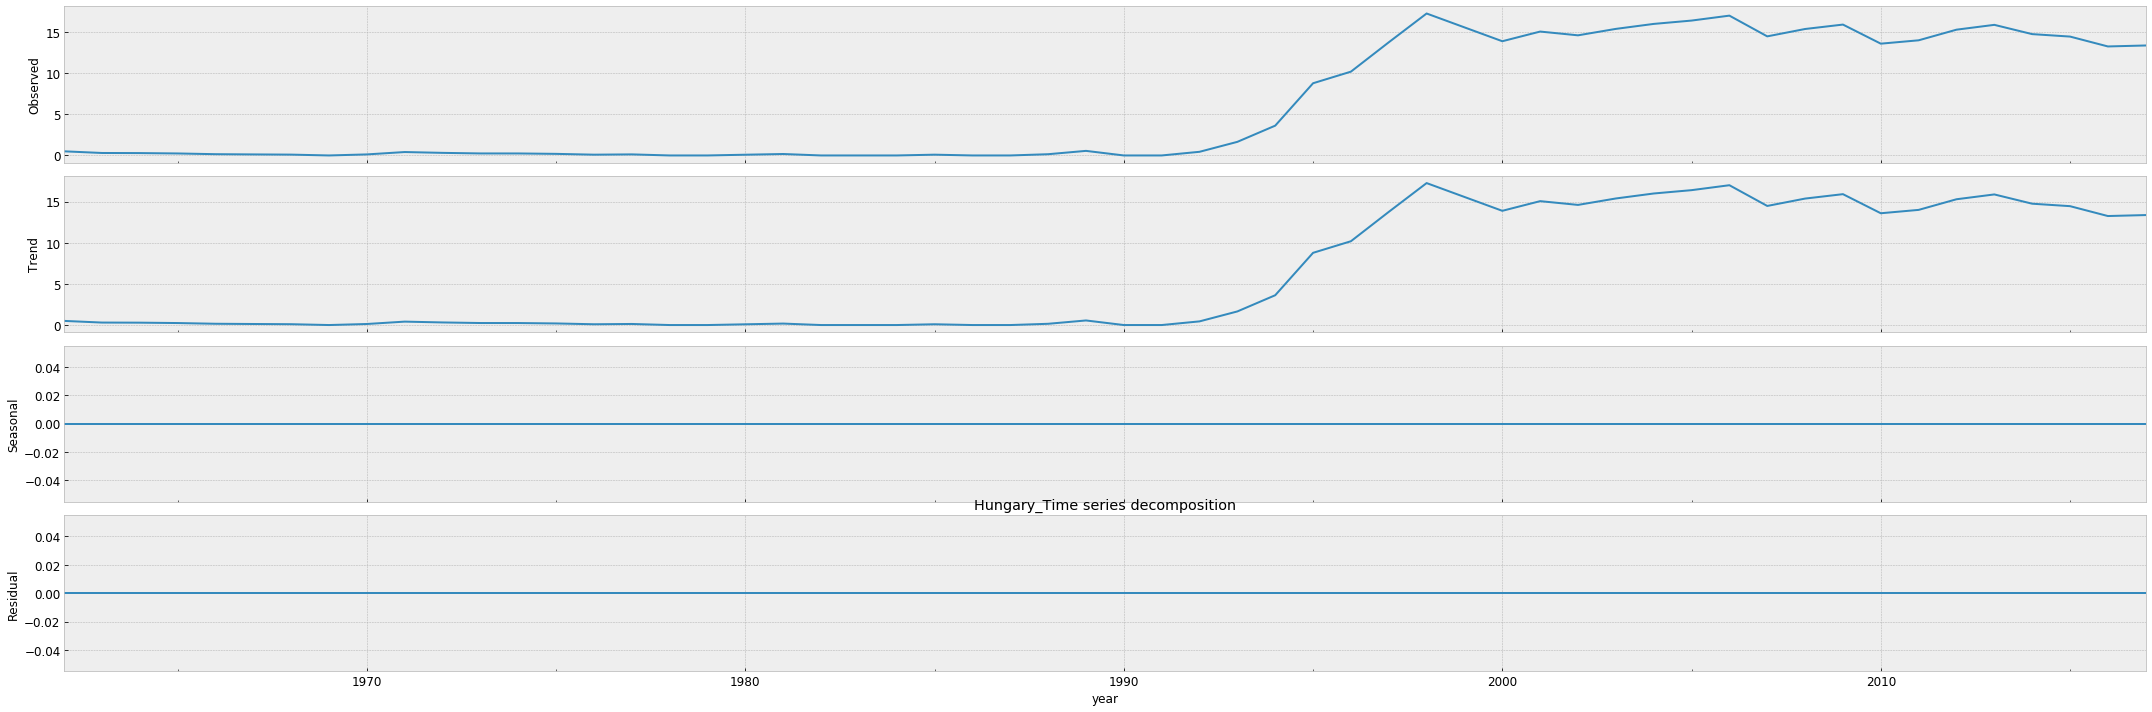

Index(['Argentina', 'Australia', 'Austria', 'Brazil', 'Canada', 'France', 'Germany', 'Hungary', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'Poland', 'Romania', 'Spain', 'Sweden', 'Tunisia', 'United Kingdom', 'United States of America'], dtype='object', name='exporter')
Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/decomposition/


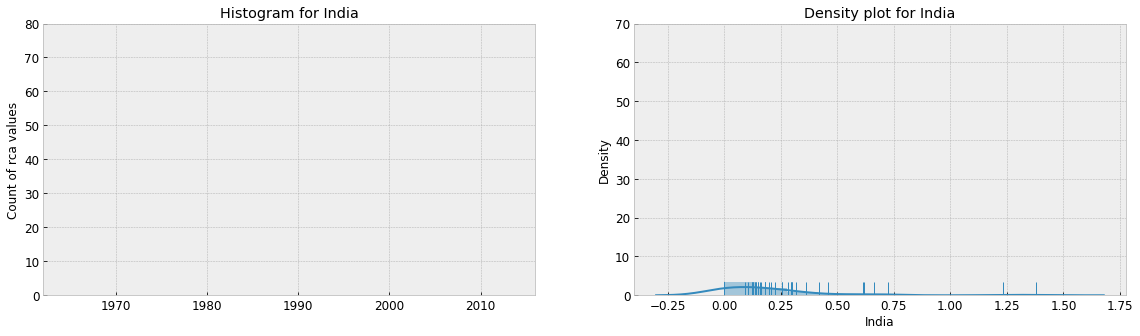

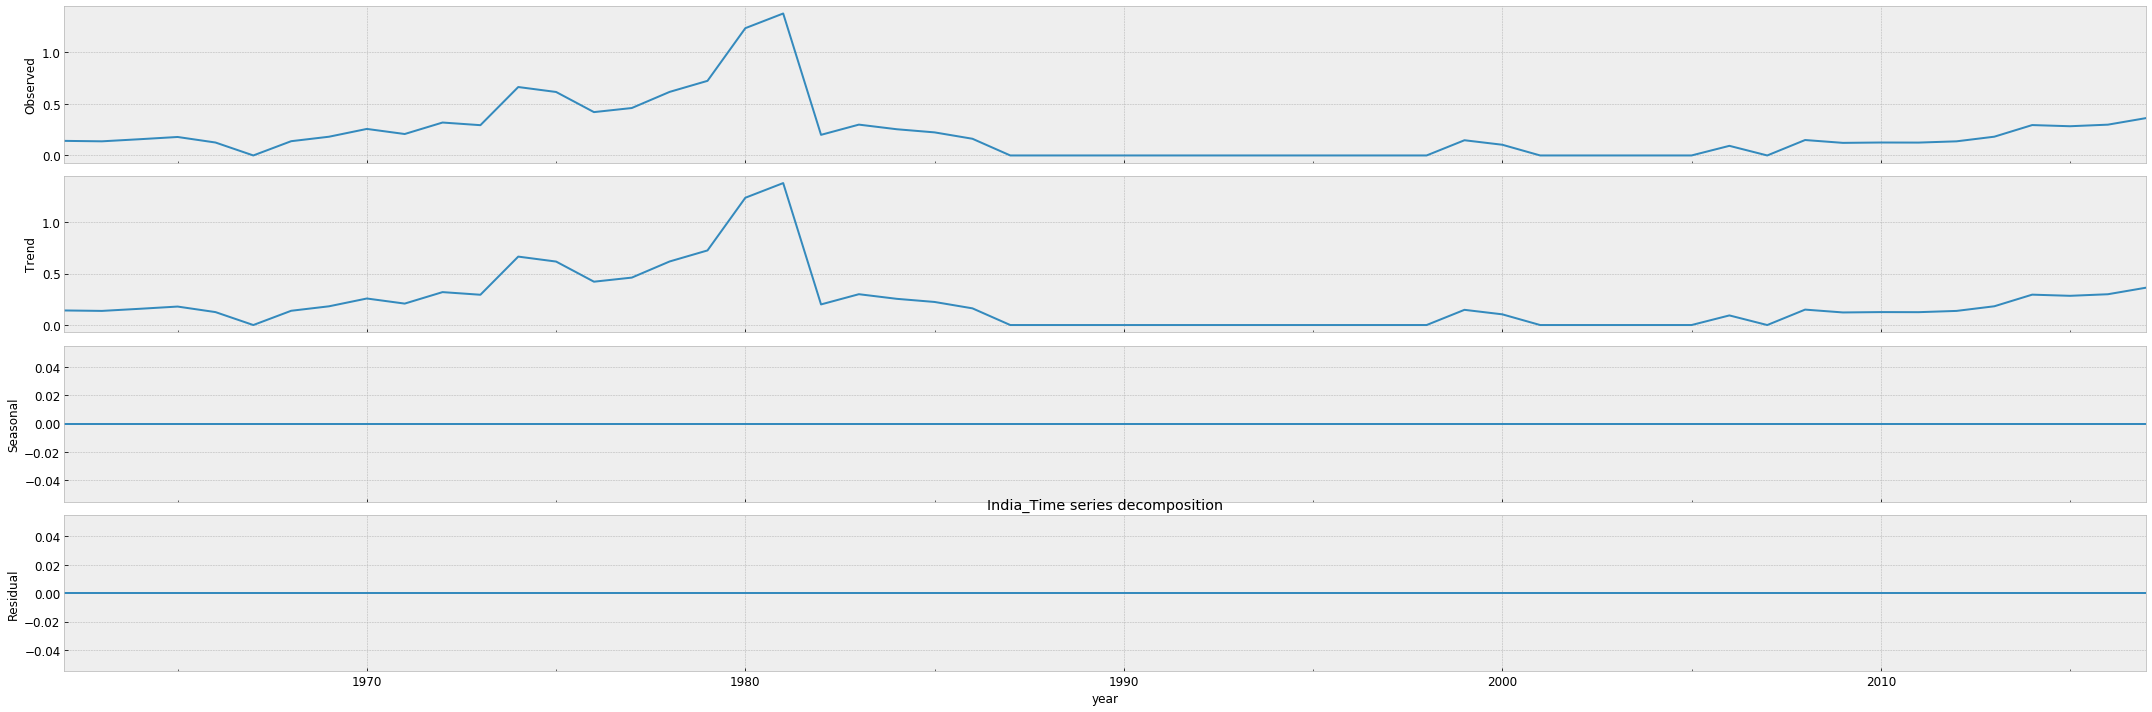

Index(['Argentina', 'Australia', 'Austria', 'Brazil', 'Canada', 'France', 'Germany', 'Hungary', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'Poland', 'Romania', 'Spain', 'Sweden', 'Tunisia', 'United Kingdom', 'United States of America'], dtype='object', name='exporter')
Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/decomposition/


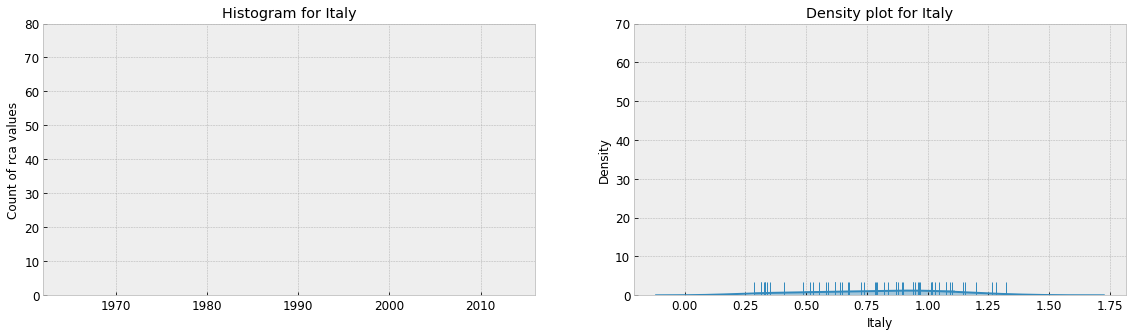

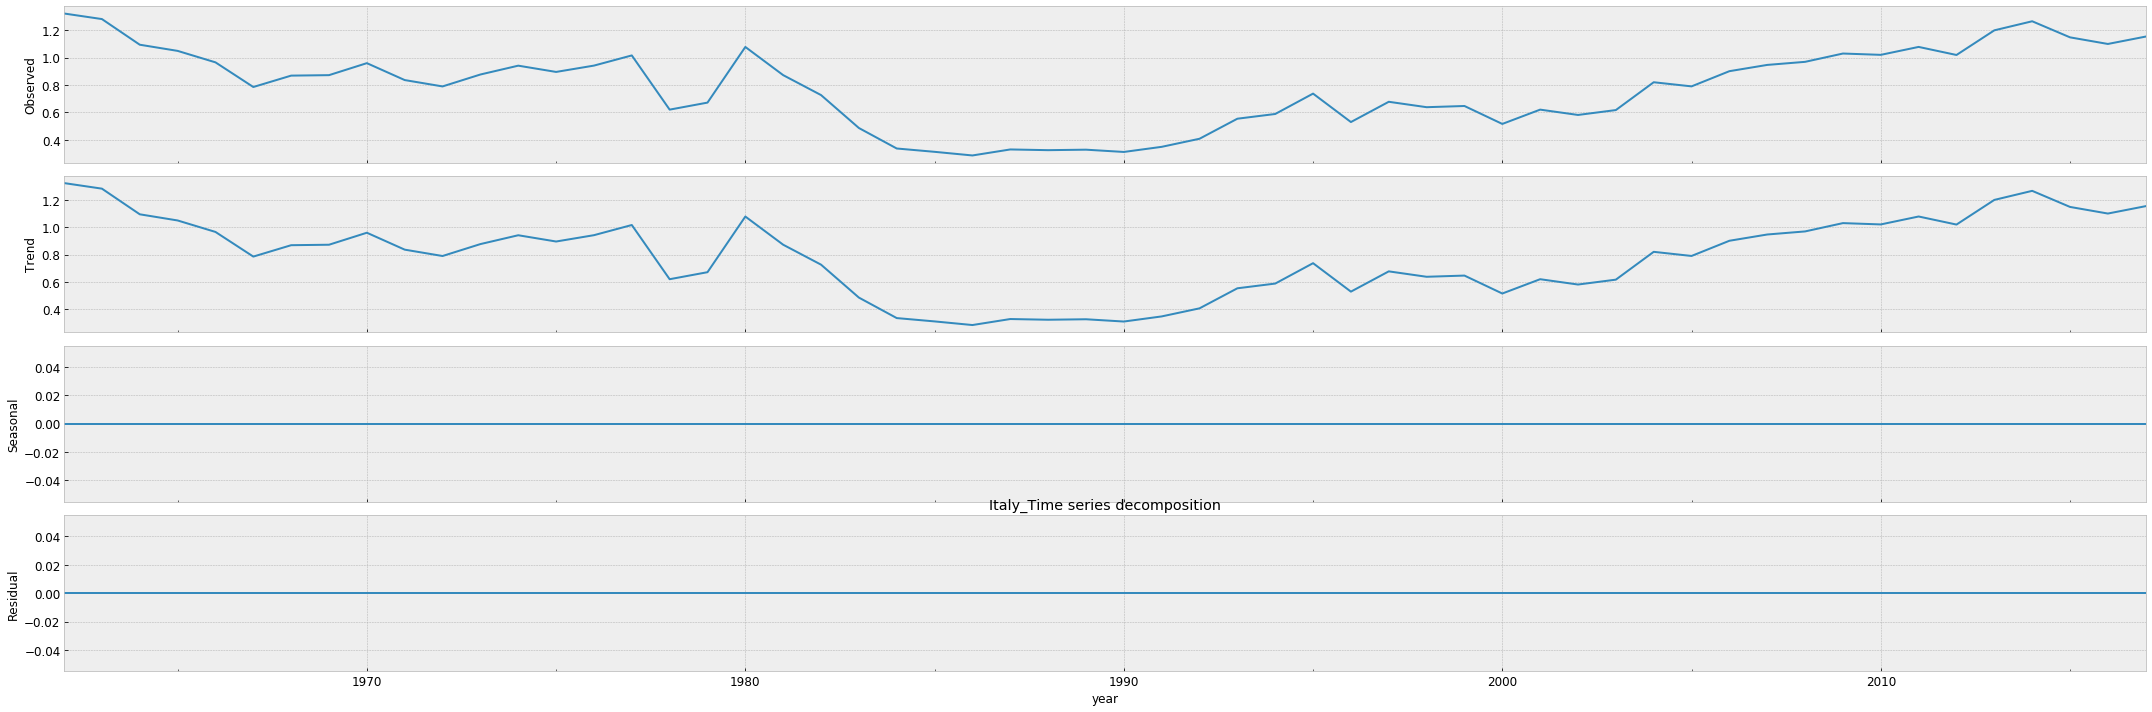

Index(['Argentina', 'Australia', 'Austria', 'Brazil', 'Canada', 'France', 'Germany', 'Hungary', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'Poland', 'Romania', 'Spain', 'Sweden', 'Tunisia', 'United Kingdom', 'United States of America'], dtype='object', name='exporter')
Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/decomposition/


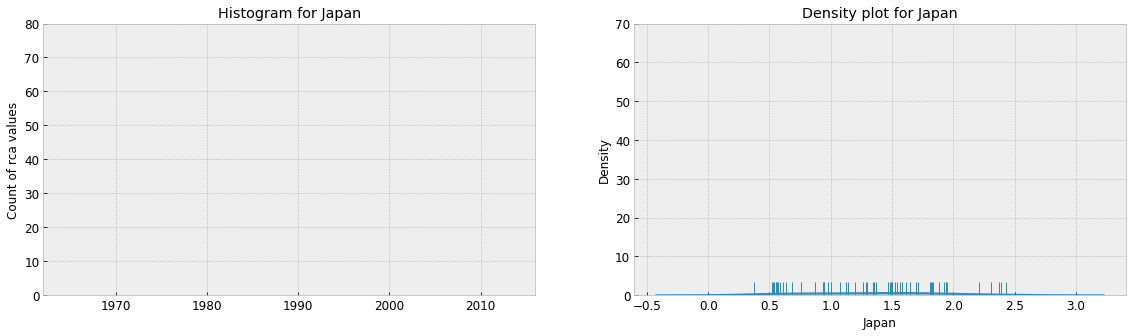

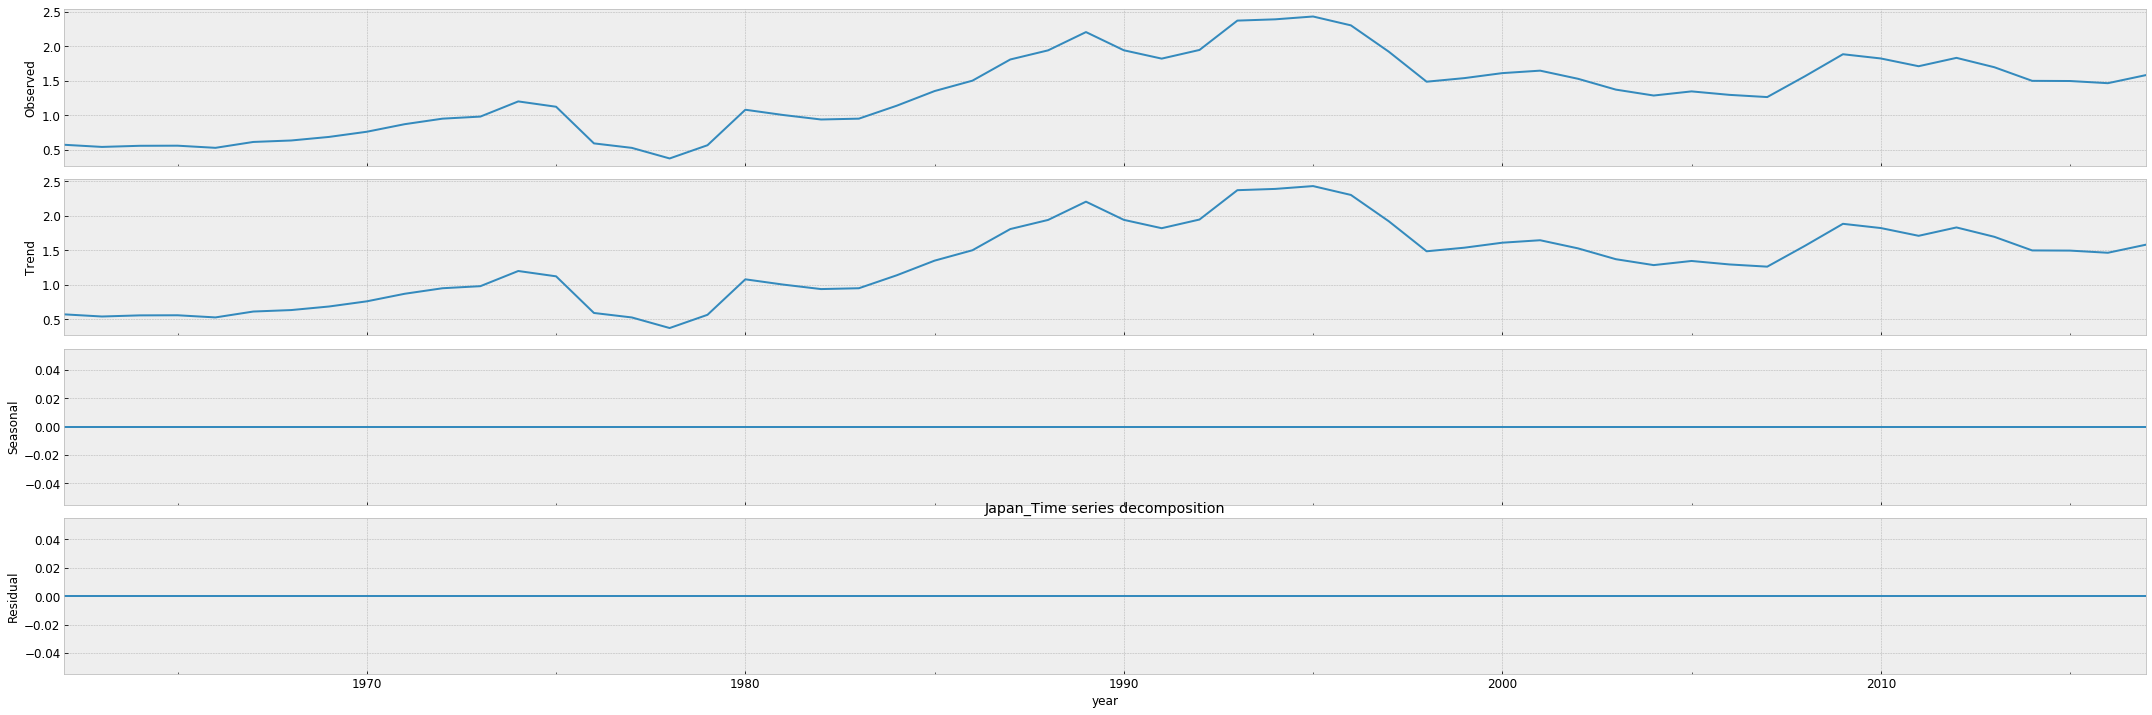

Index(['Argentina', 'Australia', 'Austria', 'Brazil', 'Canada', 'France', 'Germany', 'Hungary', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'Poland', 'Romania', 'Spain', 'Sweden', 'Tunisia', 'United Kingdom', 'United States of America'], dtype='object', name='exporter')
Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/decomposition/


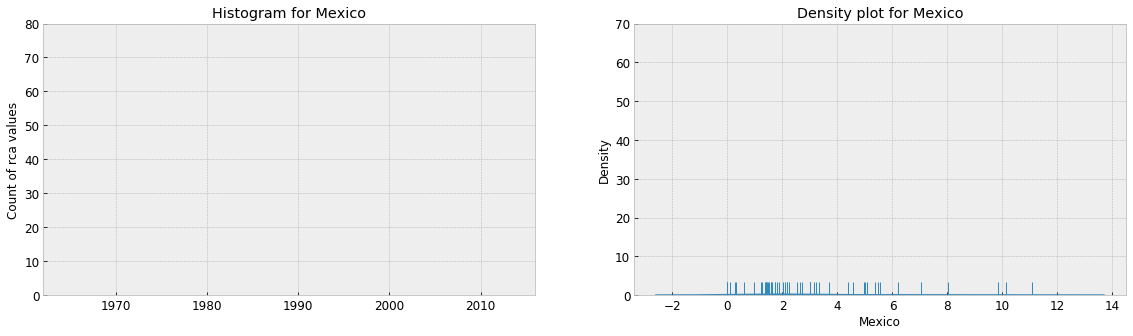

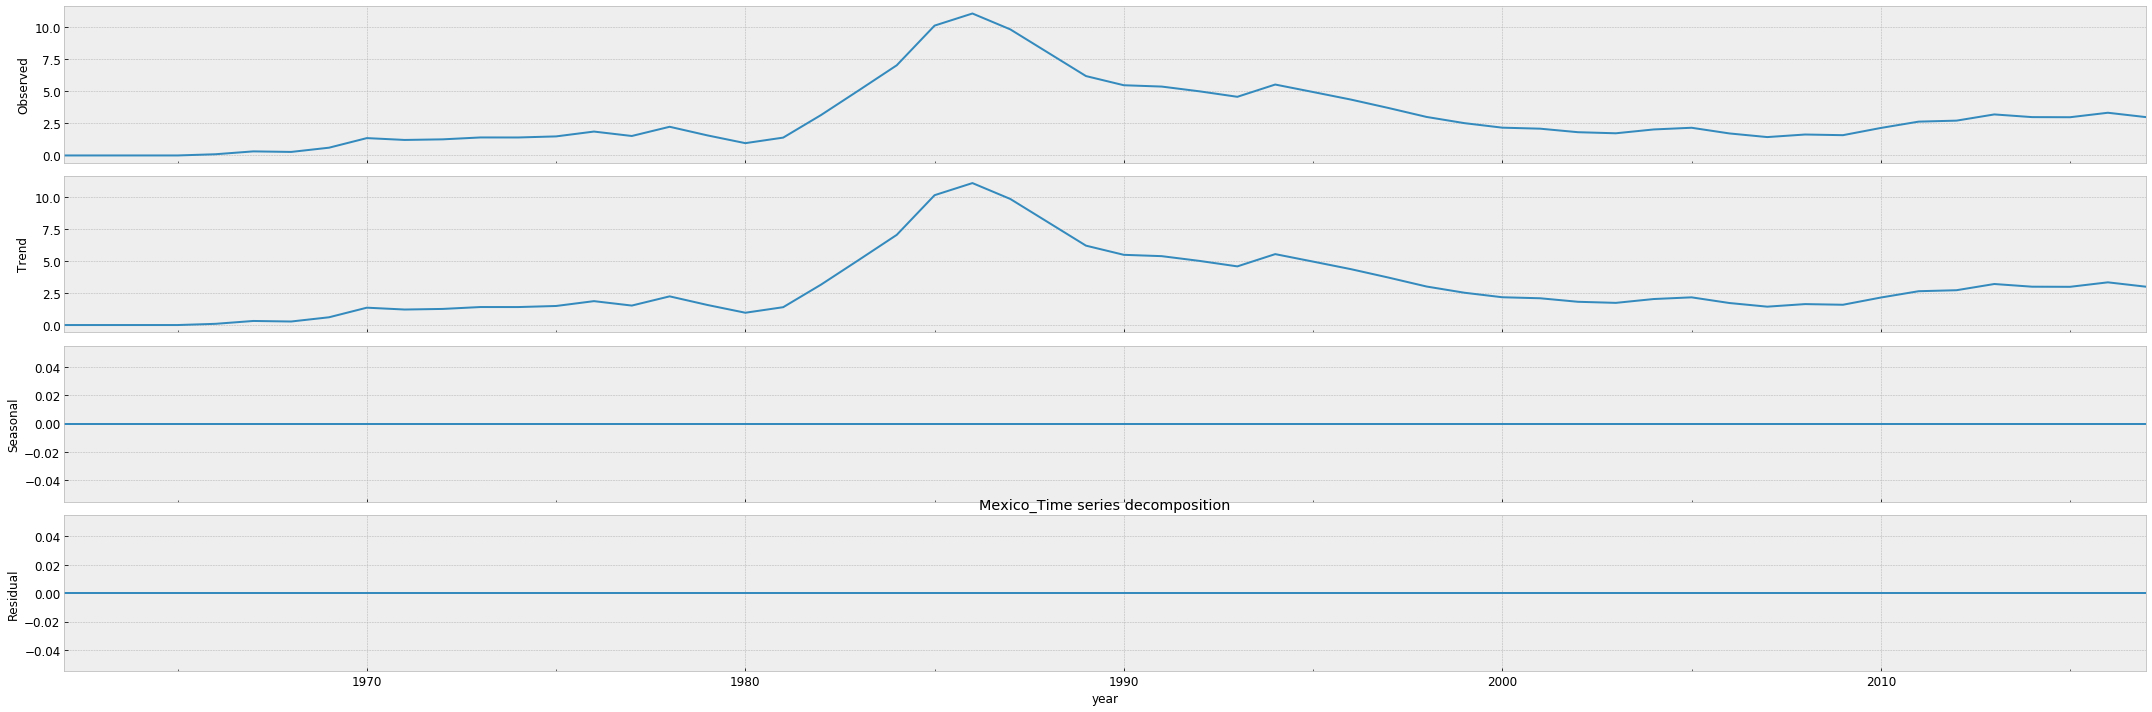

Index(['Argentina', 'Australia', 'Austria', 'Brazil', 'Canada', 'France', 'Germany', 'Hungary', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'Poland', 'Romania', 'Spain', 'Sweden', 'Tunisia', 'United Kingdom', 'United States of America'], dtype='object', name='exporter')
Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/decomposition/


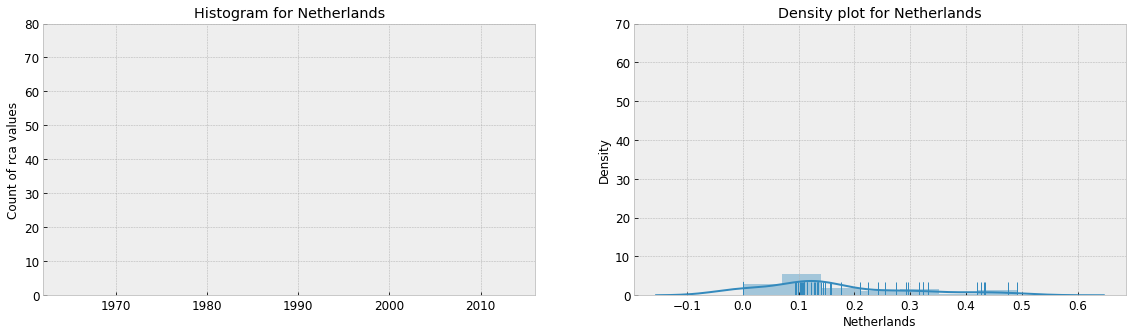

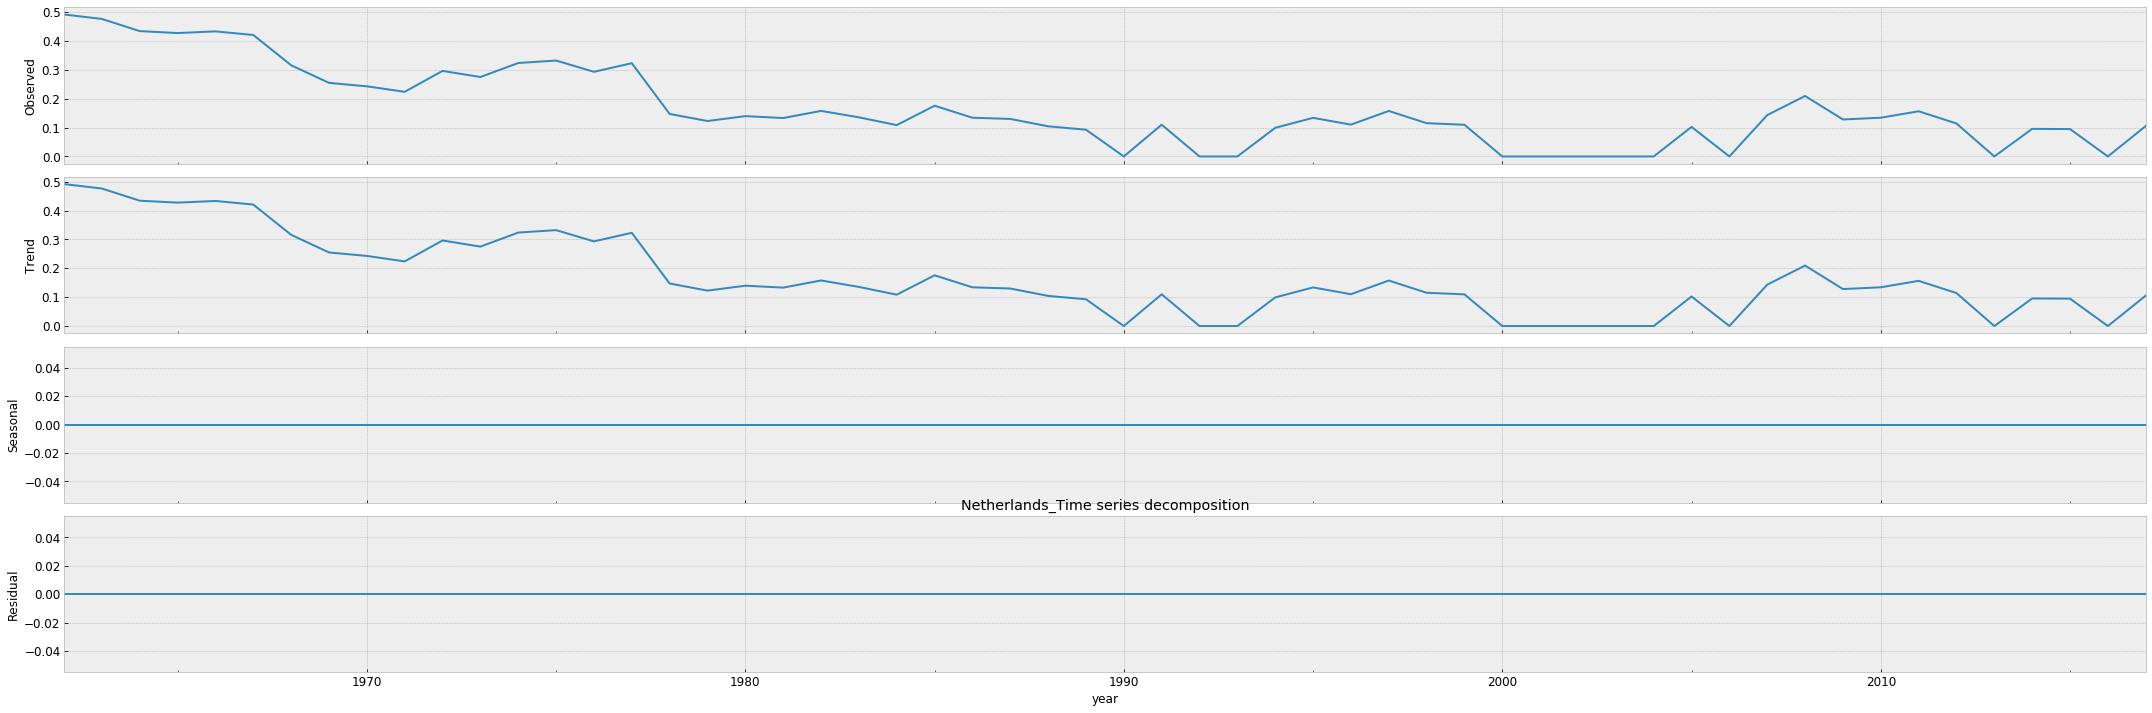

Index(['Argentina', 'Australia', 'Austria', 'Brazil', 'Canada', 'France', 'Germany', 'Hungary', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'Poland', 'Romania', 'Spain', 'Sweden', 'Tunisia', 'United Kingdom', 'United States of America'], dtype='object', name='exporter')
Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/decomposition/


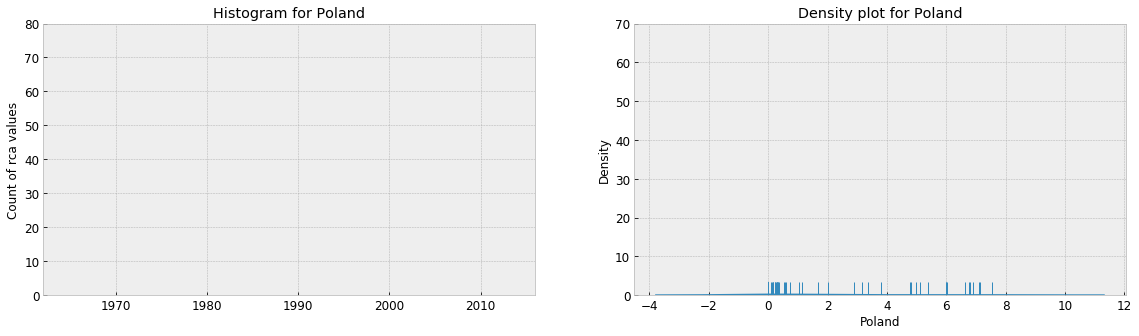

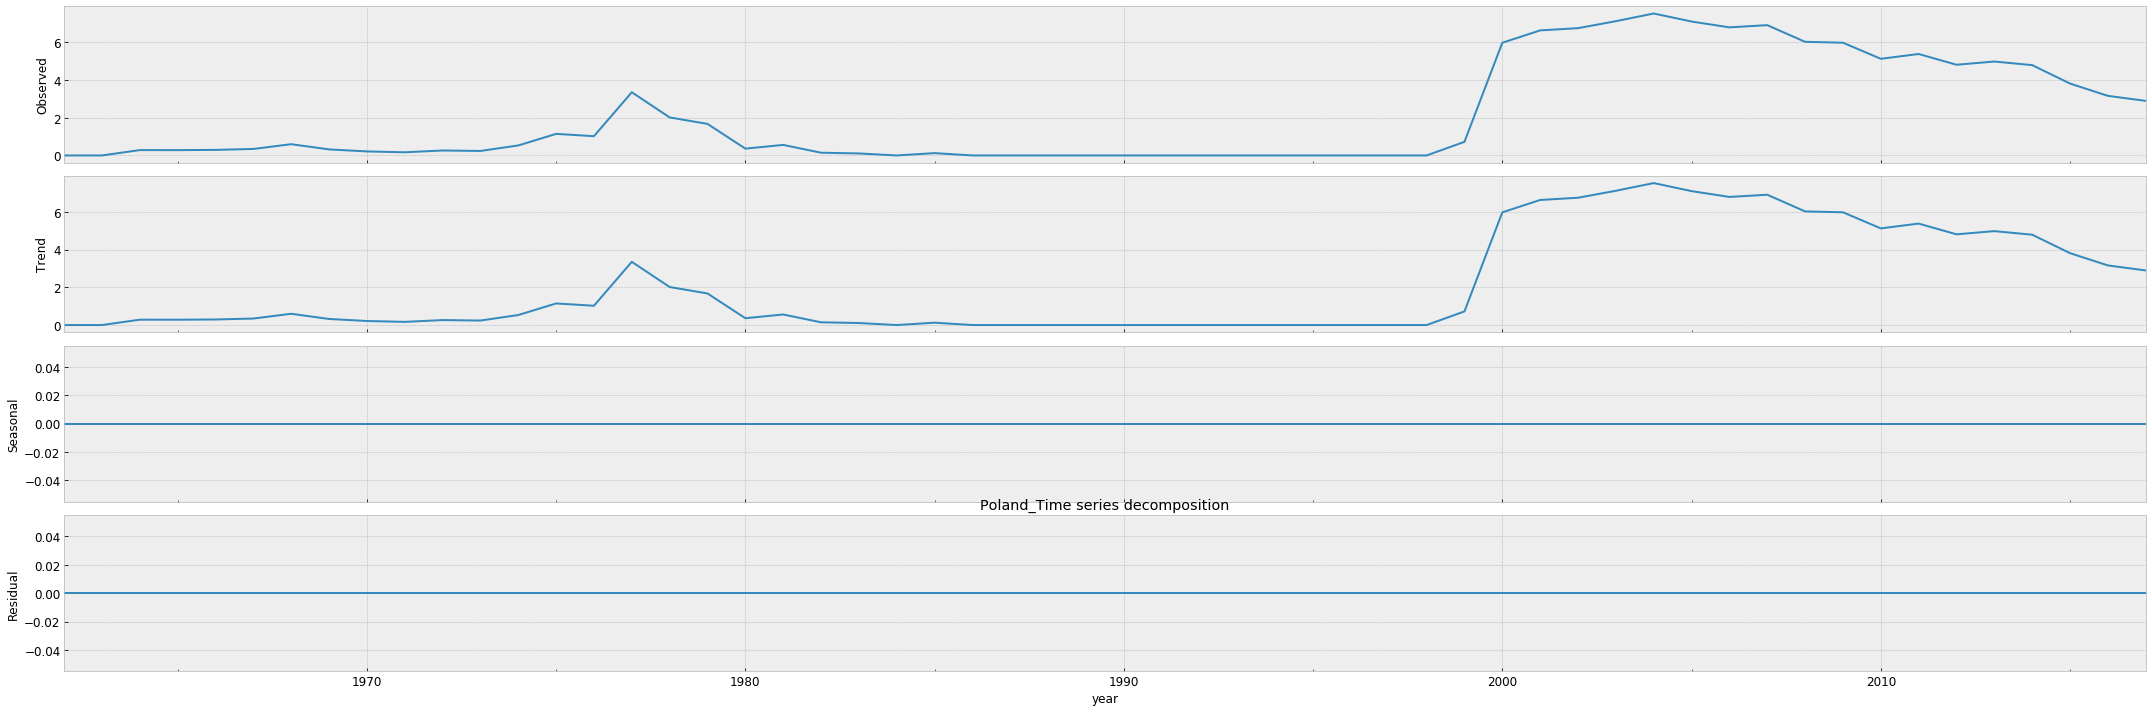

Index(['Argentina', 'Australia', 'Austria', 'Brazil', 'Canada', 'France', 'Germany', 'Hungary', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'Poland', 'Romania', 'Spain', 'Sweden', 'Tunisia', 'United Kingdom', 'United States of America'], dtype='object', name='exporter')
Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/decomposition/


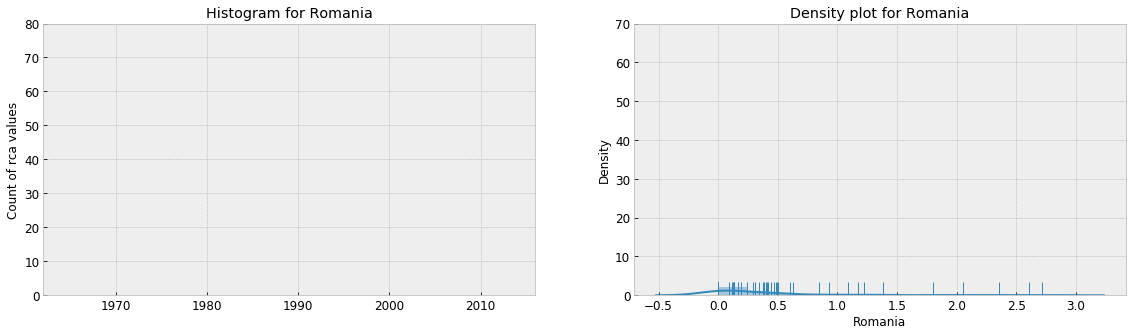

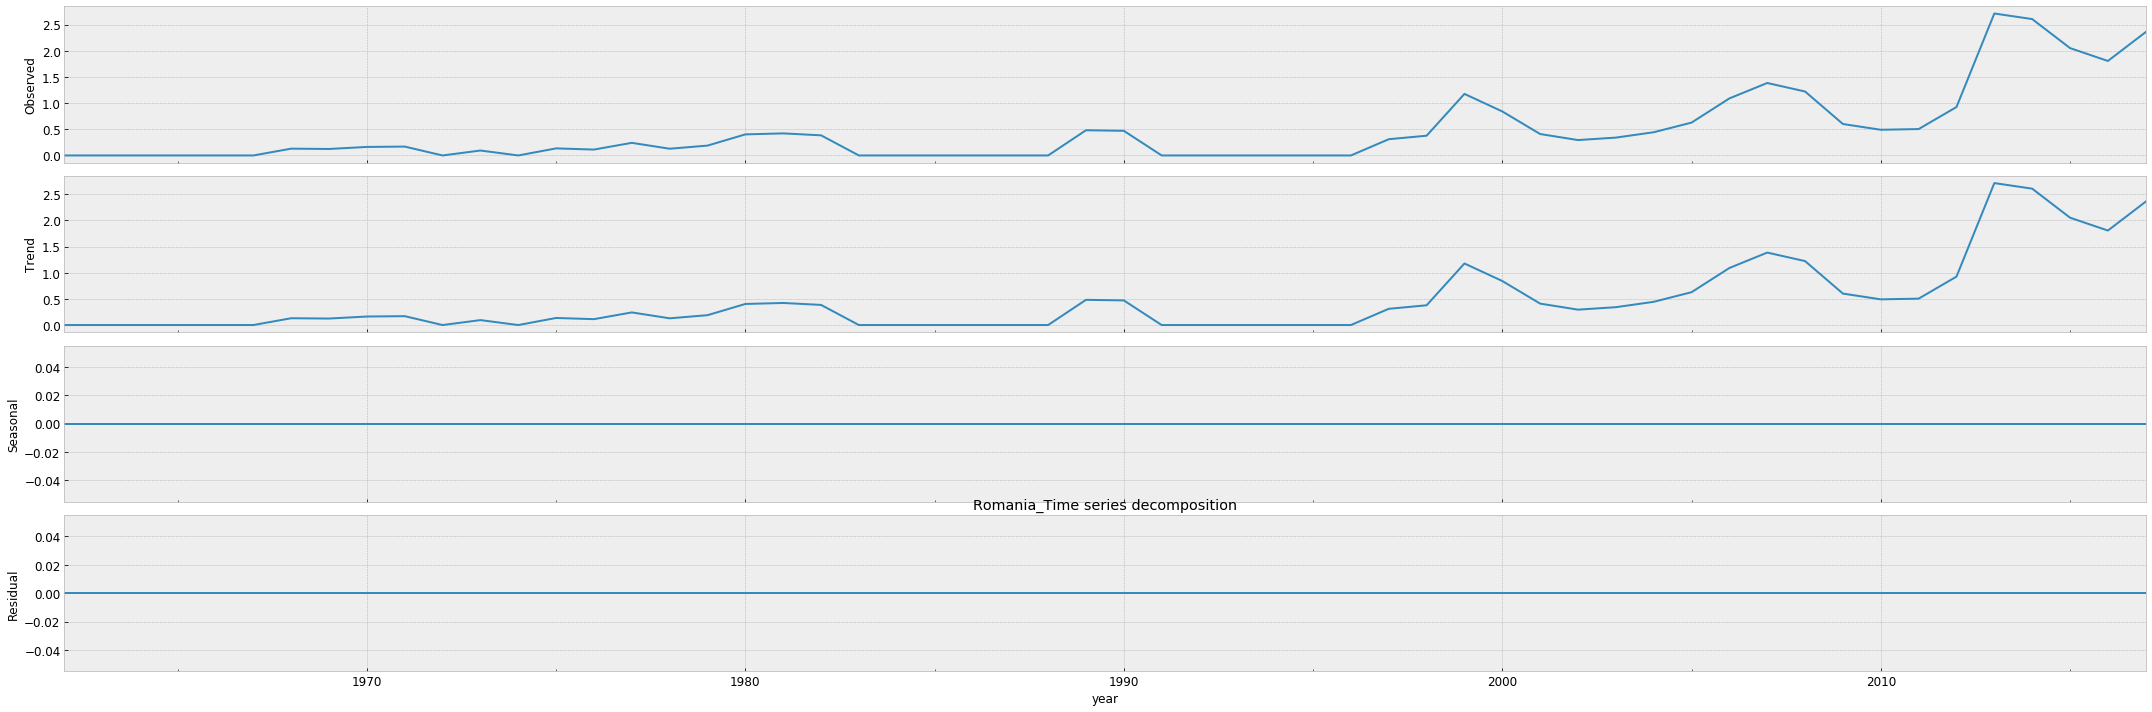

Index(['Argentina', 'Australia', 'Austria', 'Brazil', 'Canada', 'France', 'Germany', 'Hungary', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'Poland', 'Romania', 'Spain', 'Sweden', 'Tunisia', 'United Kingdom', 'United States of America'], dtype='object', name='exporter')
Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/decomposition/


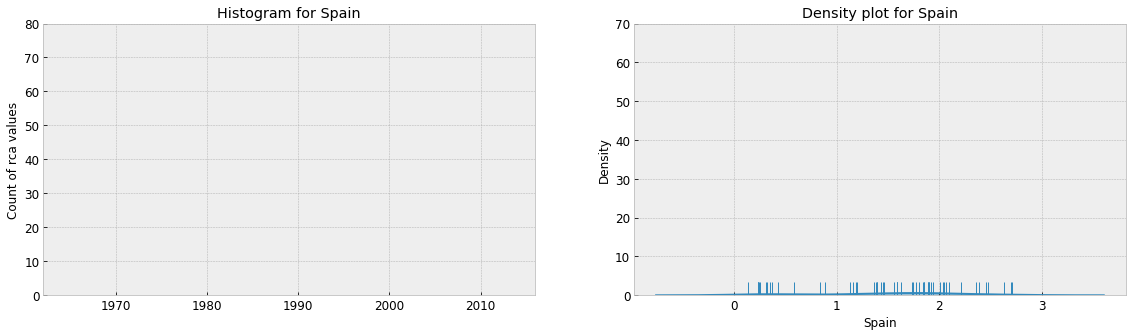

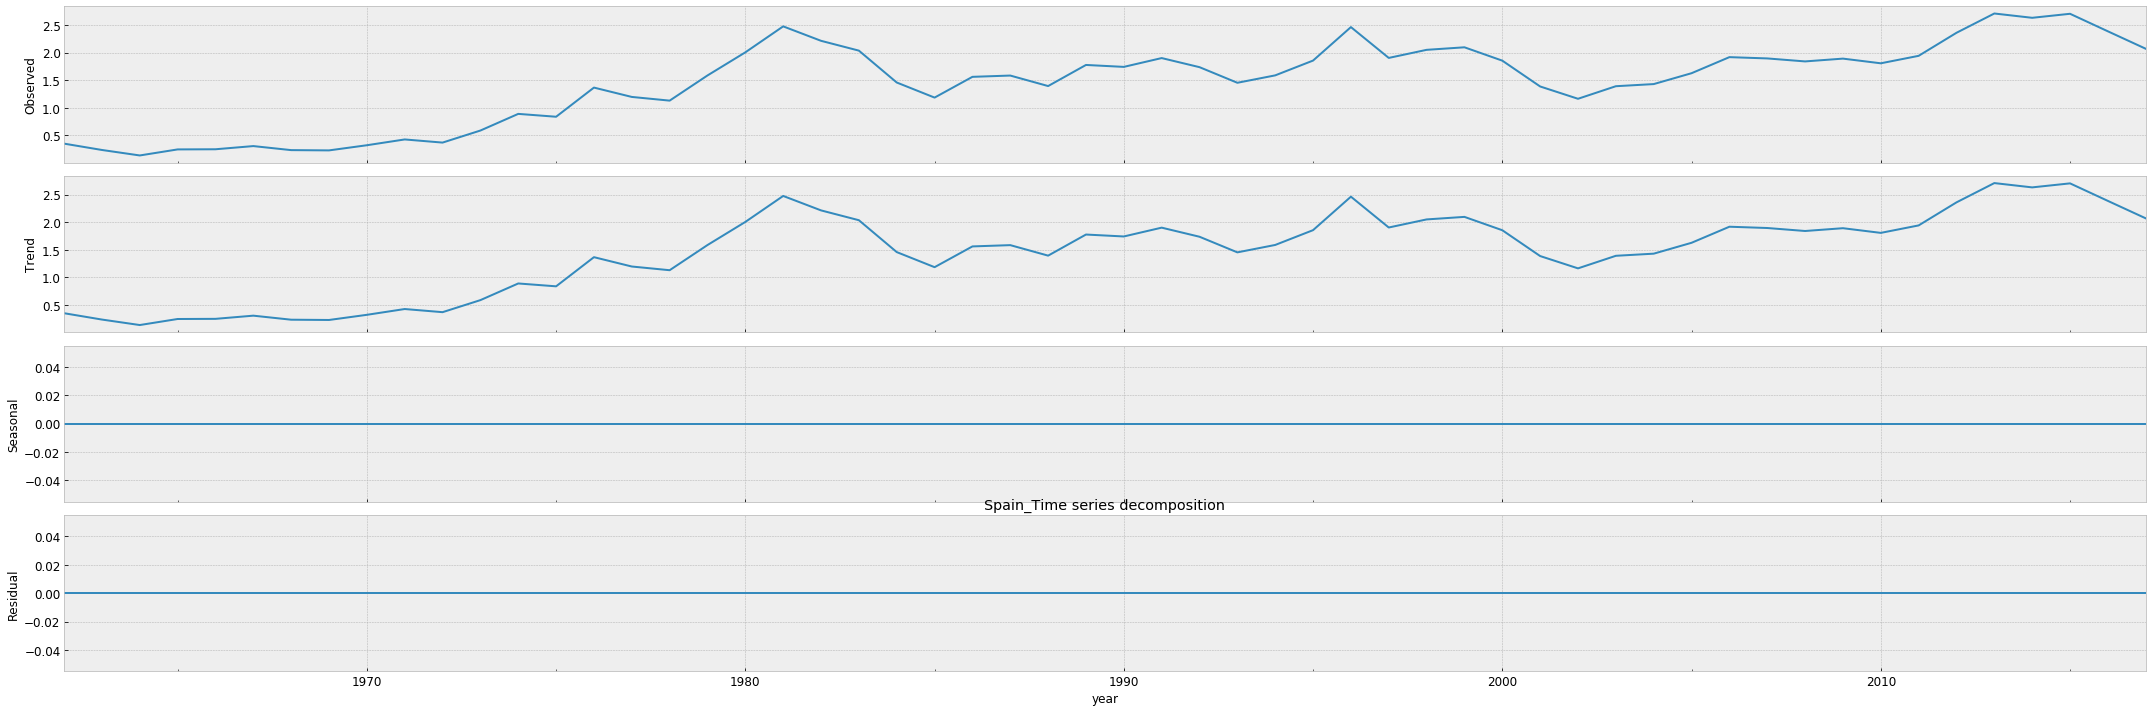

Index(['Argentina', 'Australia', 'Austria', 'Brazil', 'Canada', 'France', 'Germany', 'Hungary', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'Poland', 'Romania', 'Spain', 'Sweden', 'Tunisia', 'United Kingdom', 'United States of America'], dtype='object', name='exporter')
Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/decomposition/


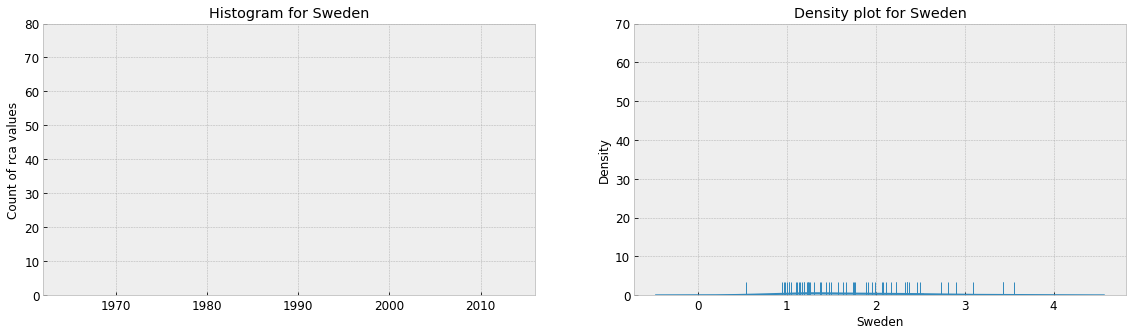

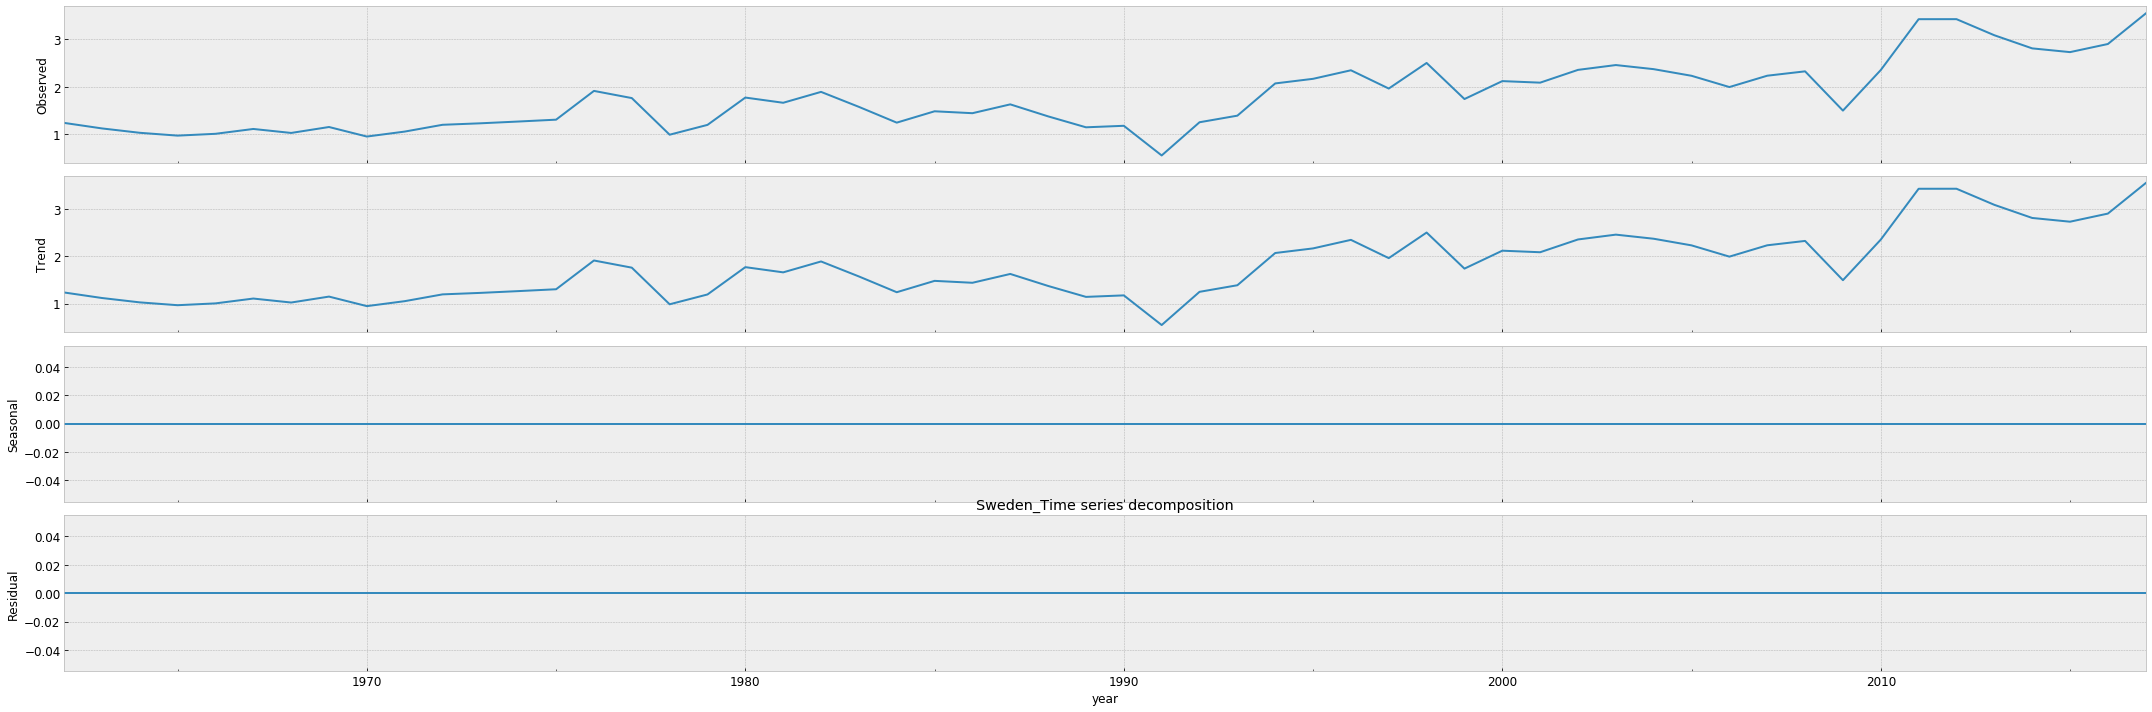

Index(['Argentina', 'Australia', 'Austria', 'Brazil', 'Canada', 'France', 'Germany', 'Hungary', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'Poland', 'Romania', 'Spain', 'Sweden', 'Tunisia', 'United Kingdom', 'United States of America'], dtype='object', name='exporter')
Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/decomposition/


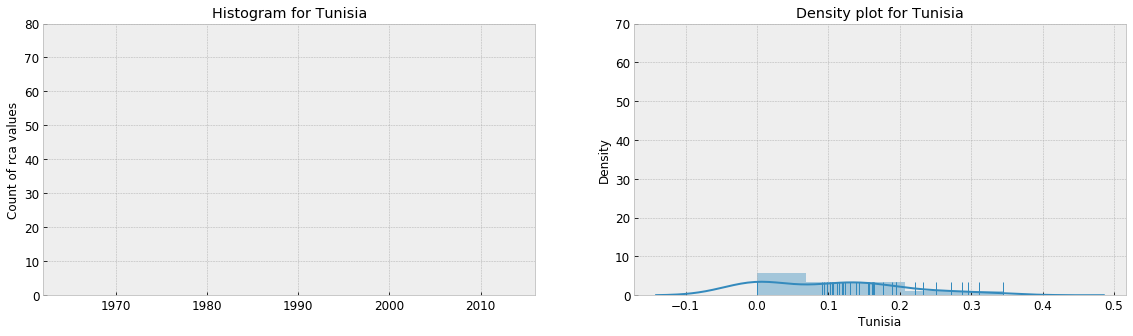

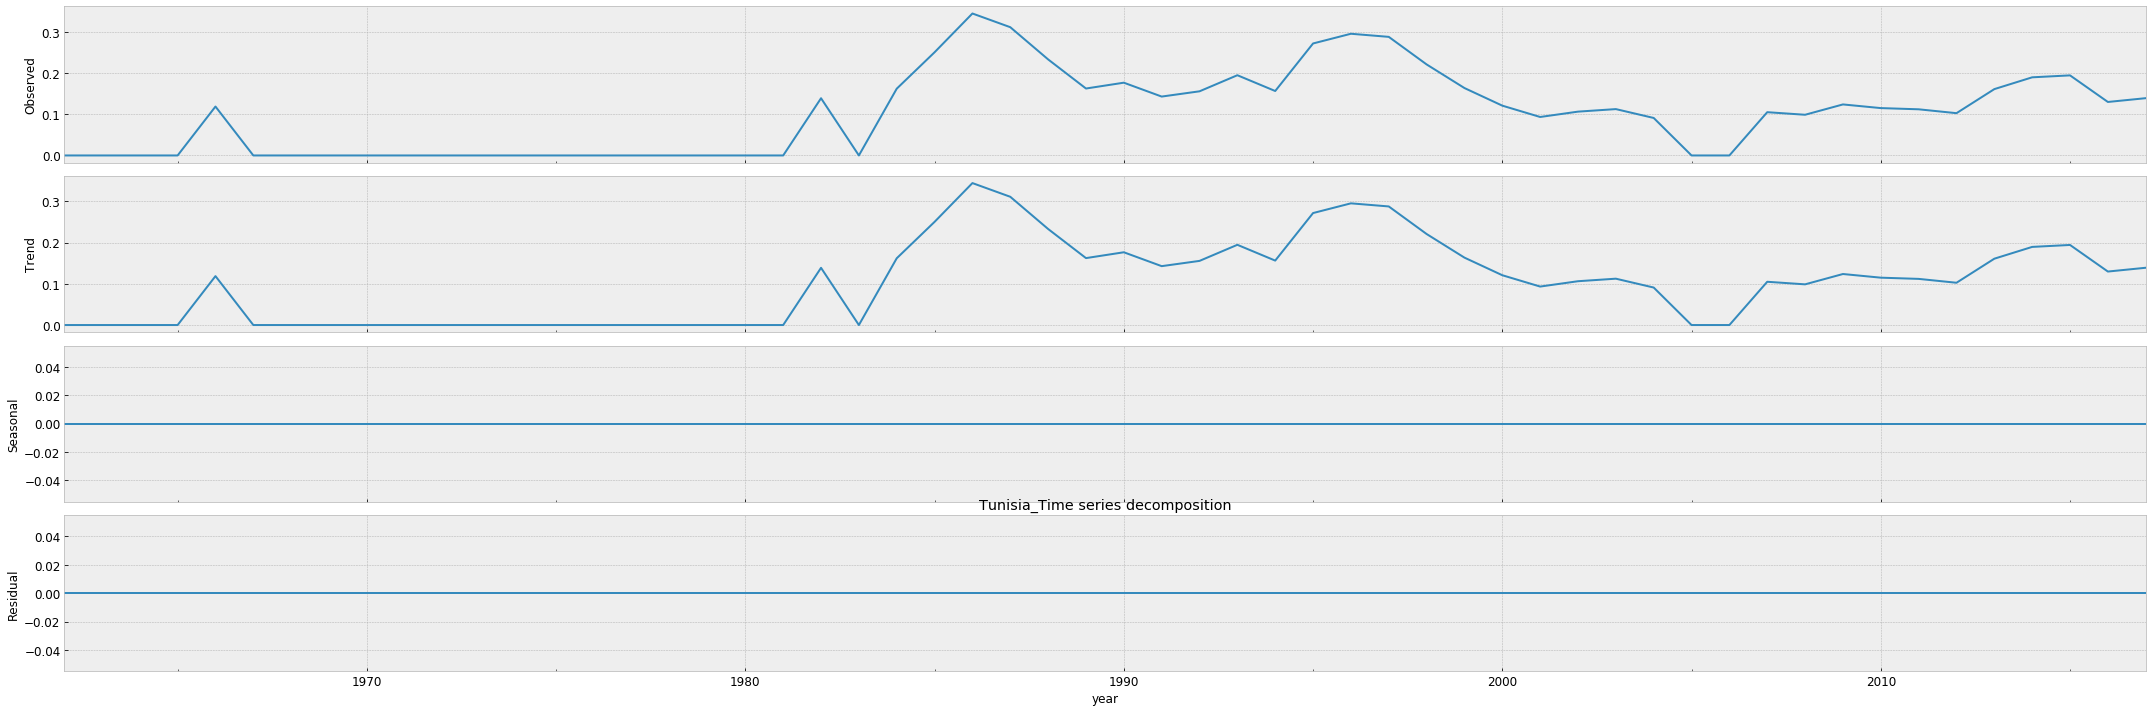

Index(['Argentina', 'Australia', 'Austria', 'Brazil', 'Canada', 'France', 'Germany', 'Hungary', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'Poland', 'Romania', 'Spain', 'Sweden', 'Tunisia', 'United Kingdom', 'United States of America'], dtype='object', name='exporter')
Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/decomposition/


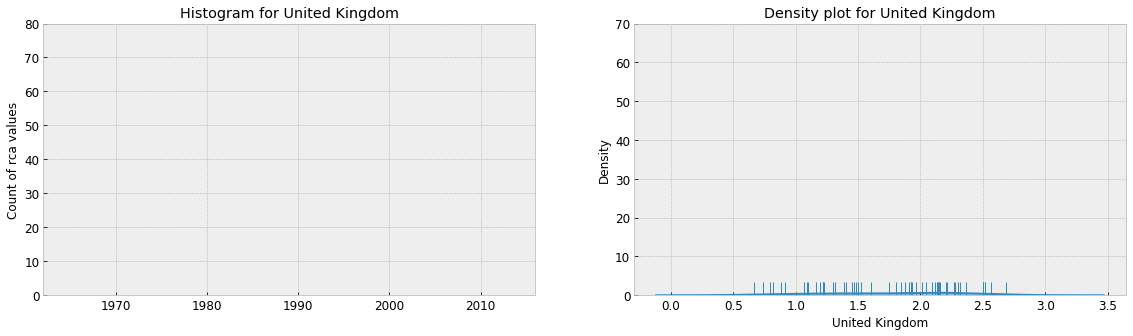

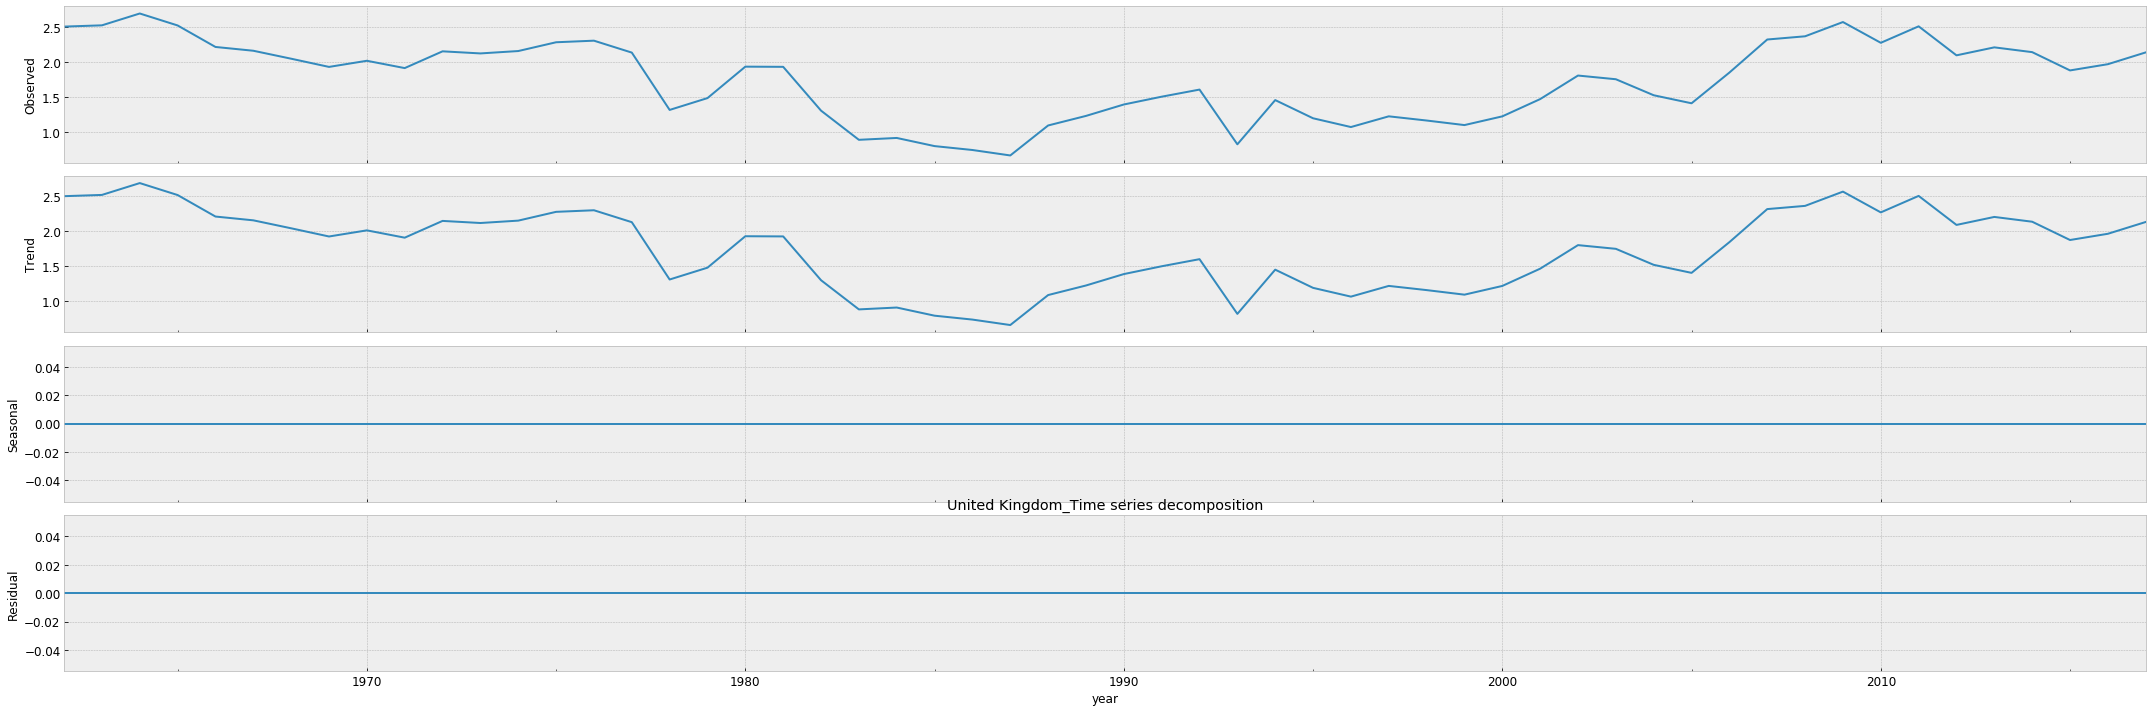

Index(['Argentina', 'Australia', 'Austria', 'Brazil', 'Canada', 'France', 'Germany', 'Hungary', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'Poland', 'Romania', 'Spain', 'Sweden', 'Tunisia', 'United Kingdom', 'United States of America'], dtype='object', name='exporter')
Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/decomposition/


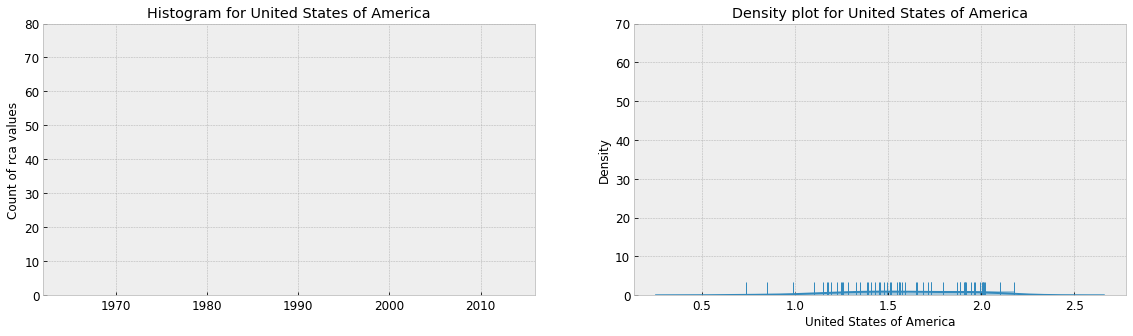

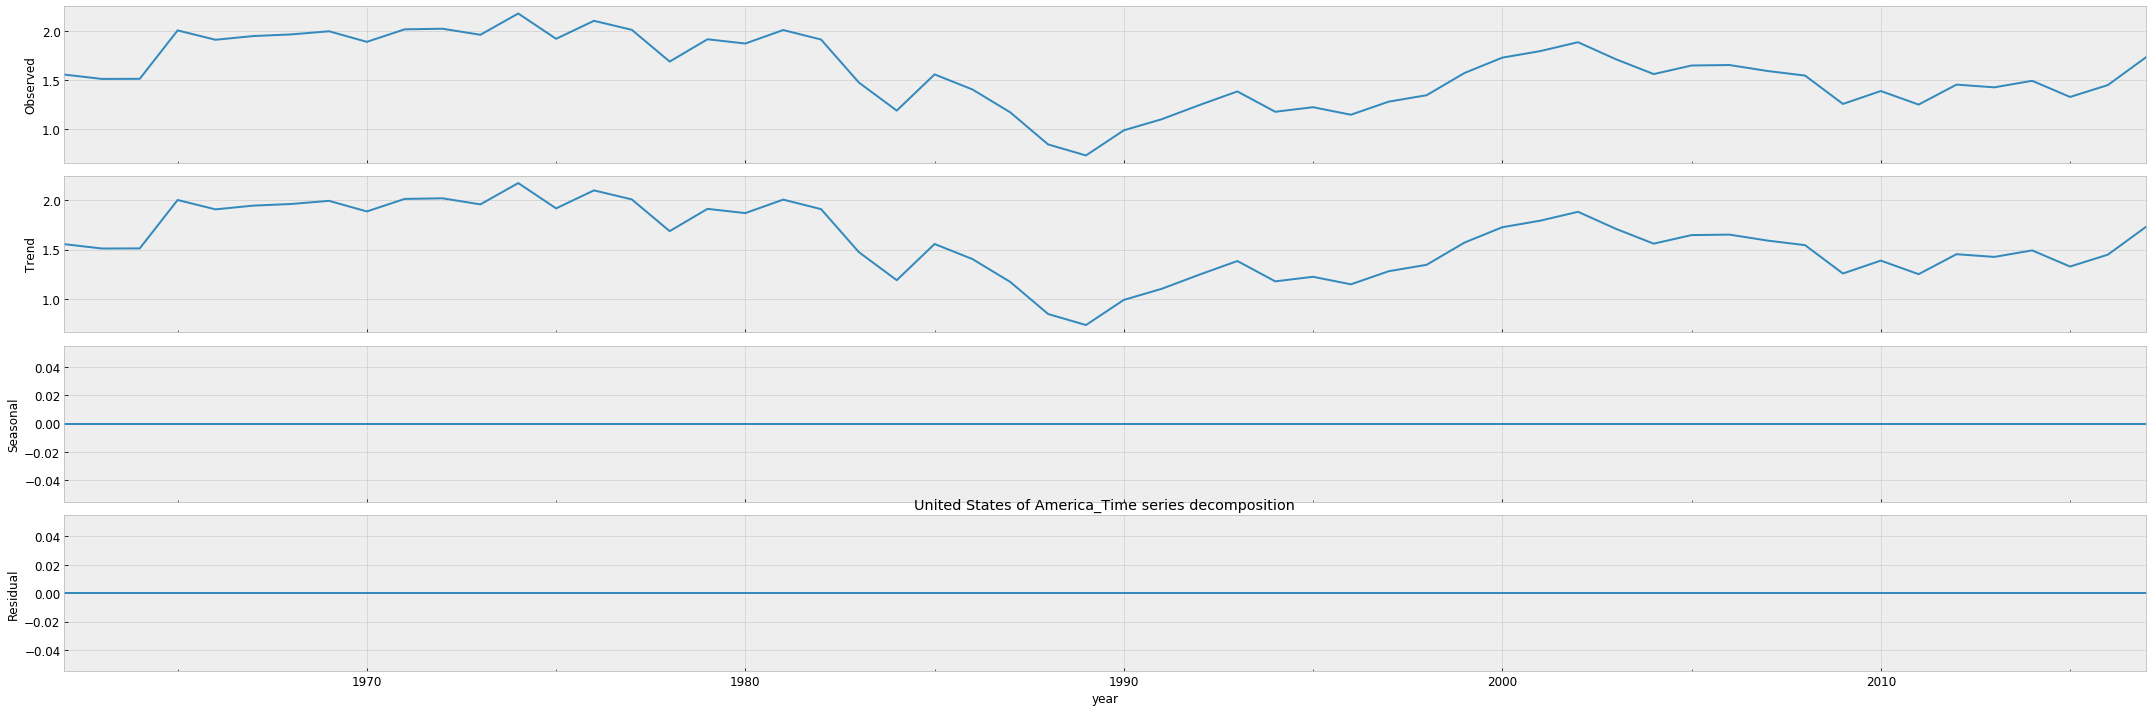

In [25]:
for exporter in exporters:
    print(exporters)
    root = save_images(avg_exp,'decomposition')+exporter
    plt.figure(figsize=(30,5)); 
    
    plt.subplot(131)
    plt.title(f'Histogram for {exporter}')
    ax = avg_exp[exporter].plot(kind='hist')
    ax1 = avg_exp[exporter].plot(kind='kde')
    plt.ylabel('Count of rca values')
    plt.xlim(1962,2016)
    plt.ylim(0,80)
    
    plt.subplot(132)
    plt.title(f'Density plot for {exporter}')
    ax2 = sns.distplot(avg_exp[exporter],hist=True,rug=True)
    plt.ylabel('Density')
    plt.ylim(0,70)
    
    plt.subplot(131)
    decomposition = sm.tsa.seasonal_decompose(avg_exp[exporter], model='additive')
    ax3 = decomposition.plot()
    plt.title(f'{avg_exp[exporter].name}_Time series decomposition',loc='center')
    rcParams['figure.figsize'] = (30, 10)
    
    plt.savefig(root)
    plt.show()

## Stationarity
- Most of the Time Series models work on the assumption that the TS is stationary. 
- Major reason for this is that there are many ways in which a series can be non-stationary, but only one way for stationarity.
- Intuitively, we can say that if a Time Series has a particular behaviour over time, there is a very high probability that it will follow the same behaviour in the future. 
- Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

__Notes from__ [Alkaline ML](https://www.alkaline-ml.com/pmdarima/tips_and_tricks.html)

- tests of stationarity for testing a null hypothesis that an observable univariate time series is stationary around a deterministic trend (i.e. trend-stationary).
- A time series is __stationary when its mean, variance and auto-correlation, etc., are constant over time__. 
- Many time-series methods may perform better when a time-series is stationary, since forecasting values becomes a far easier task for a stationary time series (high probability of behaving the same way)
- ARIMAs that include differencing (i.e., d > 0) assume that the data becomes stationary after differencing. 
- This is called __difference-stationary__
- Auto-correlation plots are an easy way to determine whether your time series is sufficiently stationary for modeling. 
- If the plot does not appear relatively stationary, your model will likely need a differencing term. 
- These can be determined by using an Augmented Dickey-Fuller test, or various other statistical testing methods. 
- Note that auto_arima will automatically determine the appropriate differencing term for you by default.

In order to quantitatively determine whether we need to difference our data in order to make it stationary, we can conduct a test of stationarity

__We can check stationarity using the following:__

1. __ACF and PACF plots__:
    - If the time series is stationary, the ACF/PACF plots will show a __quick drop-off in correlation__ after a small amount of lag between points.
2. __Plotting Rolling Statistics__: 
    - We can plot the moving average or moving variance and see if it varies with time. 
    - __Moving average/variance__ is for any instant ‘t’, the average/variance of the last period (e.g year or last 12 months)
3. __Augmented Dickey-Fuller Test [*]:__
    - This is one of the statistical tests for checking stationarity.
    - Here the __null hypothesis is that the TS is non-stationary__.
     - The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. 
     - If the pvalue is above a critical size, then we cannot reject that there is a unit root.
     - The p-values are obtained through regression surface approximation from MacKinnon 1994, but using the updated 2010 tables
     - If the p-value is close to significant, then the critical values should be used to judge whether to reject the null.
     - The autolag option and maxlag for it are described in Greene
    - The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. 
    - If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. 
    
**References**:

   1. W. Green.  "Econometric Analysis," 5th ed., Pearson, 2003.
    
   2. Hamilton, J.D.  "Time Series Analysis".  Princeton, 1994.
    
   3. MacKinnon, J.G. 1994.  "Approximate asymptotic distribution functions for
    unit-root and cointegration tests.  `Journal of Business and Economic Statistics` 12, 167-76.
    
   4. MacKinnon, J.G. 2010. "Critical Values for Cointegration Tests."  Queen's University, Dept of Economics, Working Papers.  Available at http://ideas.repec.org/p/qed/wpaper/1227.html

### Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots

- If the time series is stationary, the ACF/PACF plots will show a __quick drop-off in correlation__ after a small amount of lag between points.
- Most of this data is stationary as a high number of previous observations are not correlated with future values.
- Confidence intervals are drawn as a cone. 
- By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this cone are very likely a correlation and not a statistical fluke.
- The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/acf_pacf/


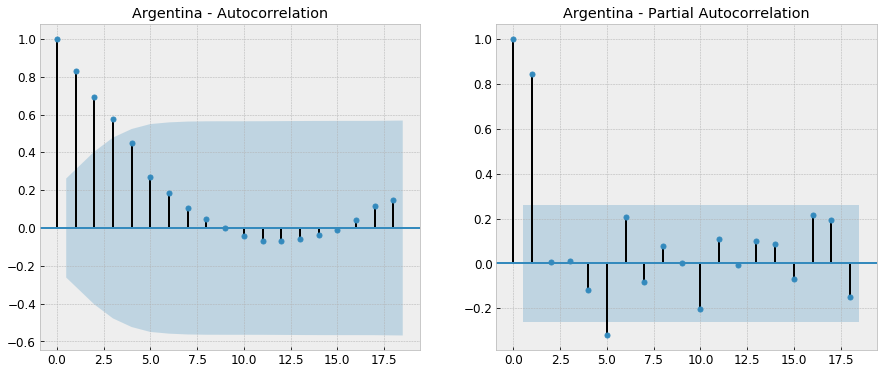

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/acf_pacf/


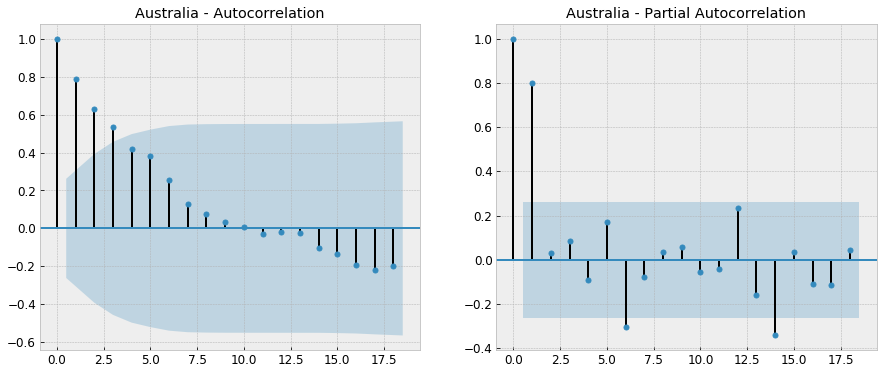

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/acf_pacf/


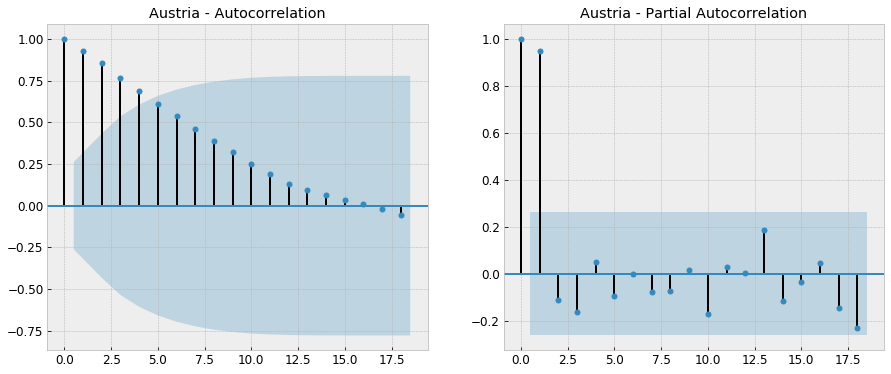

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/acf_pacf/


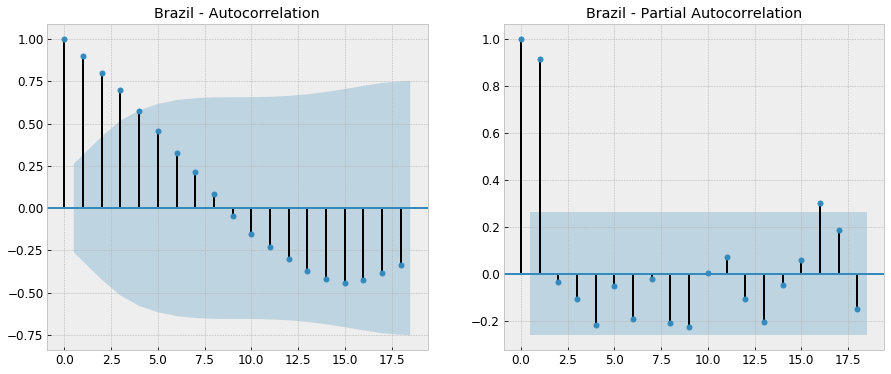

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/acf_pacf/


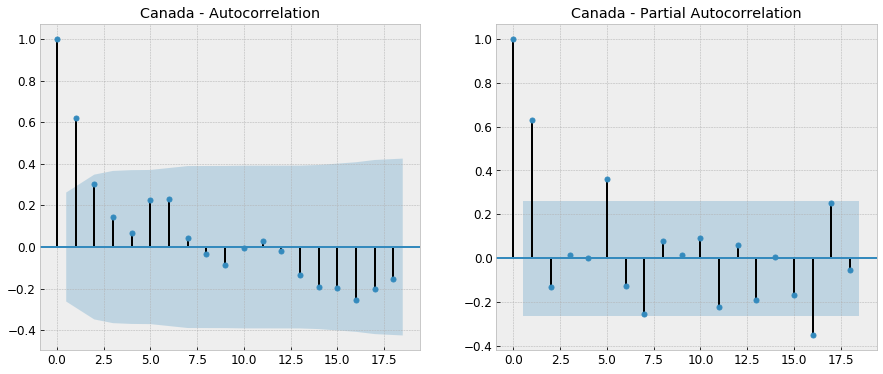

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/acf_pacf/


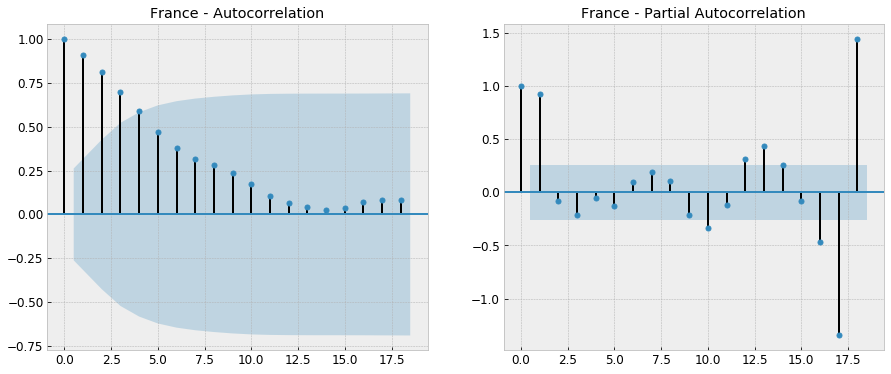

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/acf_pacf/


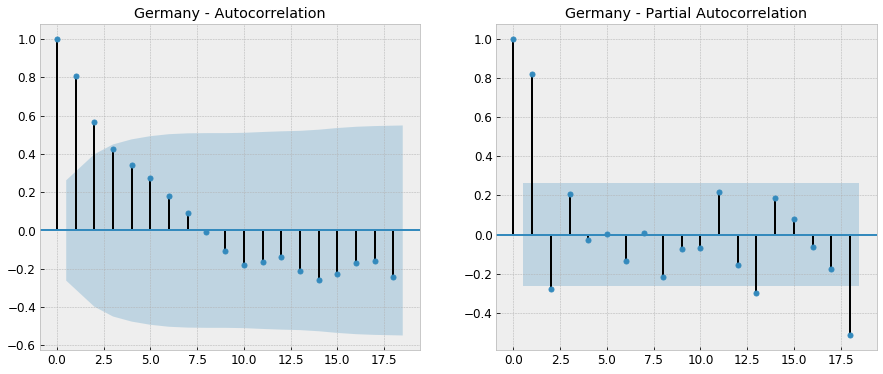

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/acf_pacf/


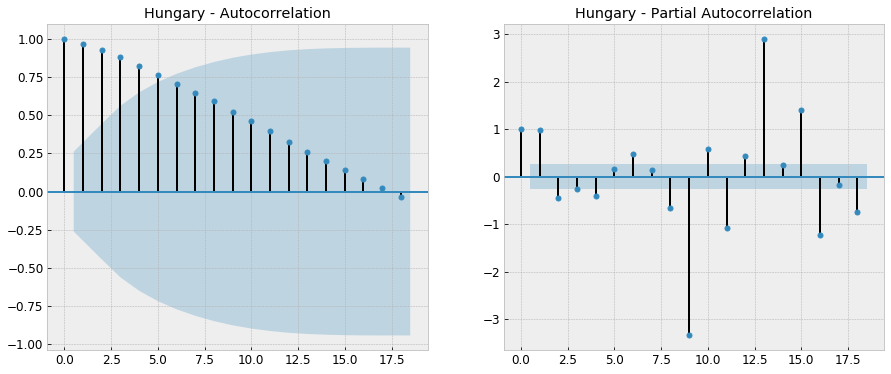

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/acf_pacf/


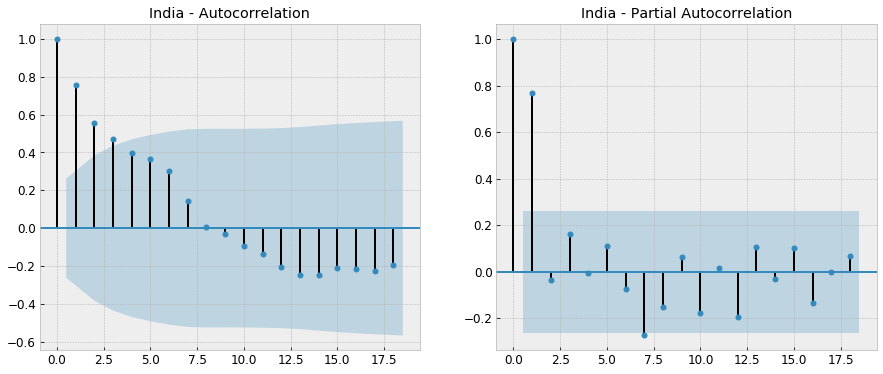

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/acf_pacf/


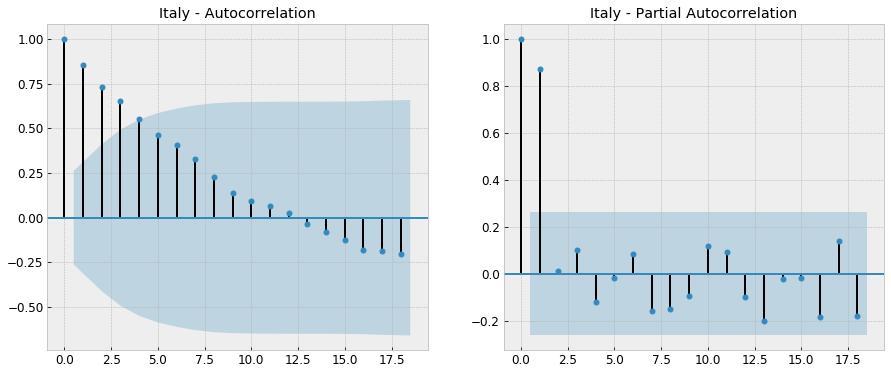

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/acf_pacf/


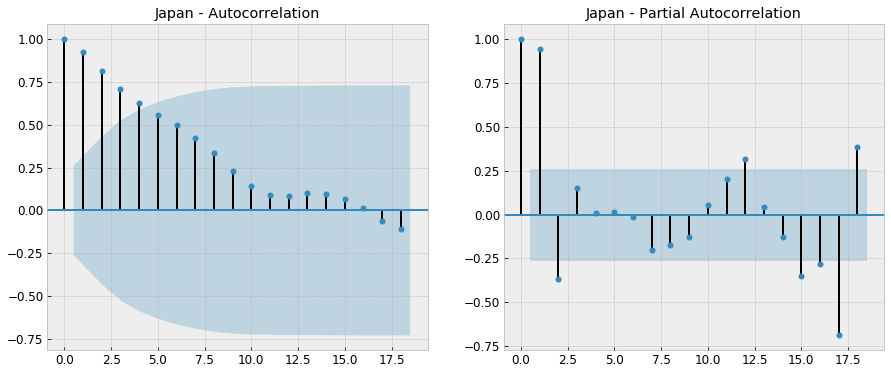

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/acf_pacf/


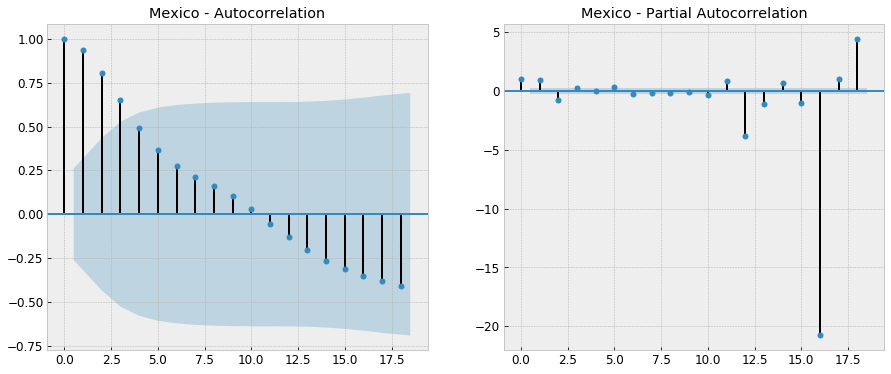

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/acf_pacf/


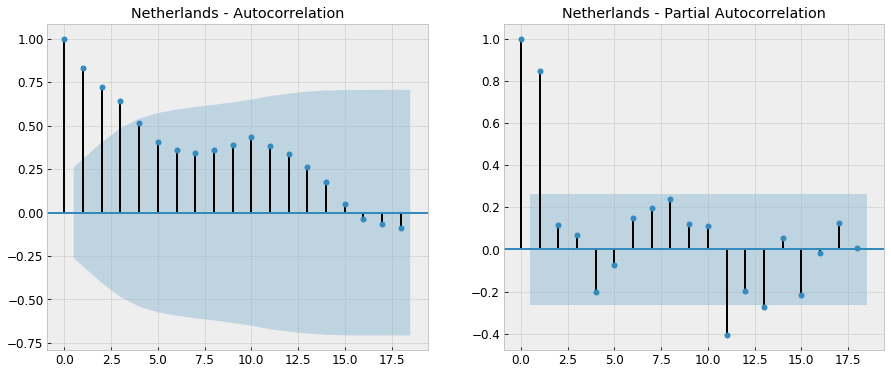

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/acf_pacf/


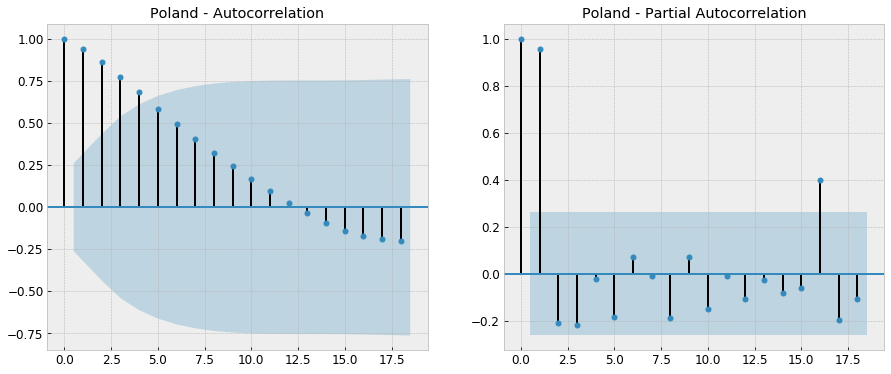

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/acf_pacf/


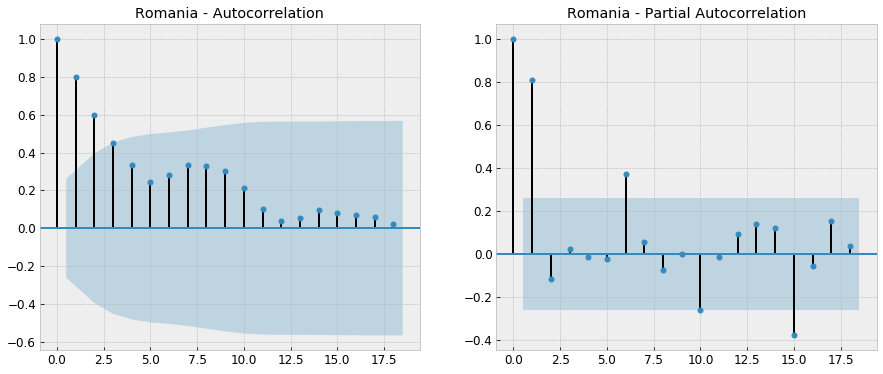

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/acf_pacf/


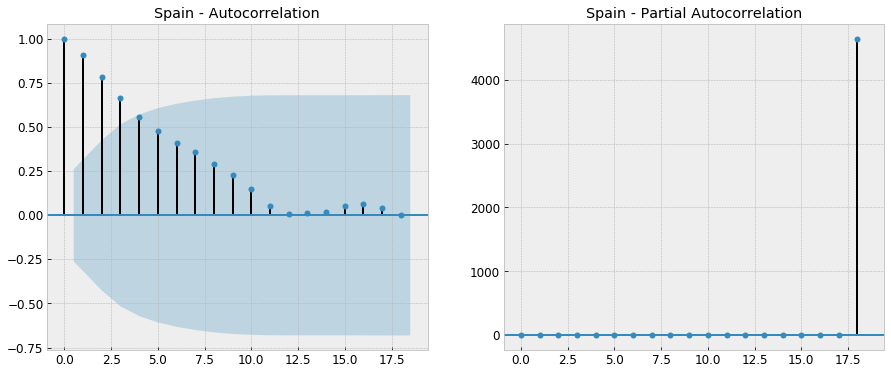

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/acf_pacf/


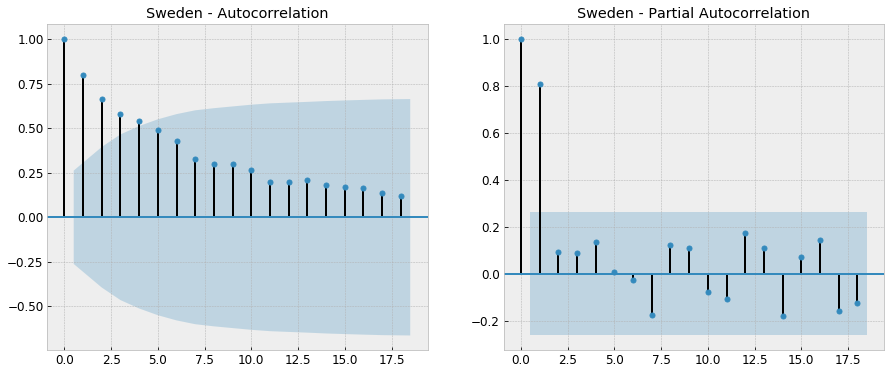

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/acf_pacf/


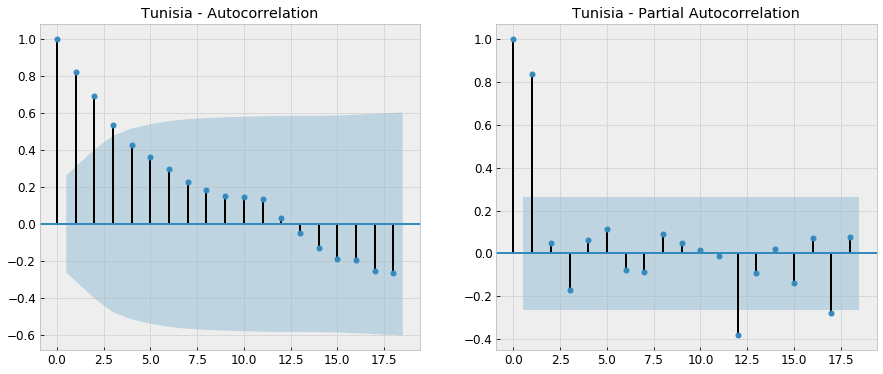

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/acf_pacf/


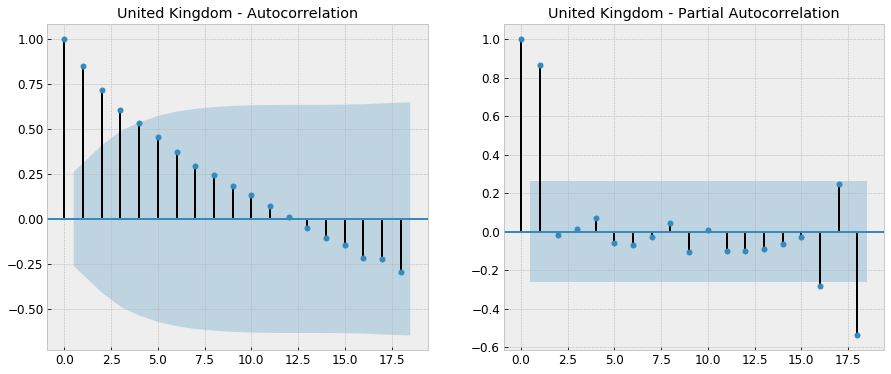

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/acf_pacf/


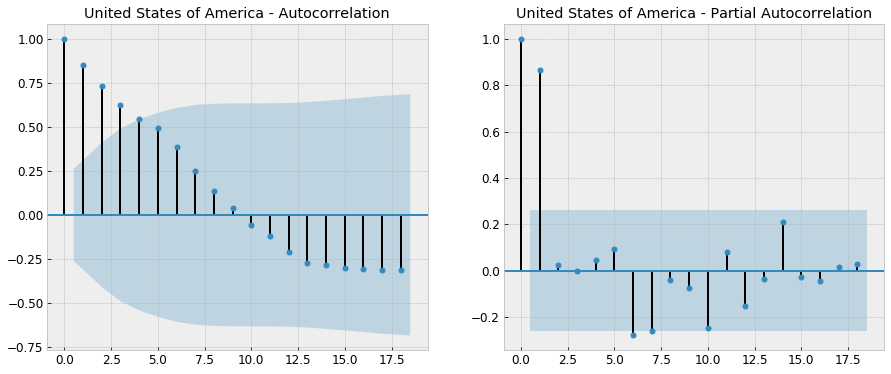

In [26]:
for exporter in exporters:
    savefile = save_images(avg_exp,'acf_pacf')
    
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    plot_acf(avg_exp[exporter], ax=plt.gca(),title=f"{avg_exp[exporter].name} - Autocorrelation")
    
    plt.subplot(122); 
    plot_pacf(avg_exp[exporter], ax=plt.gca(),title=f"{avg_exp[exporter].name} - Partial Autocorrelation")
    
    plt.savefig(f'{savefile}_ACF_PACF')
    plt.show()

<div class="alert alert-block alert-info">
    
# TODO
## Interpreting ACF plots


ACF Shape	| Indicated Model | Countries fitting description
-- | -- |--
Exponential, decaying to zero |	Autoregressive model. Use the partial autocorrelation plot to identify the order of the autoregressive model |
Alternating positive and negative, decaying to zero	Autoregressive model. |  Use the partial autocorrelation plot to help identify the order. |
One or more spikes, rest are essentially zero | Moving average model, order identified by where plot becomes zero. |
Decay, starting after a few lags |	Mixed autoregressive and moving average (ARMA) model. | 
All zero or close to zero | Data are essentially random. |
High values at fixed intervals | Include seasonal autoregressive term. |
No decay to zero |	Series is not stationary |

### Plotting Rolling Statistics
- The rolling mean and standard deviation are not constant with respect to time (increasing trend)
- The time series is hence not stationary

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/rolling_stats/


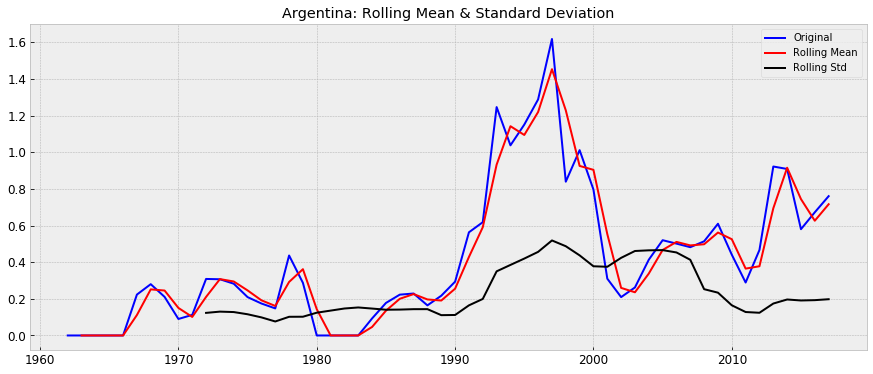

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/rolling_stats/


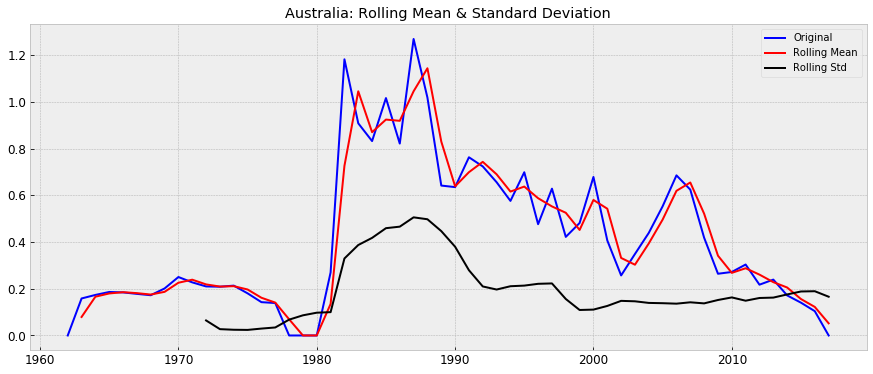

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/rolling_stats/


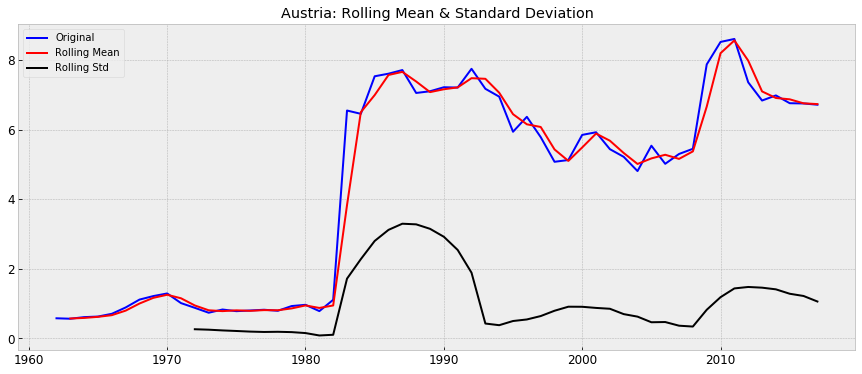

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/rolling_stats/


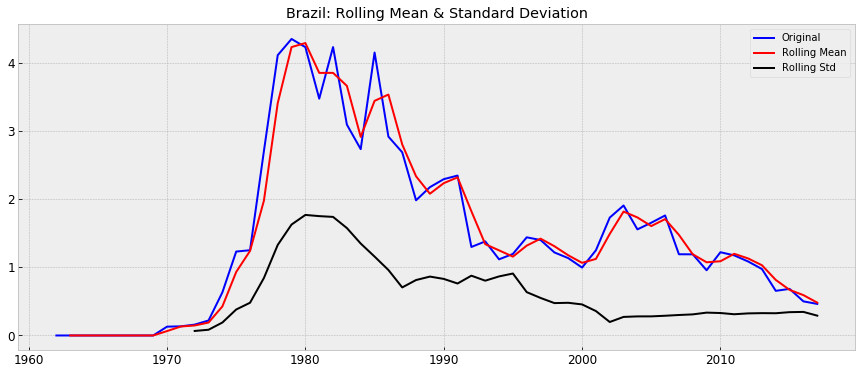

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/rolling_stats/


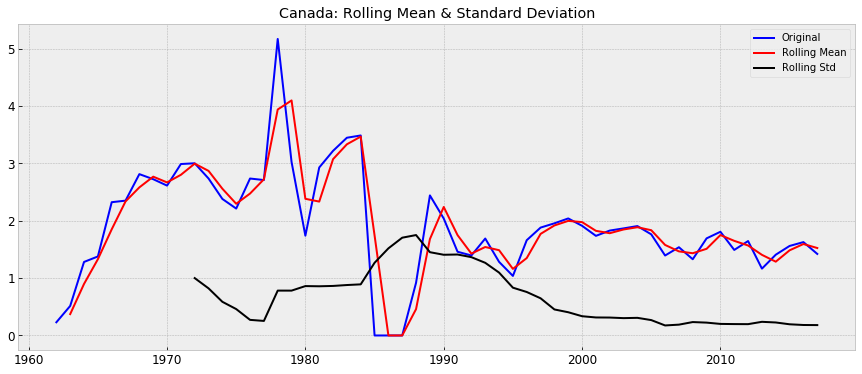

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/rolling_stats/


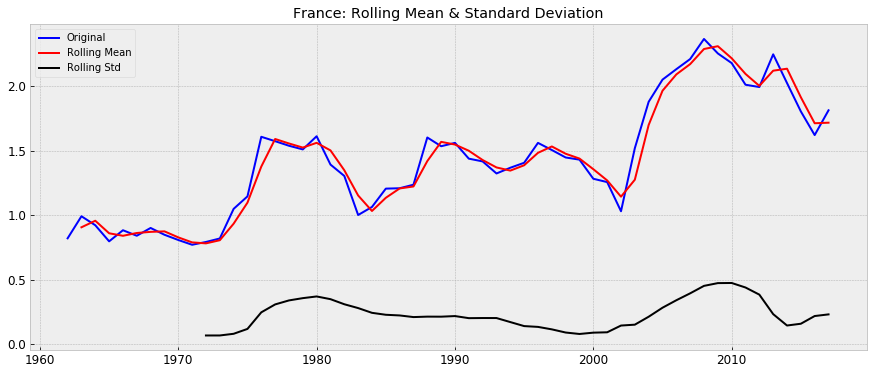

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/rolling_stats/


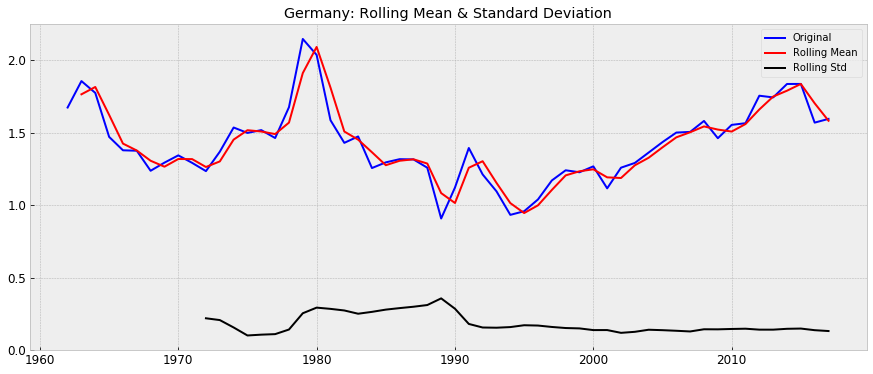

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/rolling_stats/


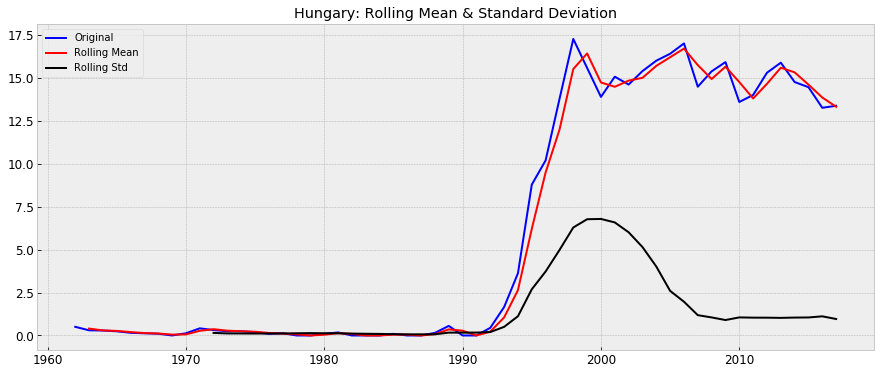

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/rolling_stats/


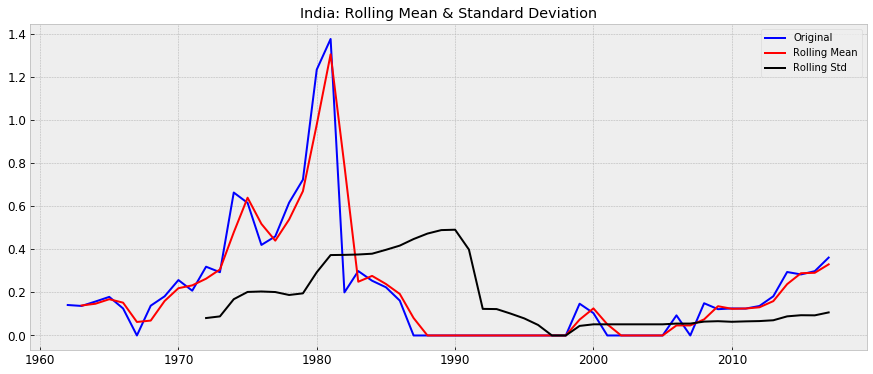

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/rolling_stats/


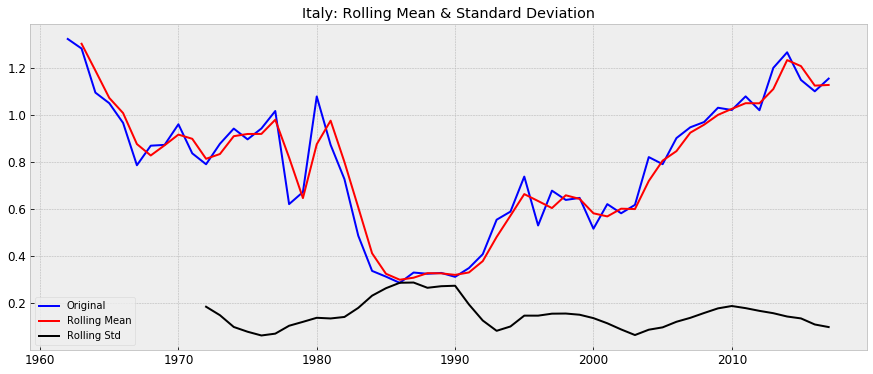

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/rolling_stats/


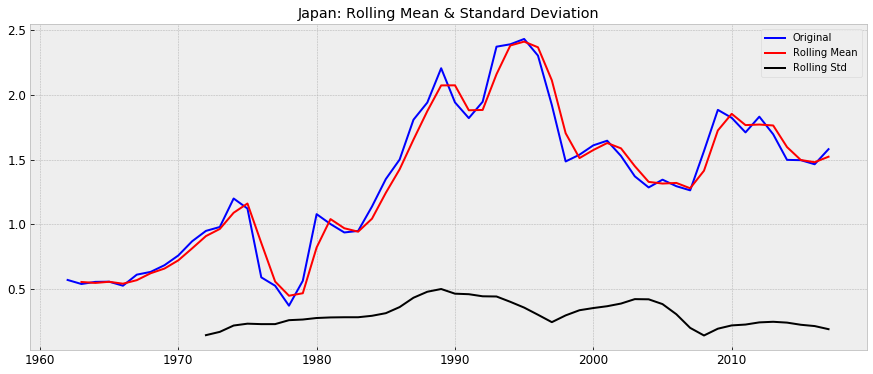

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/rolling_stats/


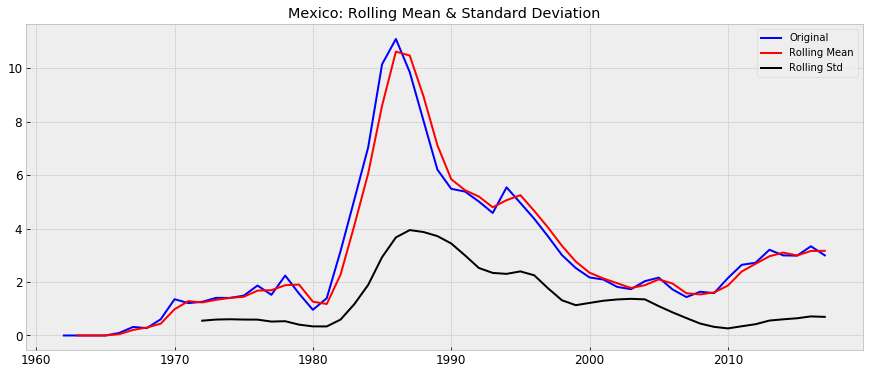

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/rolling_stats/


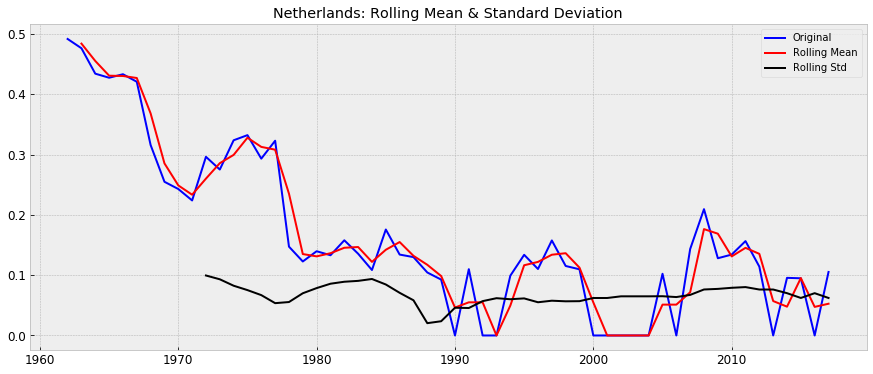

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/rolling_stats/


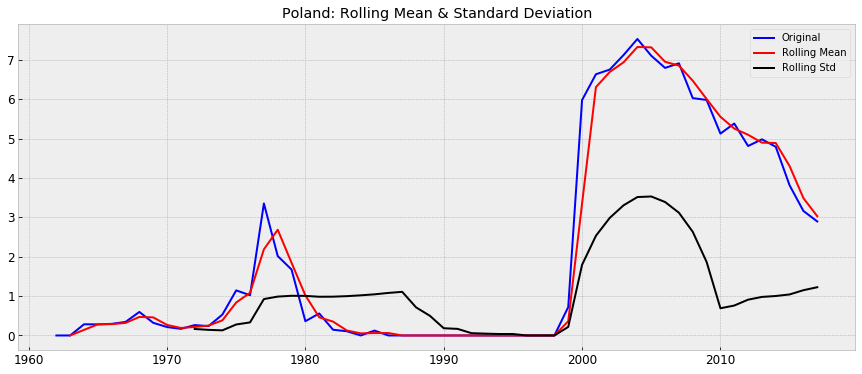

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/rolling_stats/


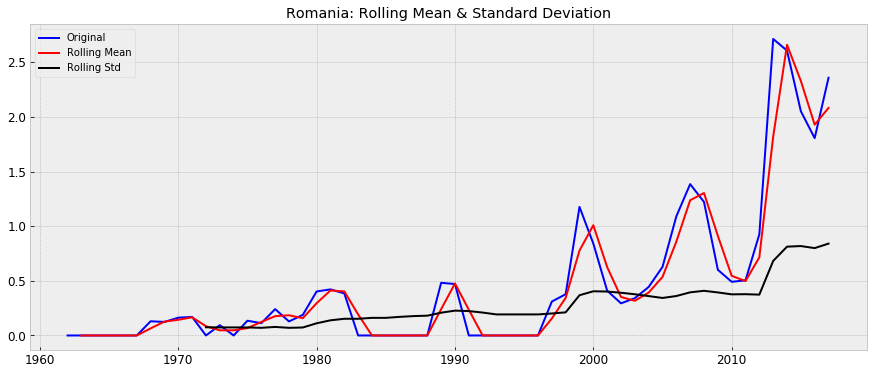

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/rolling_stats/


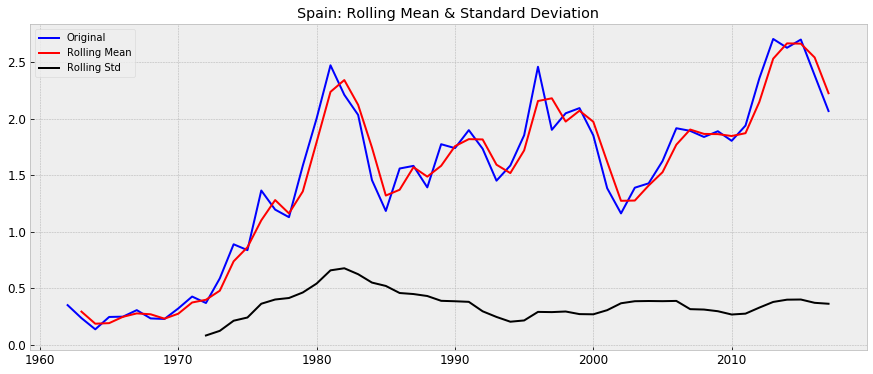

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/rolling_stats/


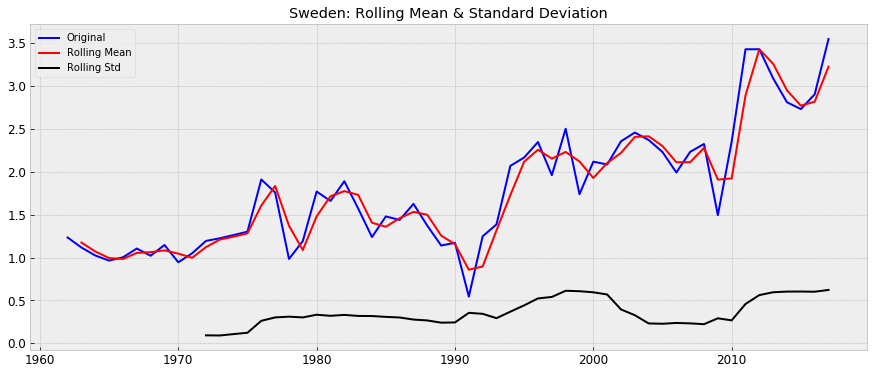

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/rolling_stats/


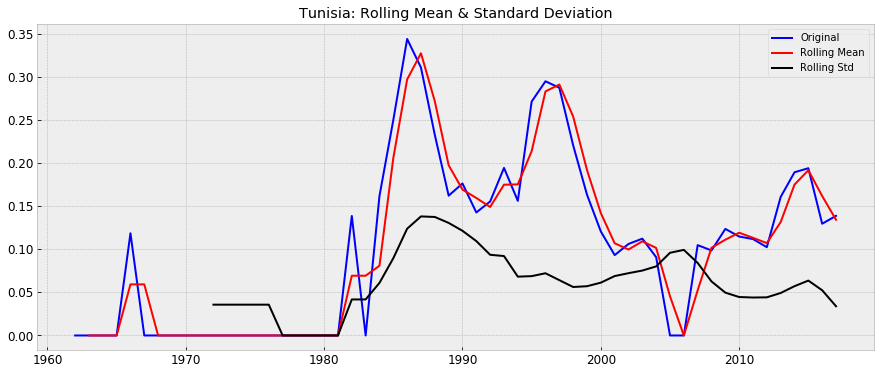

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/rolling_stats/


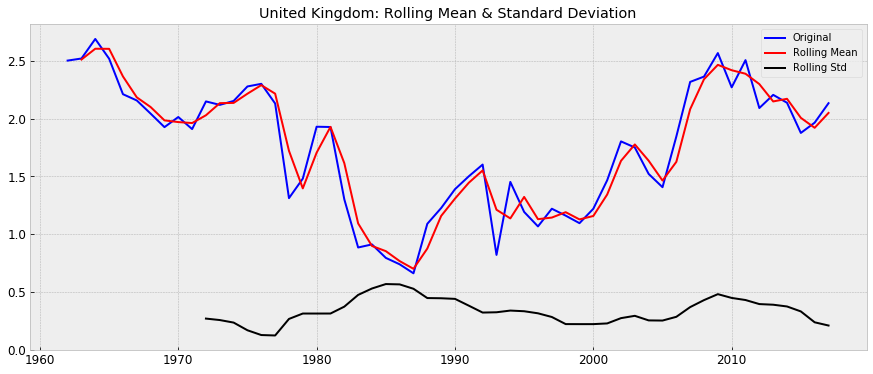

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/rolling_stats/


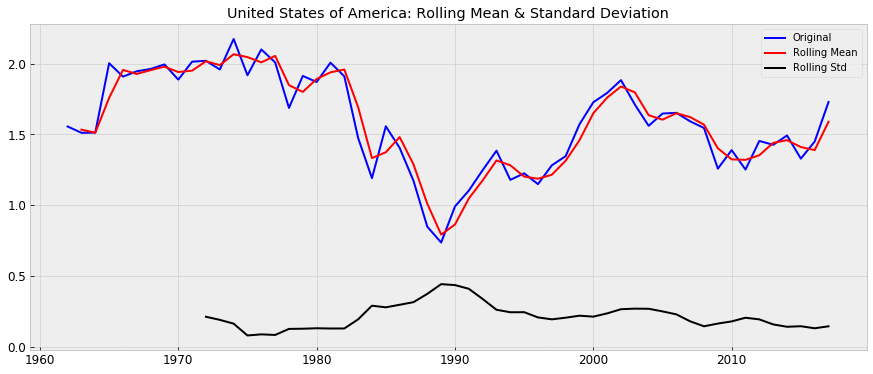

In [27]:
for exporter in exporters:
    savefile = save_images(avg_exp,'rolling_stats')
    cycles = int((len(avg_exp[exporter]))/5)
    plt.figure(figsize=(15,6))

    rolmean = avg_exp[exporter].rolling(2).mean()
    rolstd = avg_exp[exporter].rolling(cycles).std()
        
    #Plot rolling statistics:
    orig = plt.plot(avg_exp[exporter], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('{}: Rolling Mean & Standard Deviation'.format(avg_exp[exporter].name))
    plt.savefig(str('{}_Rolling_Stats'.format(savefile)))
    plt.show(block=False)

### Augmented Dickey-Fuller  (ADF) Test
- The intuition behind the test is that if the series is integrated then the lagged level of the series y(t-1)  will provide no relevant information in predicting the change in y(t).

**Null hypothesis (Ho)**: The time series is not stationary, it presents heterocedasticity. In other words, the time series depends on itself (i.e.: yt depends on yt-1, yt-1 depends on yt-2
- Rejecting the null hypothesis (i.e. a very low p-value) will indicate stationarity. Put simply, the t-test result is less than all critical values (1%,5%,10%)

**Alternative hypothesis(Ha)**: the series is stationary

__Reference__
[ADF results description](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html#statsmodels.tsa.stattools.adfuller)

In [28]:
from statsmodels.tsa.stattools import adfuller, kpss

In [29]:
def ADF_Stationarity_Test(ts_groups):
    
    #countries = list(ts_groups.columns)
    adf_results = {}
    col_names=['Test Statistic','p_value','Lags used','Observations Used','1% Critical value','5% Critical value','10% Critical value','IC_Best']
    data = pd.DataFrame(columns=col_names,index=exporters)

    for exporter in exporters:
        #Dickey-Fuller test
        adf_results[exporter] = tsa.adfuller(ts_groups[exporter],autolag='AIC')
        
    for exporter in adf_results:
        data.loc[exporter] = pd.Series({'Test Statistic':adf_results[exporter][0],
                                       'p_value':adf_results[exporter][1],
                                       'Lags used':adf_results[exporter][2],
                                       'Observations Used':adf_results[exporter][3],
                                       '1% Critical value': adf_results[exporter][4]['1%'],
                                       '5% Critical value': adf_results[exporter][4]['5%'],
                                       '10% Critical value': adf_results[exporter][4]['10%'],
                                       'IC_Best': adf_results[exporter][5]
                                      })
    return data.transpose()
    

In [30]:
adf_test = ADF_Stationarity_Test(avg_exp)
adf_countries = adf_test.columns

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/adf_test/


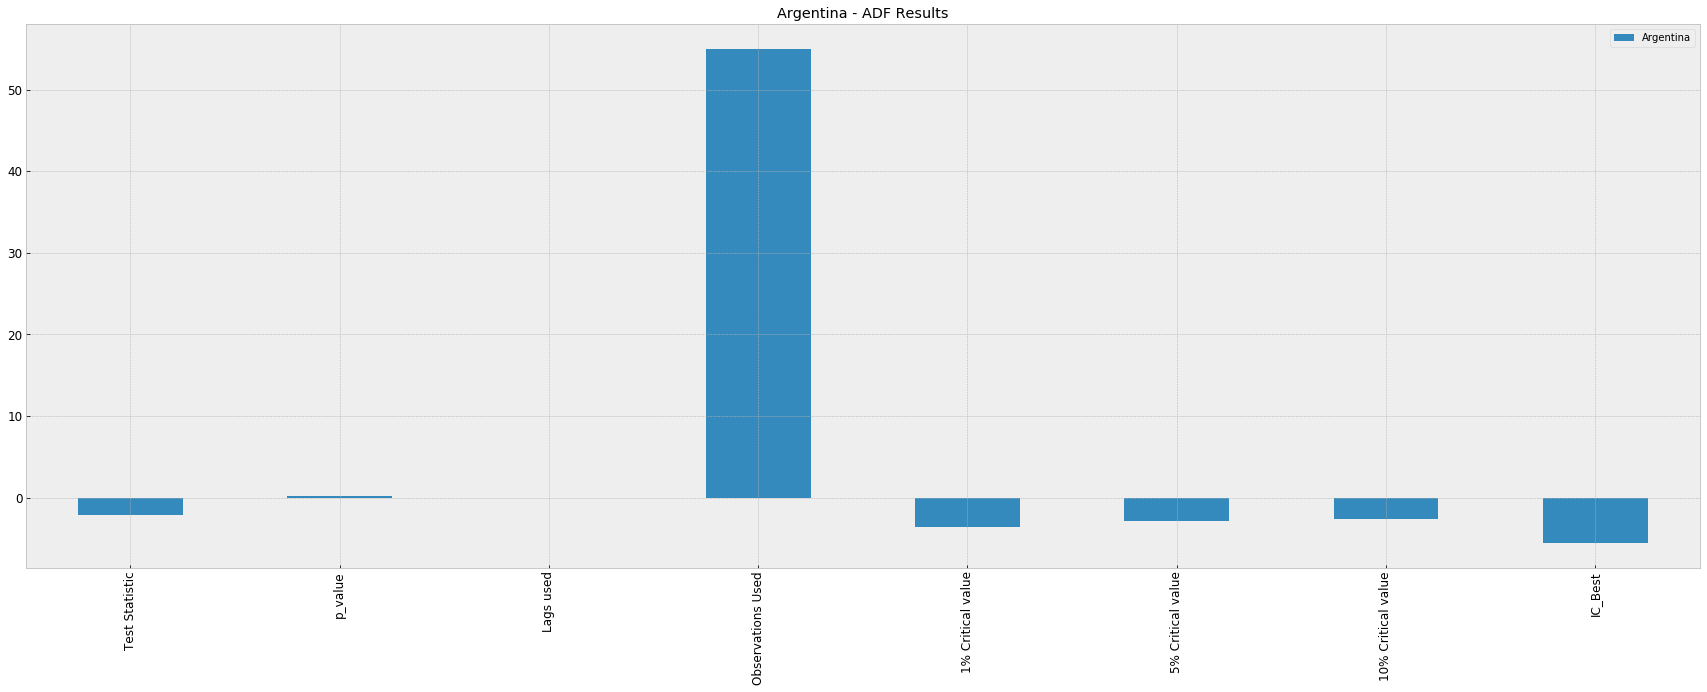

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/adf_test/


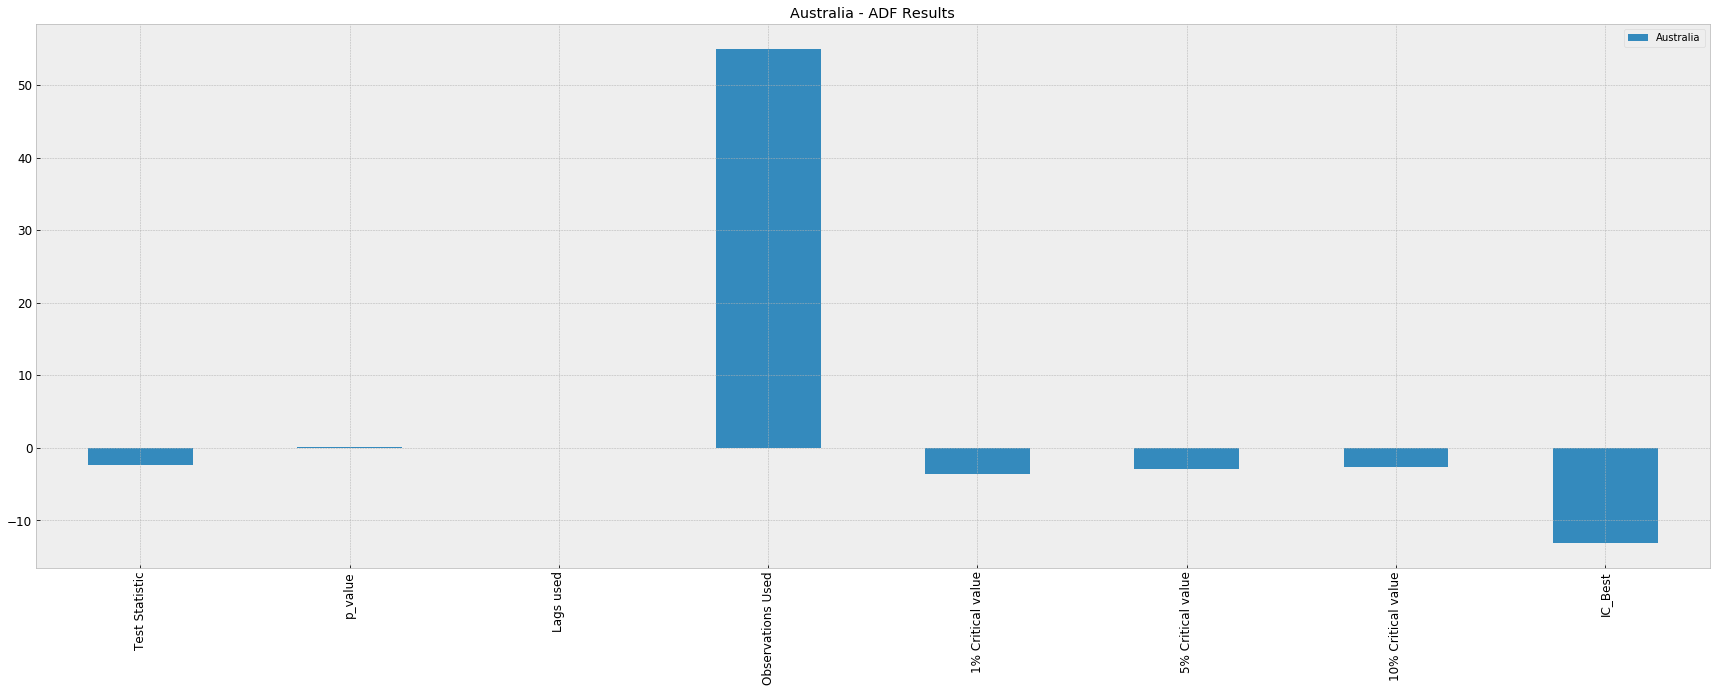

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/adf_test/


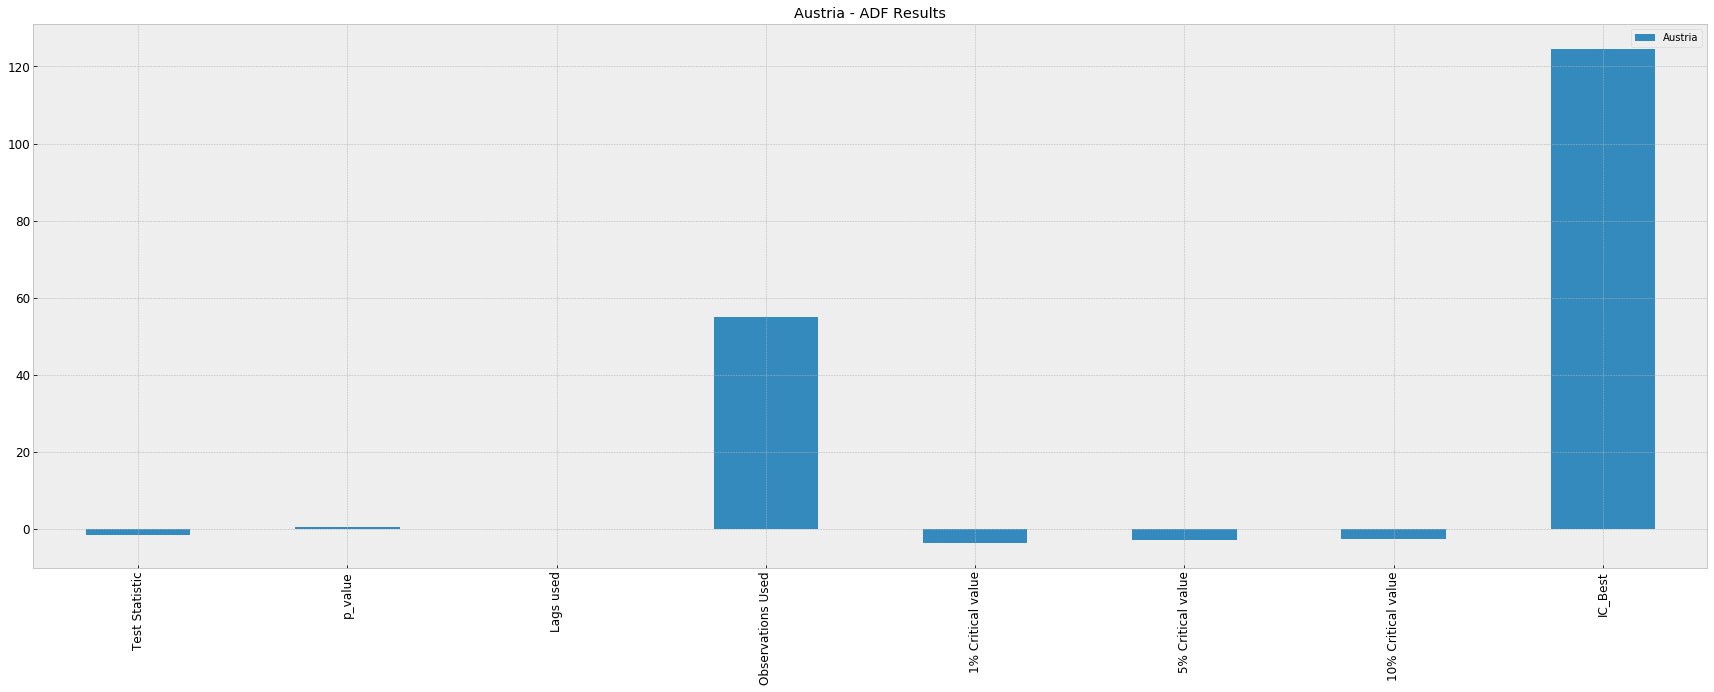

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/adf_test/


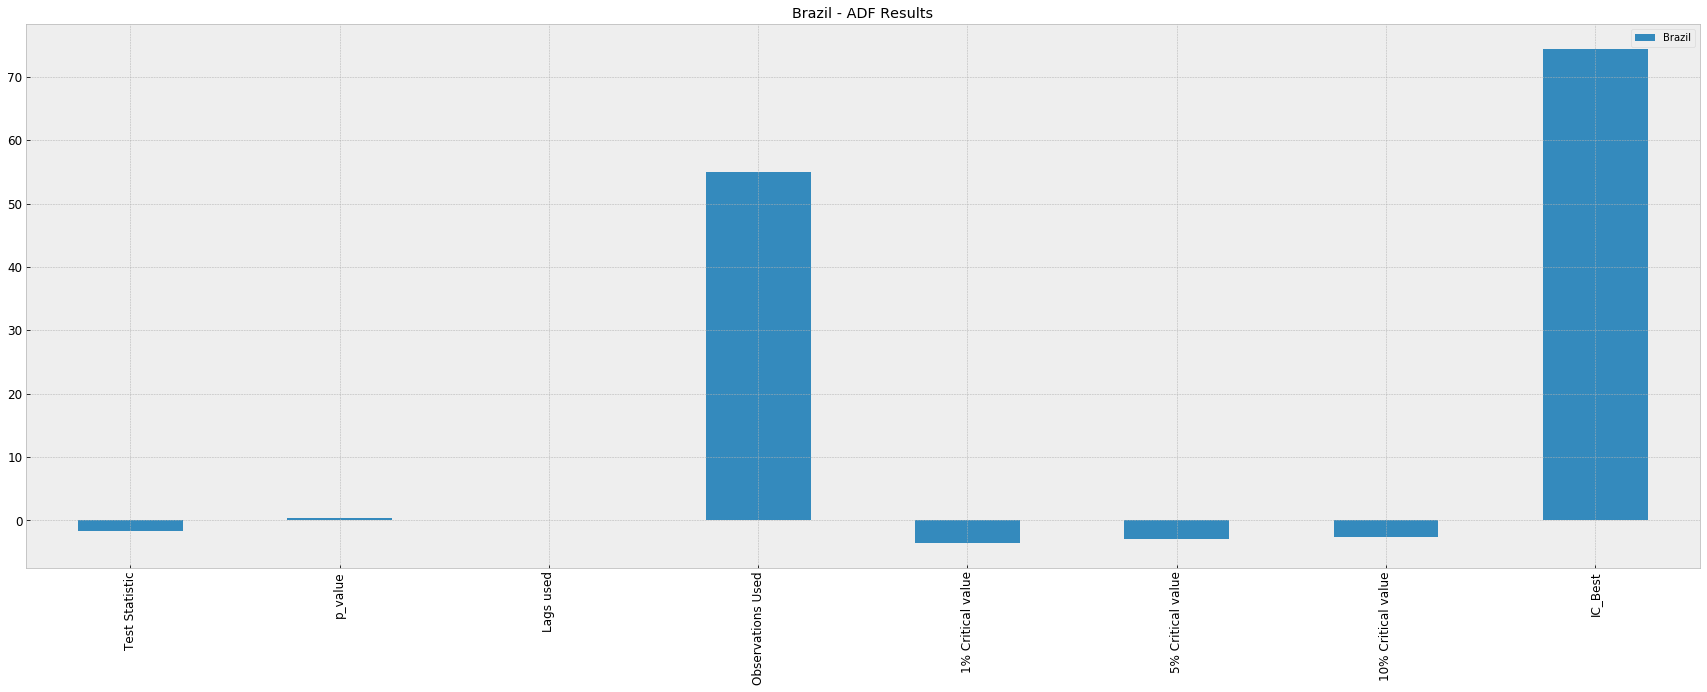

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/adf_test/


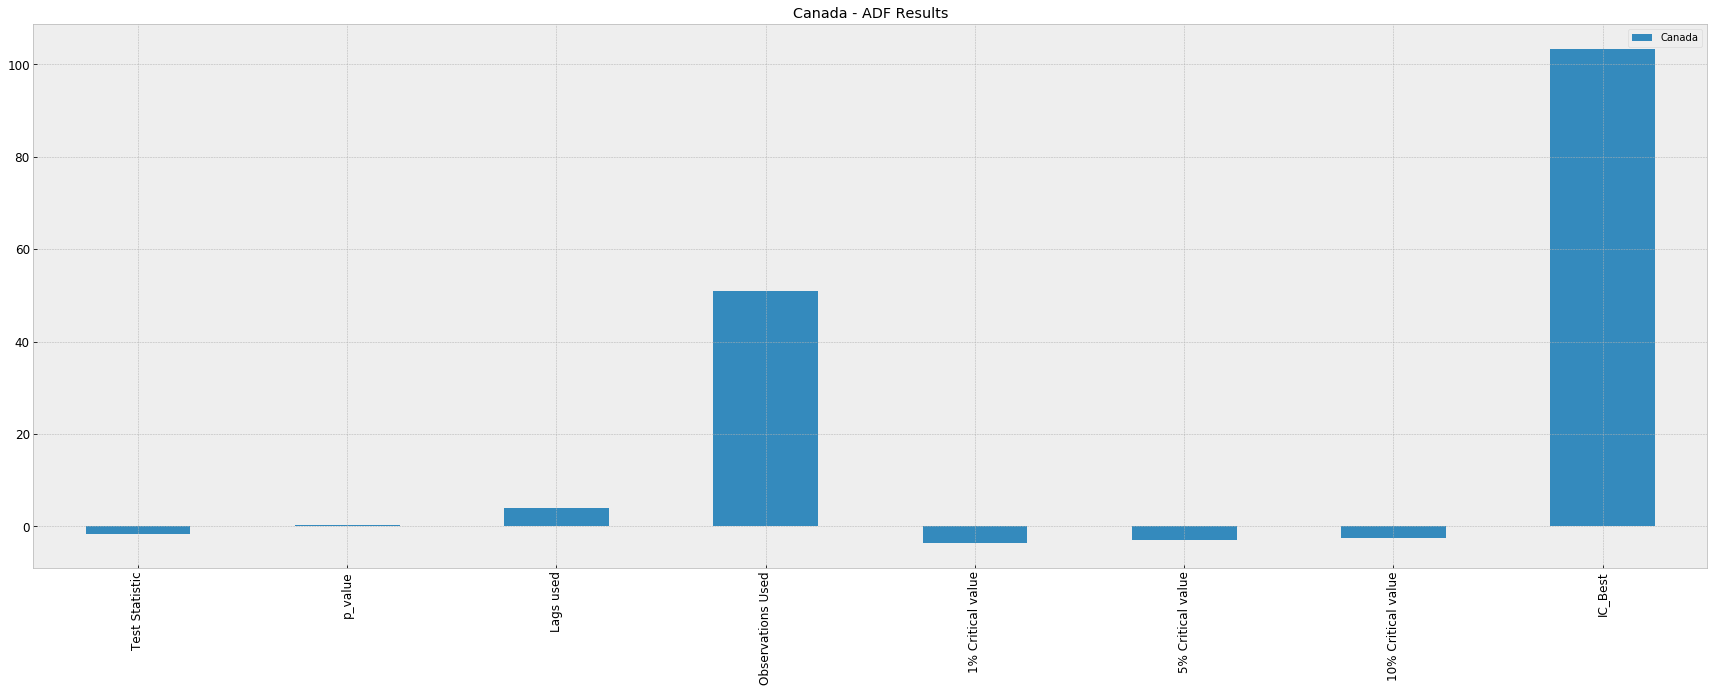

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/adf_test/


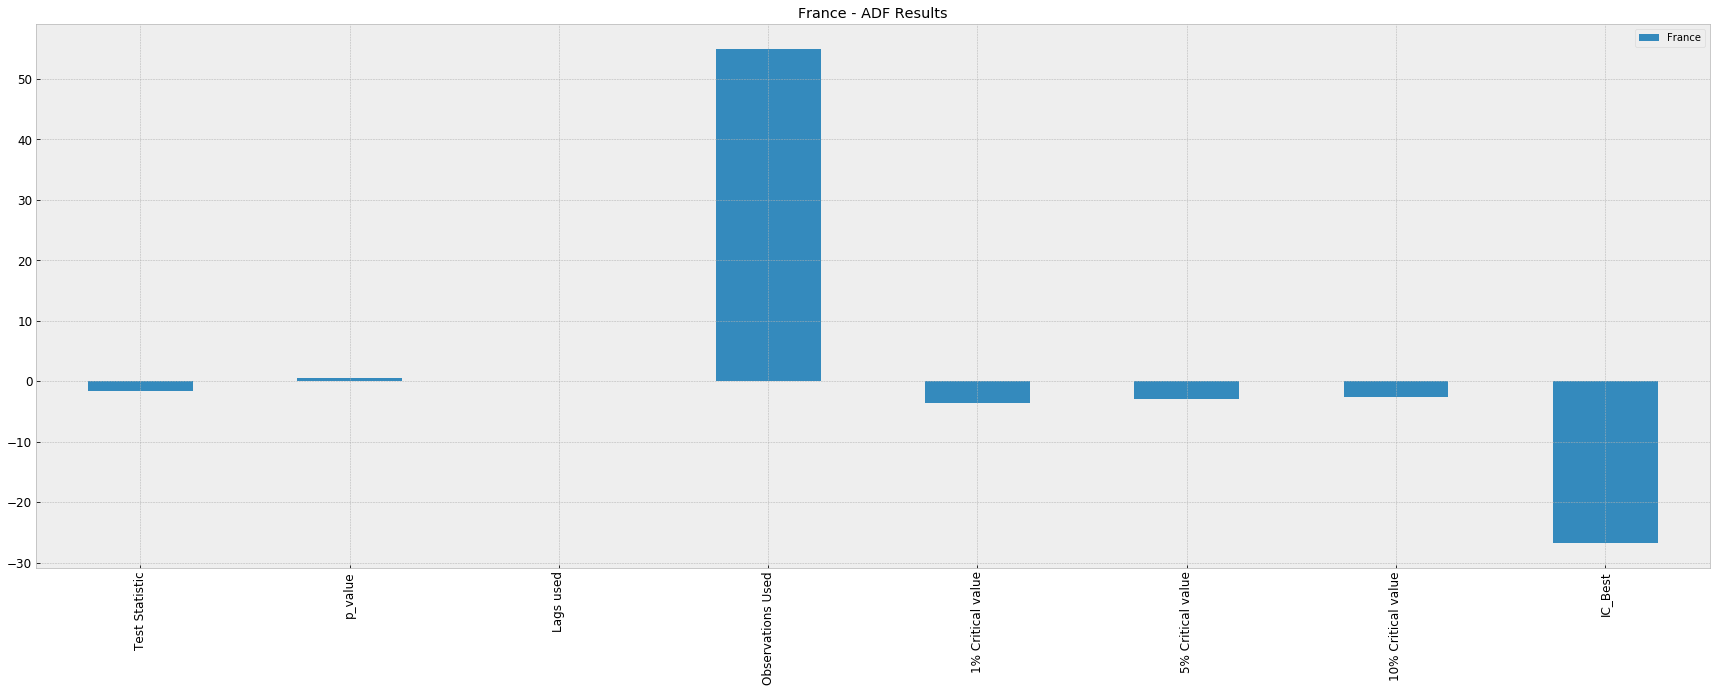

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/adf_test/


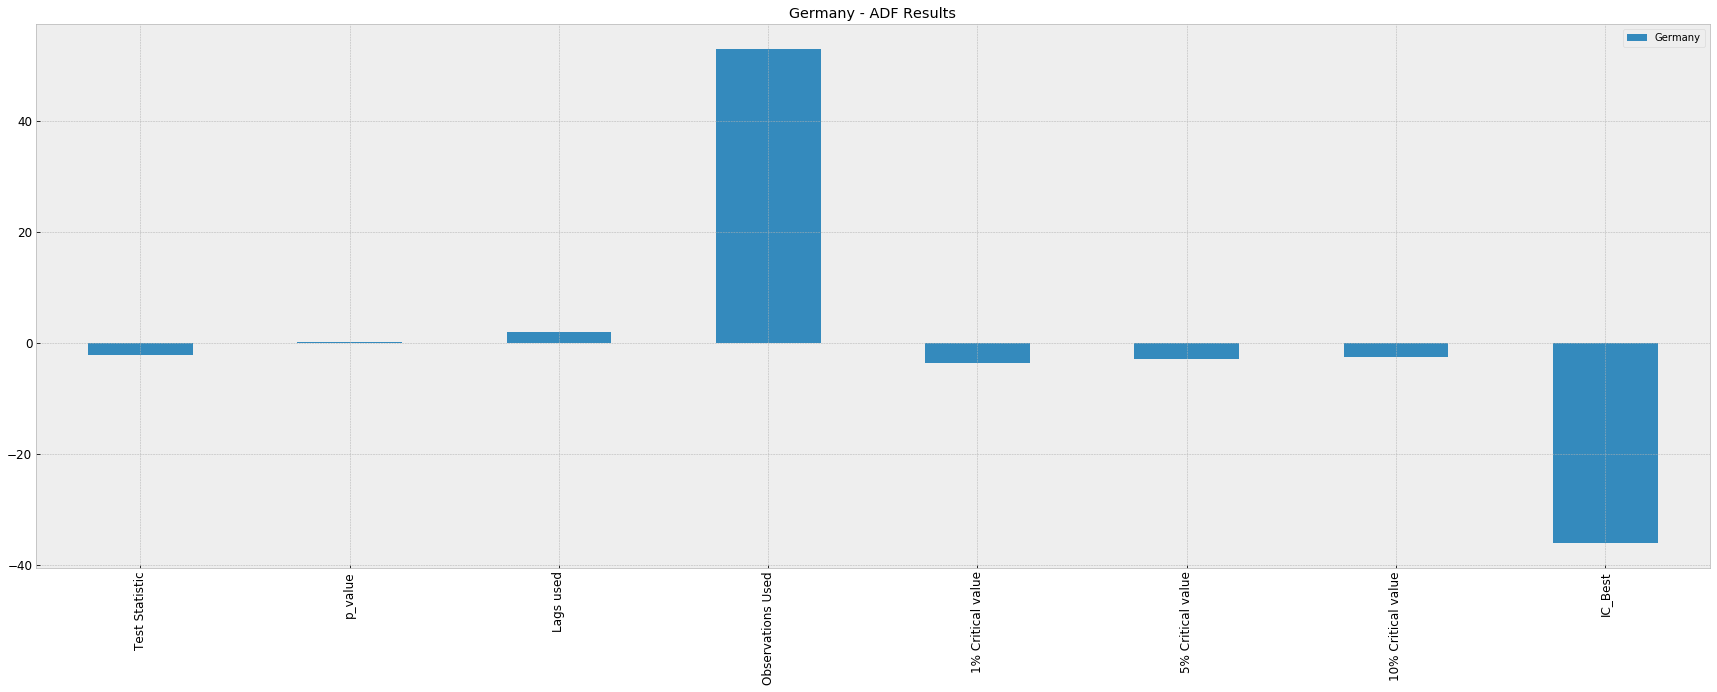

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/adf_test/


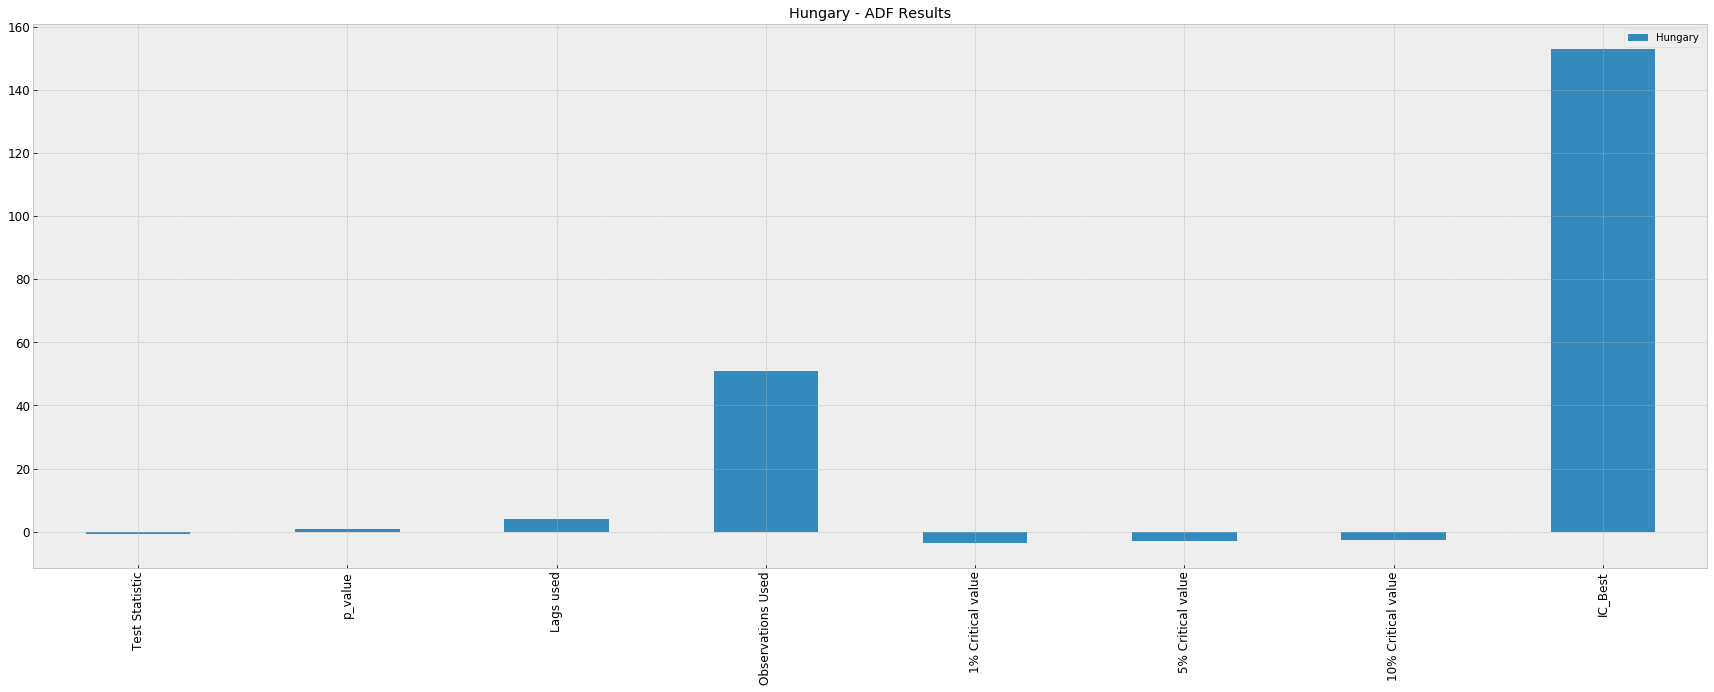

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/adf_test/


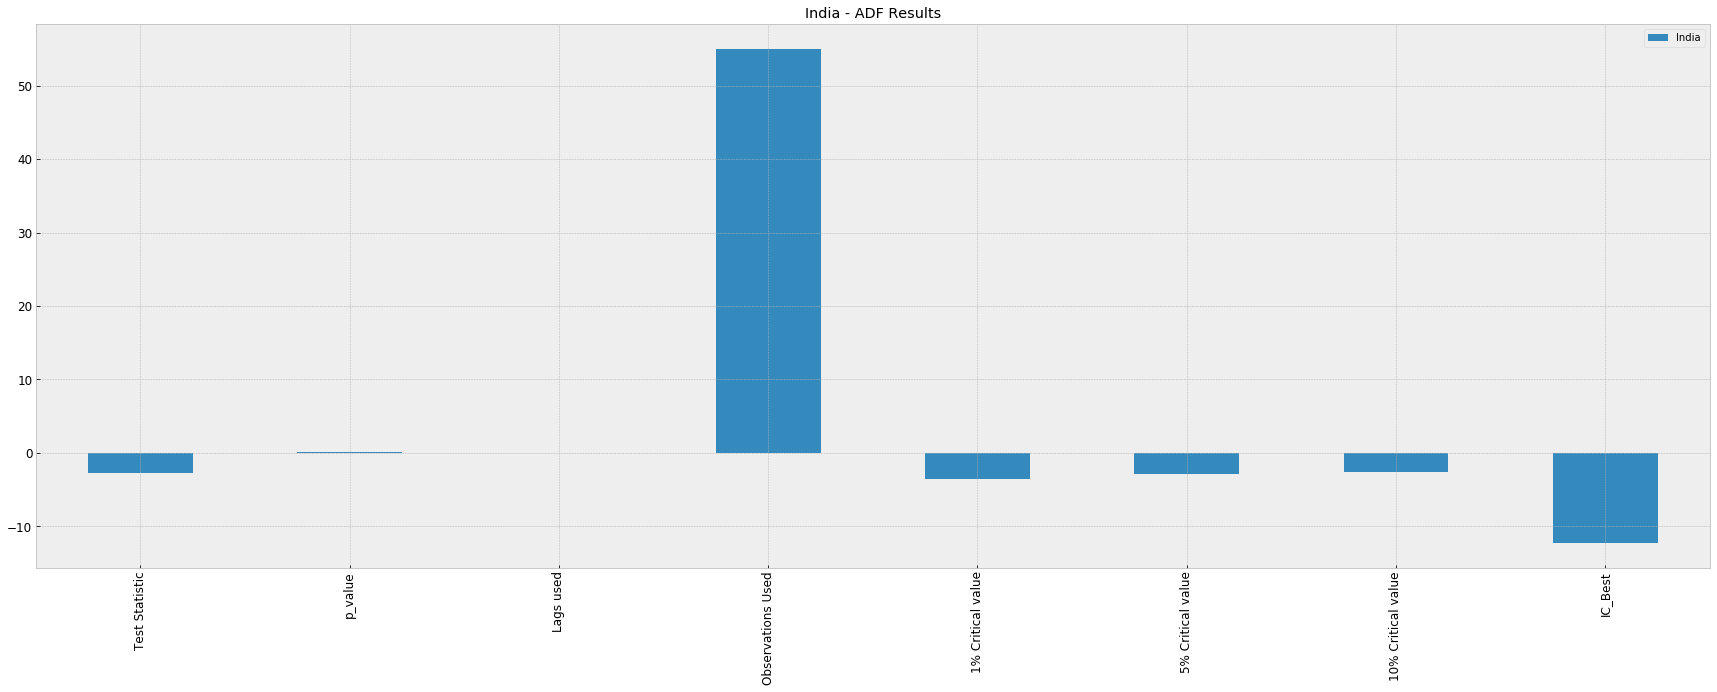

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/adf_test/


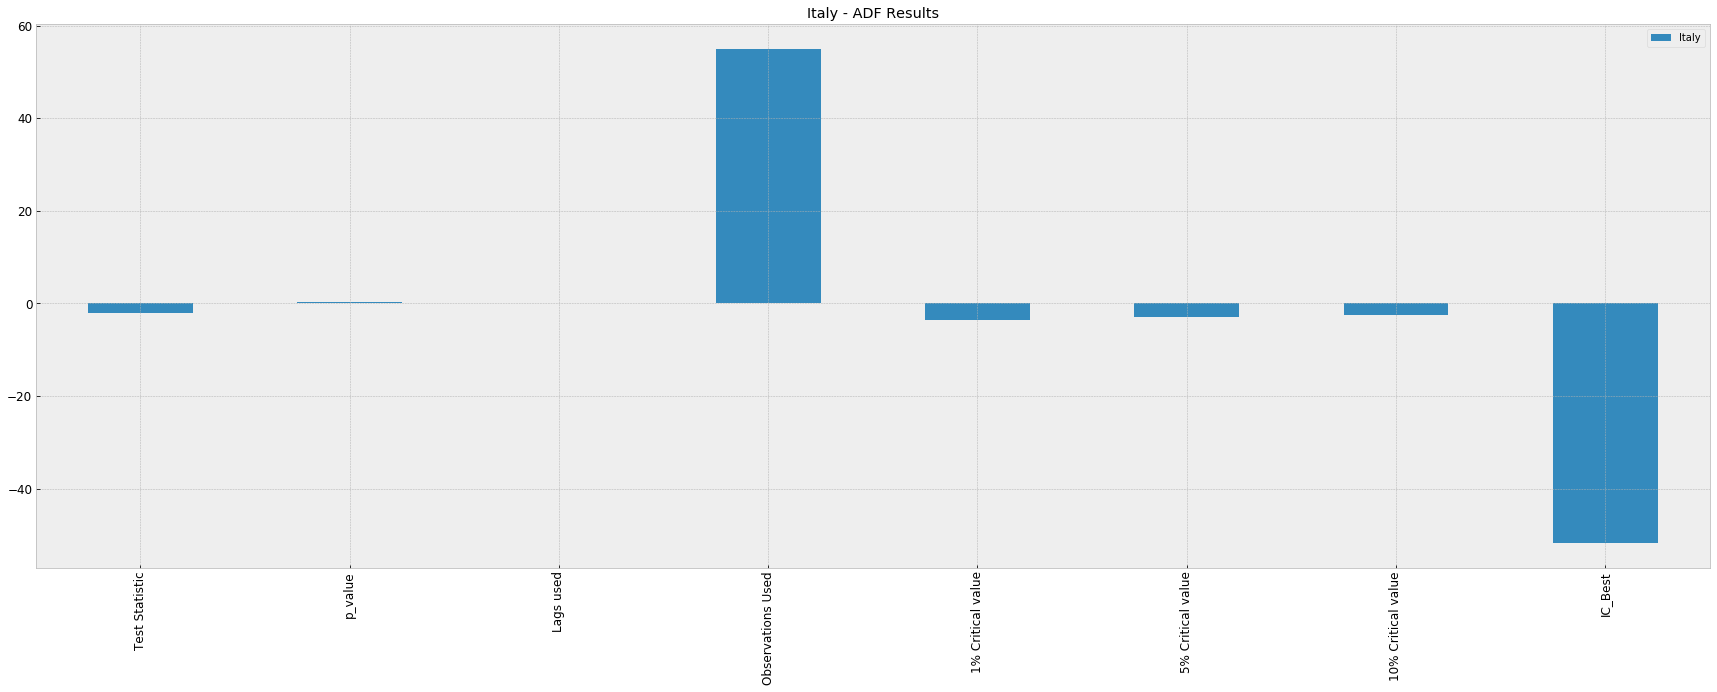

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/adf_test/


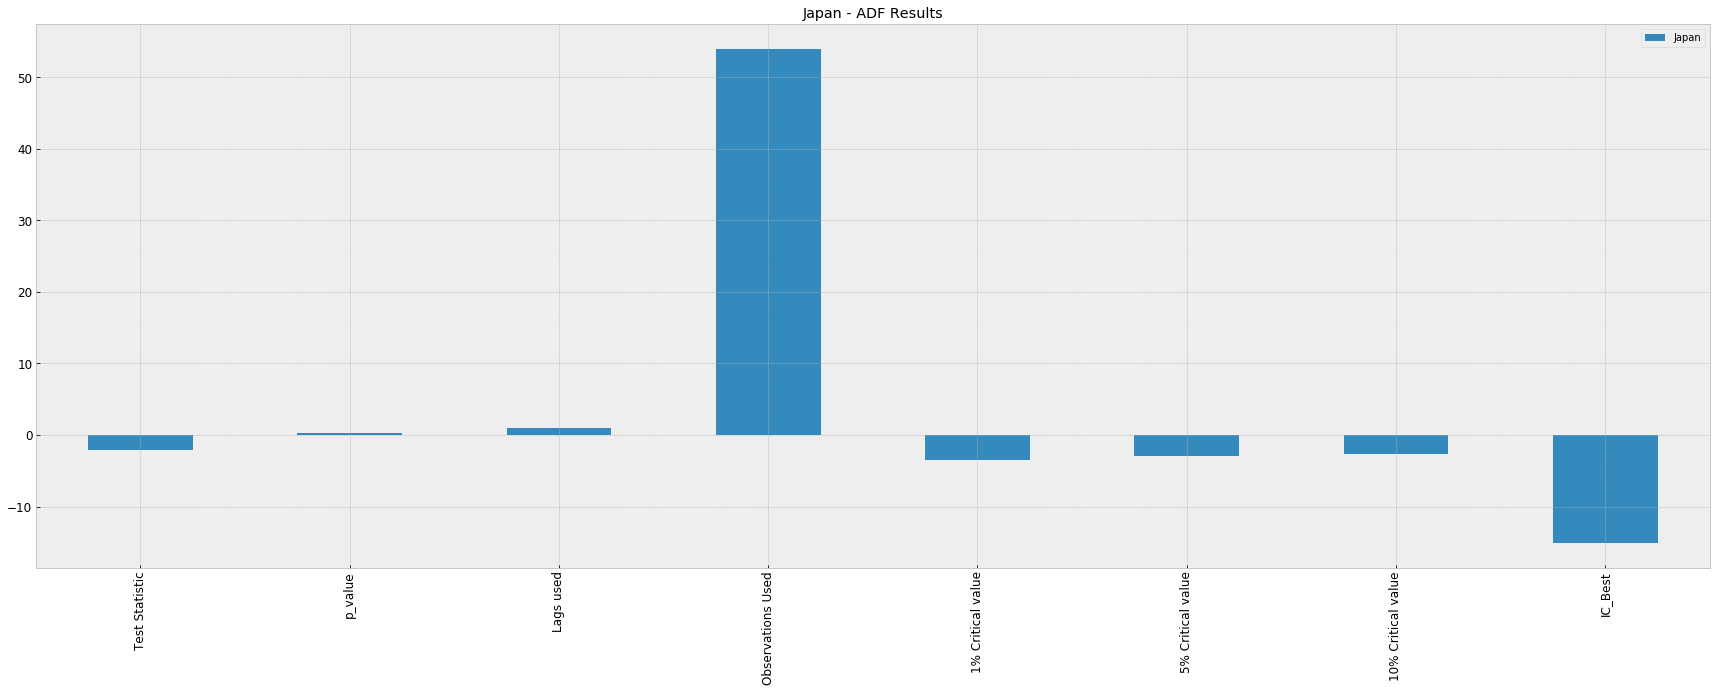

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/adf_test/


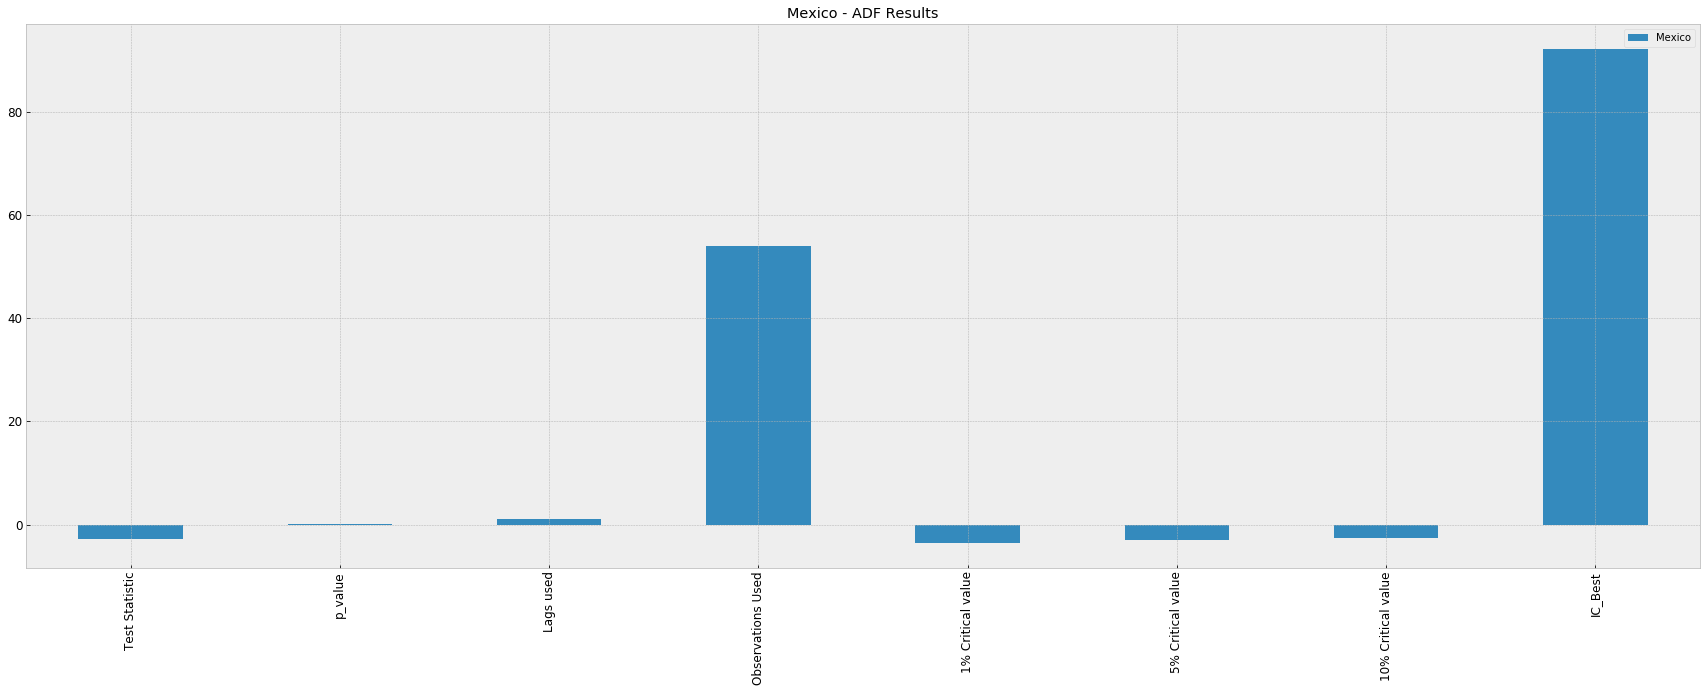

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/adf_test/


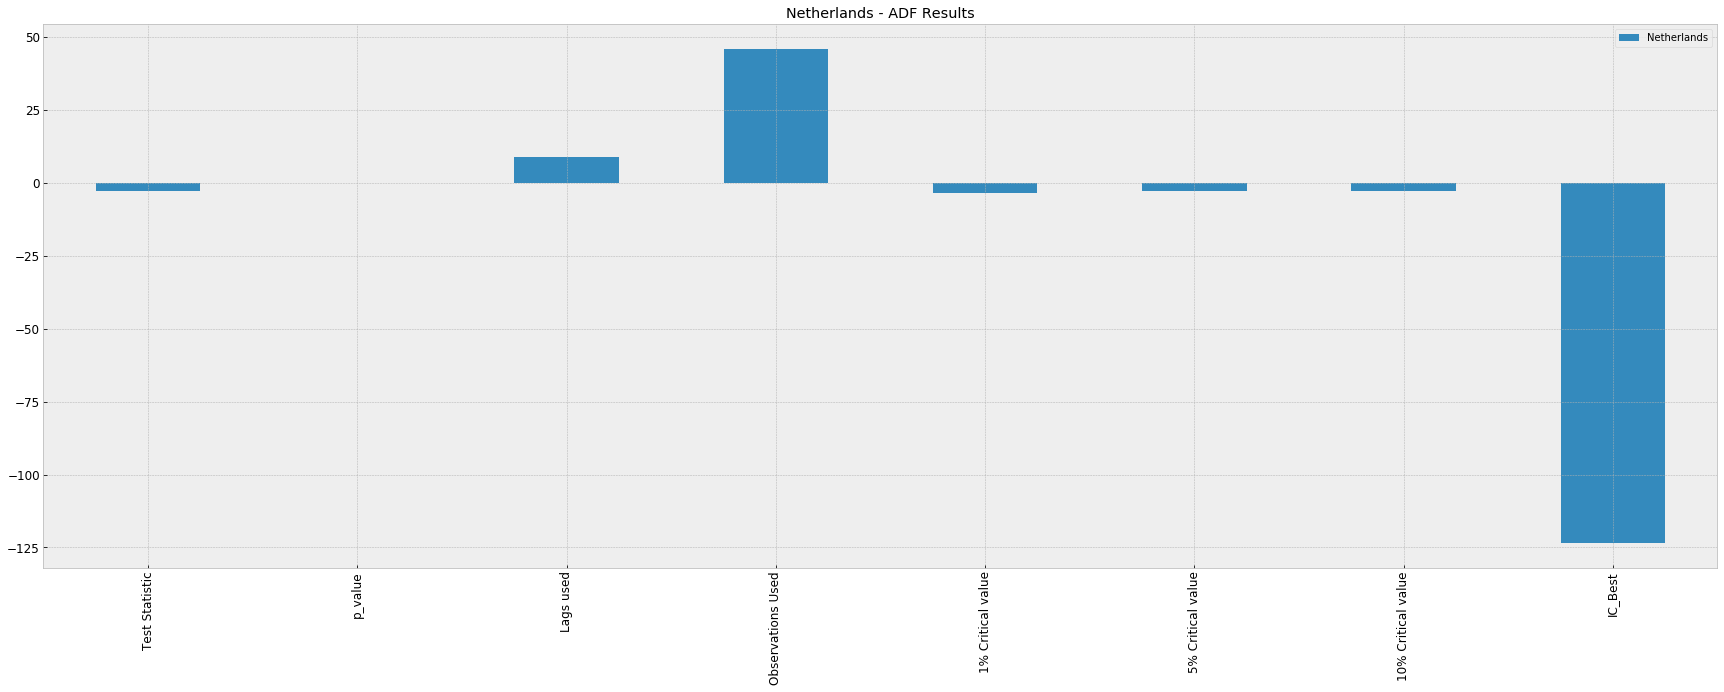

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/adf_test/


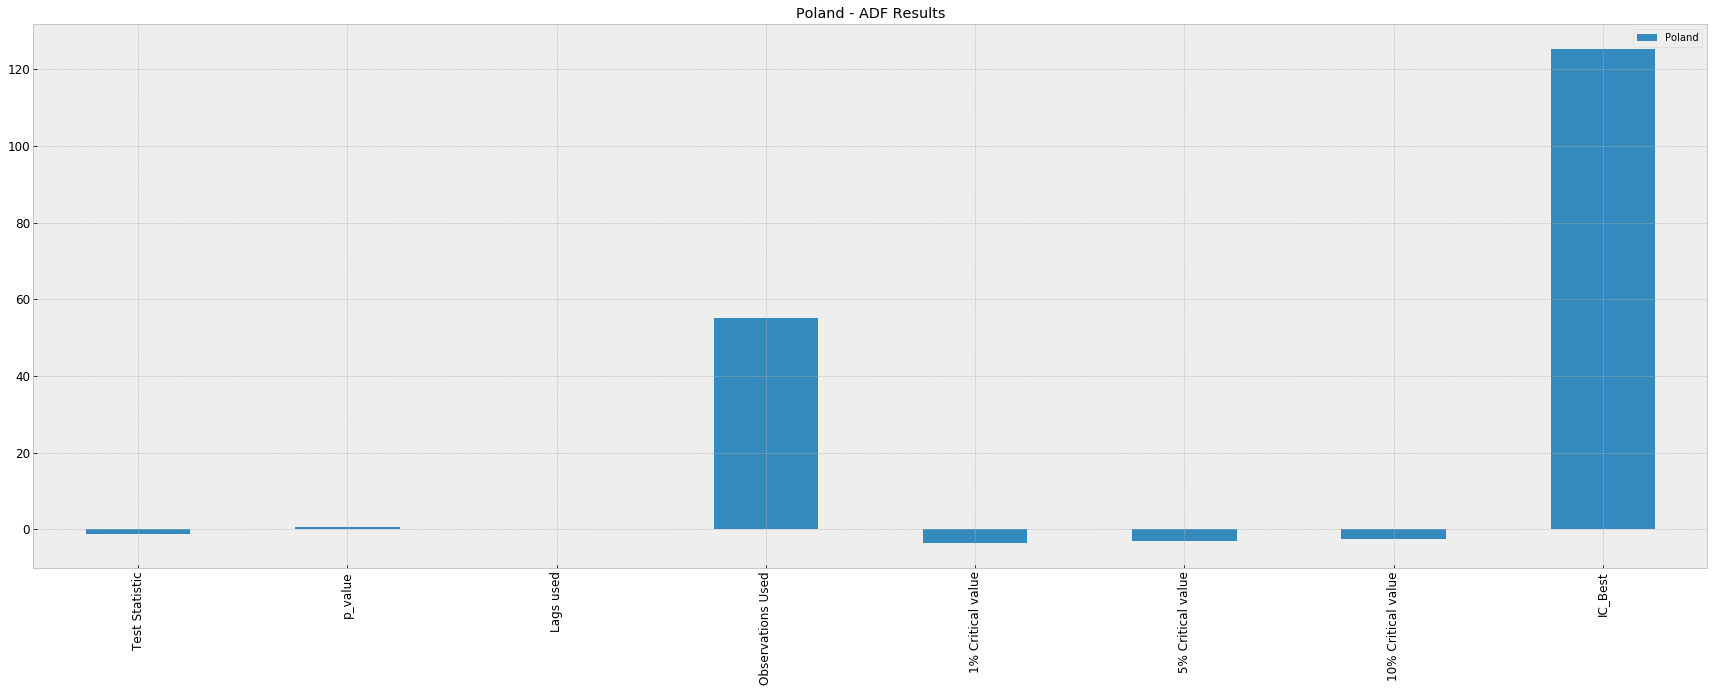

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/adf_test/


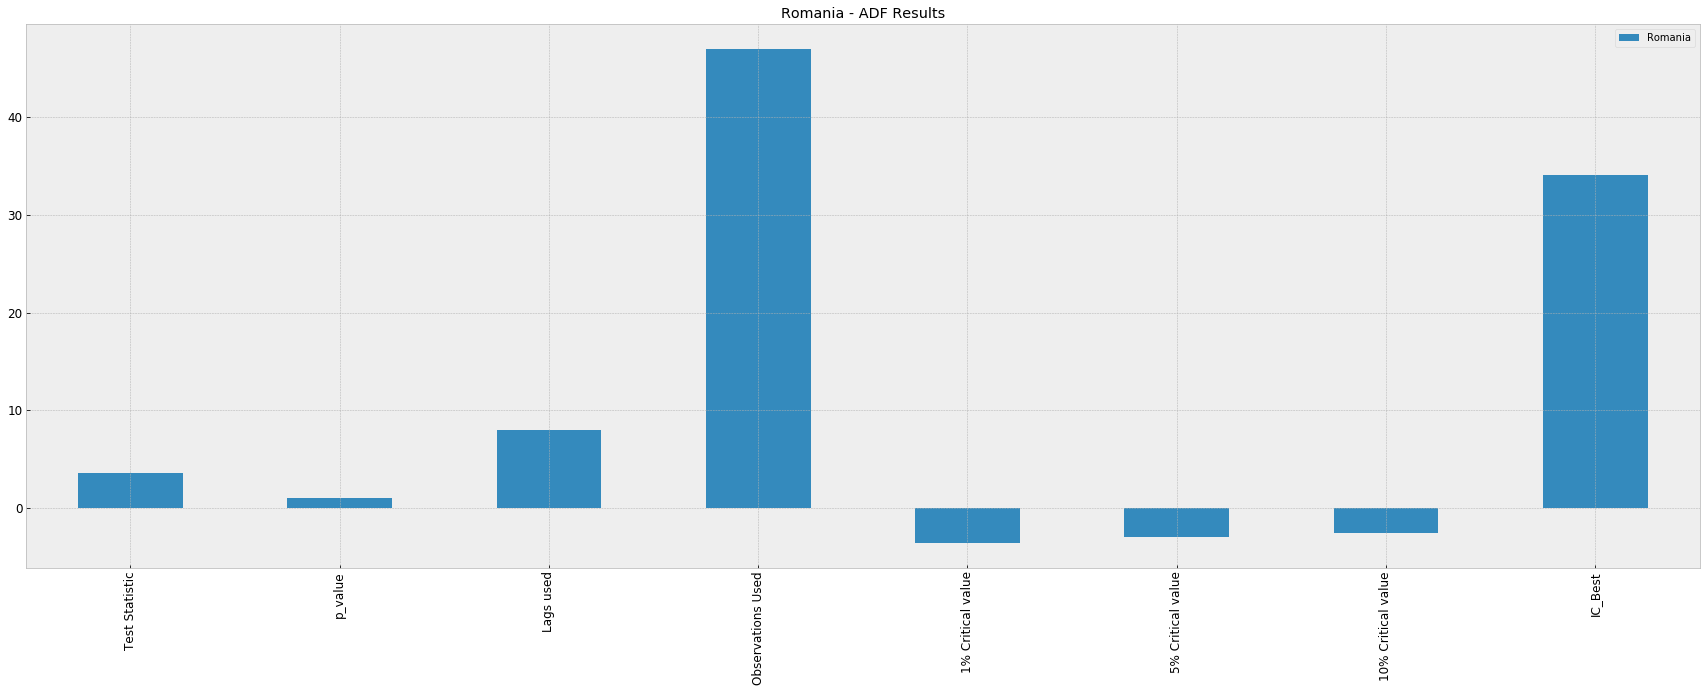

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/adf_test/


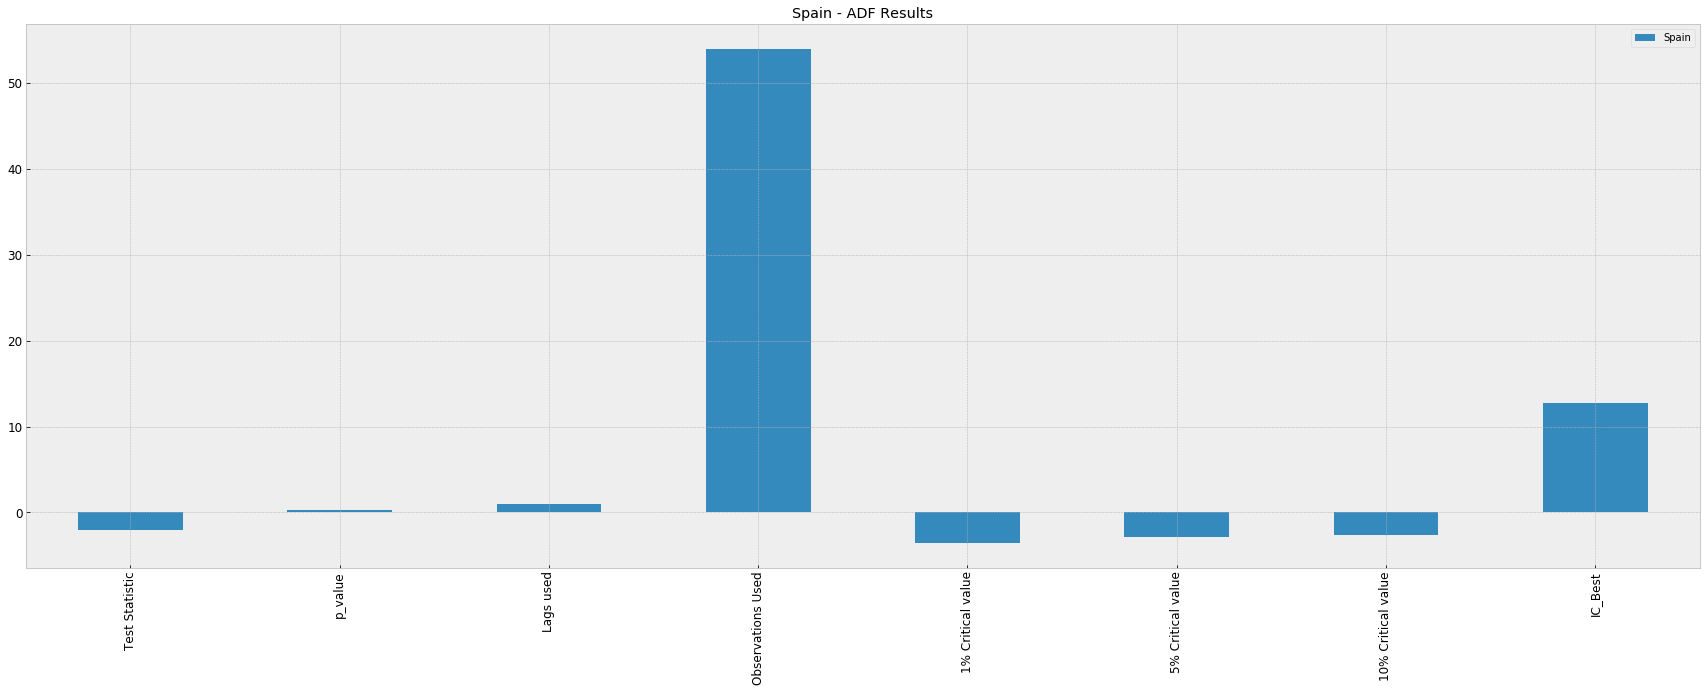

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/adf_test/


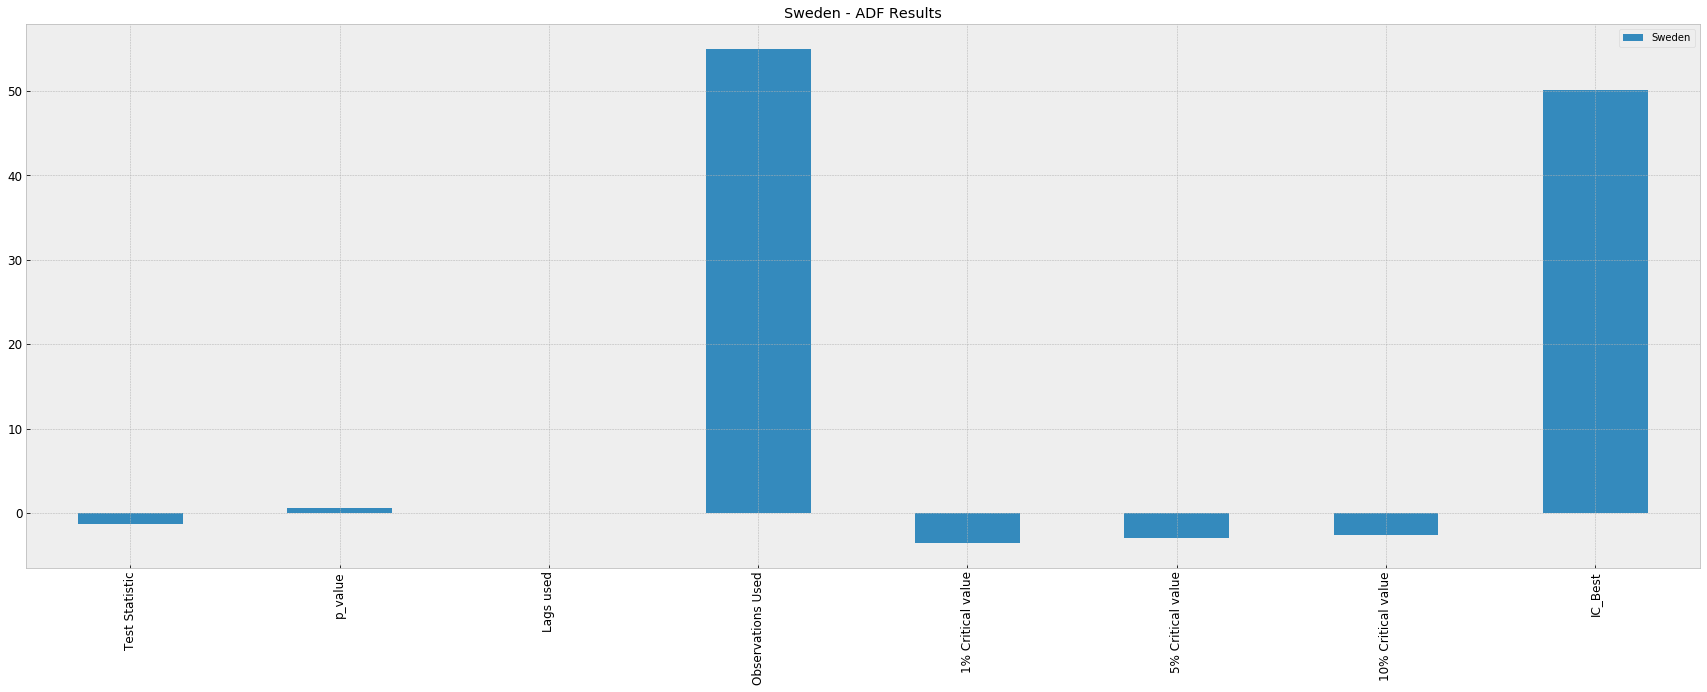

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/adf_test/


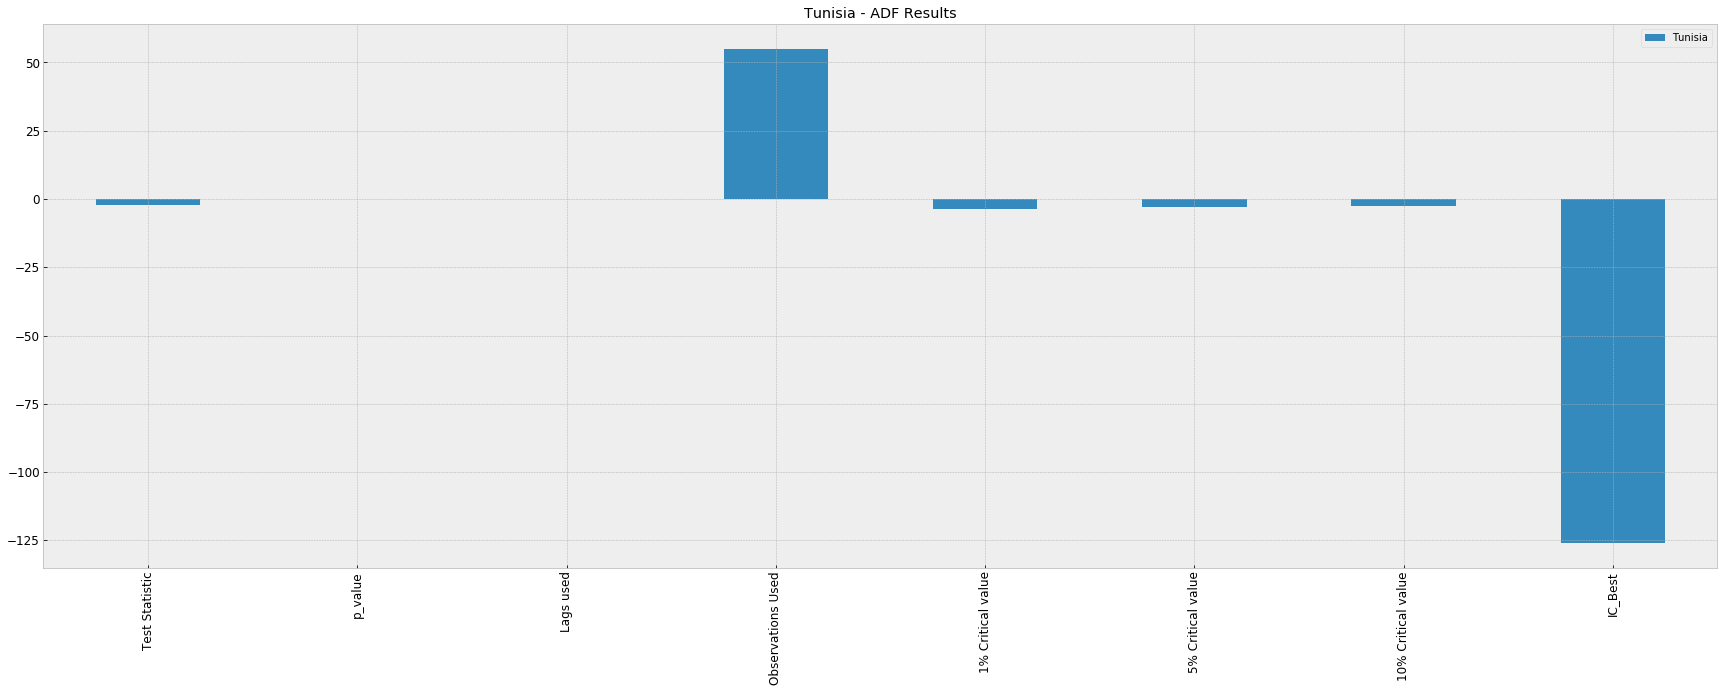

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/adf_test/


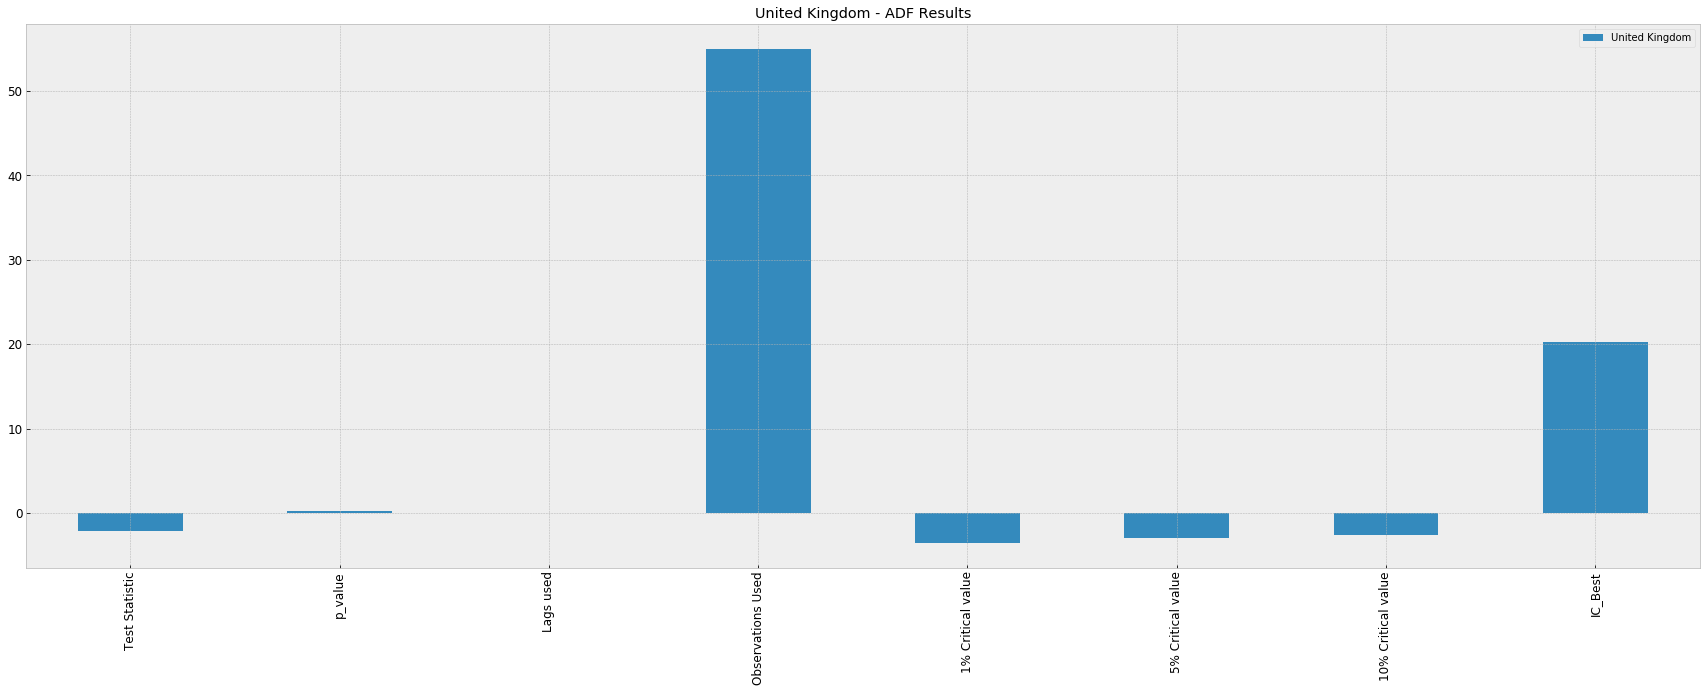

Images stored in /home/webber/Documents/PhD/time_series_trade/images/engine_parts/rca_values/adf_test/


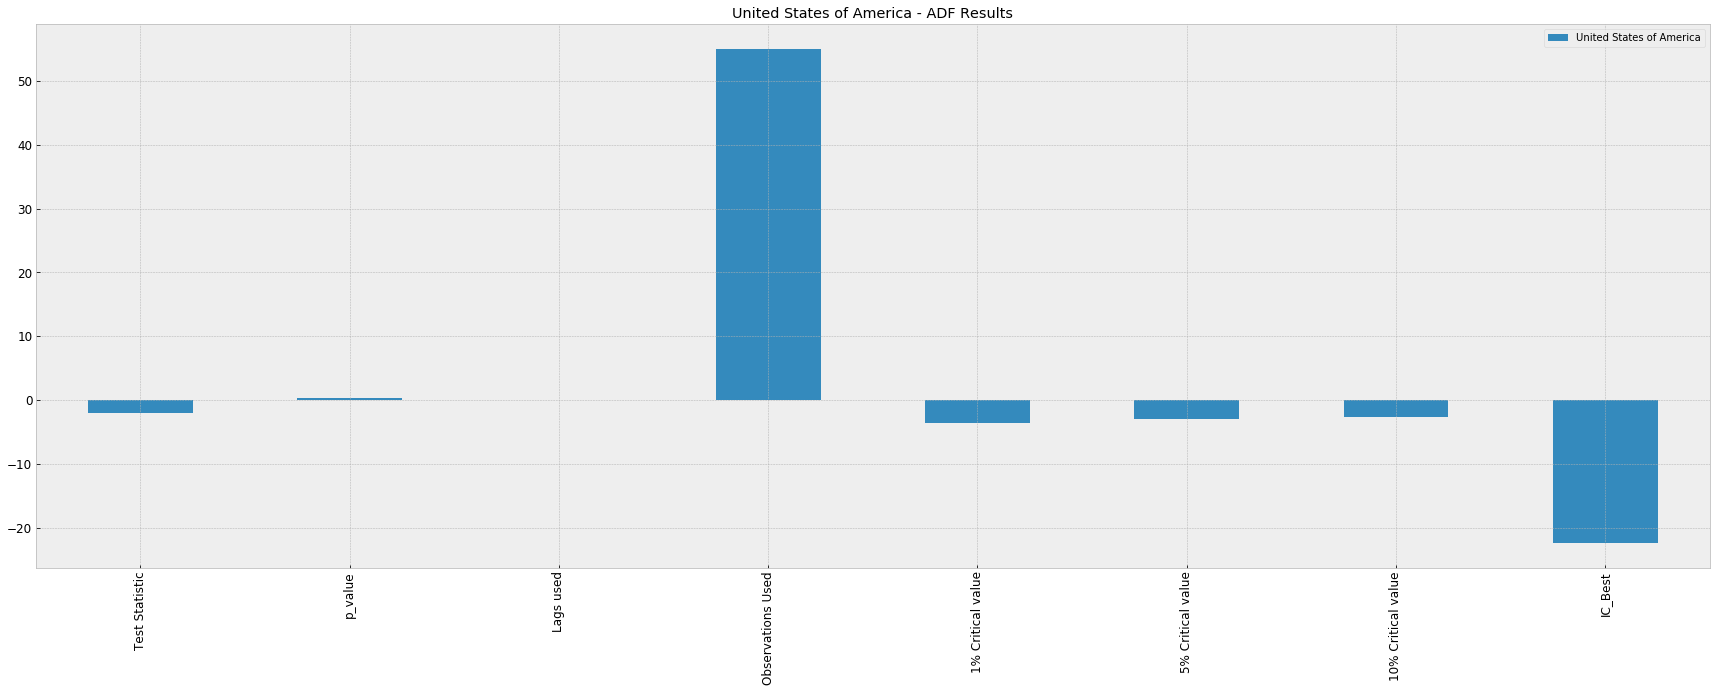

In [31]:
for exporter in adf_test:
    savefile = save_images(adf_test,'adf_test')
    adf_test[exporter].plot.bar()
    plt.legend(loc='best')
    plt.title('{} - ADF Results'.format(adf_test[exporter].name))
    plt.savefig(str('{}_ADF.png'.format(savefile)))
    plt.show()

<div class="alert alert-block alert-info">

## TO DO   

Automate p-value diagnosis: [Try this to automate p-value rejection for non-stationary time series](http://www.insightsbot.com/blog/1MH61d/augmented-dickey-fuller-test-in-python)

<div class="alert alert-block alert-info">

## Making Time Series Stationary
There are 2 major reasons behind non-stationaruty of a TS:

1. __Trend__ – varying mean over time

2. __Seasonality__ – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

Our dataset had no seasonality, but suffers from a downward and an upward trend, which needs to be corrected in order for forecasting to be possible

[Other sources to check](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)

<div class="alert alert-block alert-info">

### Transformations

- We can apply transformation which penalize higher values more than smaller values
- These can be taking a log, square root, cube root

#### Log Scale Transformation